# Análise da Bay Area Bike Share

## Introdução


[Bay Area Bike Share](http://www.bayareabikeshare.com/) é uma empresa que oferece aluguel de bicicletas on-demand para clientes em San Francisco, Redwood City, Palo Alto, Mountain View e San Jose. Os usuários podem desbloquear bicicletas de uma variedade de estações em cada cidade, e devolvê-las em qualquer estação dentro da mesma cidade. Os usuários pagam o serviço por meio de assinatura anual ou pela compra de passes de 3 dias ou 24 horas. Os usuários podem fazer um número ilimitado de viagens. Viagens com menos de trinta minutos de duração não têm custo adicional; Viagens mais longas incorrem em taxas de horas extras.

Neste projeto, você vai se colocar no lugar de um analista de dados realizando uma análise exploratória sobre os dados. Você vai dar uma olhada em duas das principais partes do processo de análise de dados: limpeza de dados e análise exploratória. Mas antes que você comece a olhar os dados, pense algumas perguntas que você pode querer fazer sobre os dados. Considere, por exemplo, se você estivesse trabalhando para Bay Area Bike Share: que tipo de informação você gostaria de saber a fim de tomar decisões de negócios mais inteligentes? Ou você pode pensar se você fosse um usuário do serviço de compartilhamento de bicicletas. Que fatores podem influenciar a maneira como você gostaria de usar o serviço?

# Sobre este projeto

Este é o seu primeiro projeto com a Udacity. Queremos fazer com que você treine os conhecimentos aprendidos durante o curso e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão verificados neste trabalho:

- Criação de dicionários e mapeamento de variáveis
- Uso de lógica com o `if`
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- Todas as perguntas respondidas. Elas estão identificadas como PERGUNTA em letras grandes.

Para entregar este projeto, vá a [sala de aula](https://classroom.udacity.com/nanodegrees/nd110/parts/05e3b1e2-ff23-488f-aaec-caba12ad8ed3/modules/519425b3-ee26-4ecd-a952-f689decef51c/lessons/47133342-a203-4df9-9b9e-69b04408e089/project) e submeta o seu `.ipynb` e um pdf, zipados.

# Pergunta 1
Escreva pelo menos duas perguntas que você acha que poderiam ser respondidas usando os dados.

** Resposta **:

- A infraestrutura instalada está suportando a demanda? Investigar o tempo que as estações ficam vazias. 
- Também gostaria de saber como eventos externos afetam a rotina do sistema. Existe sazonalidade no comportamento do usuário ao longo da semana, mês, ano?

## Usando visualizações para comunicar resultados em dados

Como um analista de dados, a capacidade de comunicar eficazmente resultados é uma parte fundamental do trabalho. Afinal, sua melhor análise é tão boa quanto sua capacidade de comunicá-la.

Em 2014, Bay Area Bike Share realizou um [Open Data Challenge](http://www.bayareabikeshare.com/datachallenge-2014) para incentivar os analistas de dados a criar visualizações com base em seu conjunto de dados aberto. Você criará suas próprias visualizações neste projeto, mas primeiro, dê uma olhada no [vencedor de inscrições para Melhor Análise](http://thfield.github.io/babs/index.html) de Tyler Field. Leia todo o relatório para responder à seguinte pergunta:

# Pergunta 2
Que visualizações você acha que fornecem as idéias mais interessantes? 

Selecione duas visualizações de Tyler que forneçam idéias interessantes e que respondam alguma das perguntas da análise de Tyler.

** Resposta **: 

   O heatmap é um gráfico muito interessante no qual podemos visualizar, com uma imagem apenas, a intensidade de utilização das estações e pela concentração dos pontos entender onde temos sobrecarga ou ociosidade. Também podemos perceber que raramente o usuário utiliza o sistema para ir de uma cidade à outra. Outro gráfico simples, mas muito ilustrativo é o gráfico que mostra o numero de "Rides" ao longo dos meses. Ele nos permite analisar o comportamento do sistema de maneira bem clara, observando os picos e vales e os correlacionando com eventos como condições climáticas, eventos culturais e esportivos importantes, dias da semana e feriados.


# Pergunta 2.1

Quais são as perguntas que foram respondidas com suas visualizações? Porque você as escolheu?

** Resposta **:

- Onde as pessoas costumam utilizar o Bike Share?
    Escolhi esse gráfico pela quantidade de informação que ele transmite com uma única imagem.
- Quanto que o Bike Share é utilizado? 
    Escolhi esse gráfico por ser simples e mesmo assim transmitir uma visão geral ao longo do tempo, possibilitando a indentificação de uma periodicidade e os efeitos de eventos externos como finais de semana, feriados, eventos esportivos, culturais e climáticos. 

## Data Wrangling (Limpeza de Dados)

Agora é a sua vez de explorar os dados. Os [dados abertos](http://www.bayareabikeshare.com/open-data) do Ano 1 e do Ano 2 da página Bay Area Bike Share já foram fornecidos com os materiais do projeto; você não precisa baixar nada extra. O dado vem em três partes: a primeira metade do Ano 1 (arquivos a partir de `201402`), a segunda metade do Ano 1 (arquivos a partir de `201408`) e todo o Ano 2 (arquivos a partir de `201508`). Existem três arquivos de dados principais associados a cada parte: dados de viagem que mostram informações sobre cada viagem no sistema (`*_trip_data.csv`), informações sobre as estações no sistema (`*_station_data.csv`) e dados meteorológicos diários para cada cidade no sistema (`*_weather_data.csv`).


Ao lidar com muitos dados, pode ser útil começar trabalhando com apenas uma amostra dos dados. Desta forma, será muito mais fácil verificar se nossos passos da limpeza de dados (Data Wrangling) estão funcionando, pois nosso código demorará menos tempo para ser concluído. Uma vez que estamos satisfeitos com a forma como funcionam as coisas, podemos configurar o processo para trabalhar no conjunto de dados como um todo.

Uma vez que a maior parte dos dados está contida na informação de viagem, devemos segmentar a procura de um subconjunto dos dados da viagem para nos ajudar a seguir em frente. Você começará olhando apenas o primeiro mês dos dados da viagem de bicicleta, de 2013-08-29 a 2013-09-30. O código abaixo selecionará os dados da primeira metade do primeiro ano, então escreverá o valor do primeiro mês de dados para um arquivo de saída. Este código explora o fato de que os dados são classificados por data (note que os dois primeiros dias são classificados por tempo de viagem, em vez de serem completamente cronológicos).

Primeiro, carregue todos os pacotes e funções que você usará em sua análise executando a primeira célula de código abaixo. Em seguida, execute a segunda célula de código para ler um subconjunto do primeiro arquivo de dados de viagem e escrever um novo arquivo contendo apenas o subconjunto em que inicialmente estamos interessados.

> **Dica**: Você pode executar uma célula de código ou renderizar um texto em Markdown clicando na célula e usando o atalho do teclado **Shift** + **Enter** ou **Shift** + **Return**. Alternativamente, uma célula de código pode ser executada usando o botão **Play** na barra de ferramentas (a cima no IPython Notebook) depois de selecioná-la. Enquanto a célula estiver em execução, você verá um asterisco na mensagem à esquerda da célula, ou seja, `In [*]:`. O asterisco mudará para um número para mostrar que a execução foi concluída, Ex: `In [1]`. Se houver saída, ele aparecerá como `Out [1]:`, com um número apropriado para coincidir com o número de "In".

In [1]:
# Importa todas as bibliotecas necessárias
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
# https://stackoverflow.com/questions/10406135/unicodedecodeerror-ascii-codec-cant-decode-byte-0xd1-in-position-2-ordinal
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [2]:
# definição dos arquivos
file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # configura o leitor de csv
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # escreve os dados no arquivo de saída até que a data limite seja atingida
    while True:
        datarow = next(in_reader)
        # data de início de das viagens na terceira coluna no formato 'm/d/yyyy HH:MM'
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### Condensando os Dados de Viagem

O primeiro passo é analisar a estrutura do conjunto de dados para ver se há alguma limpeza de dados que devemos realizar. A célula abaixo irá ler o arquivo de dados amostrado que você criou na célula anterior. Você deve imprimir as primeiras linhas da tabela.

In [3]:
sample_data = pd.read_csv('201309_trip_data.csv')

# TODO: escreva o código para visualizar as primeiras linhas

In [4]:
sample_data.head()

Trip ID  Duration       Start Date             Start Station  \
0     4576        63  8/29/2013 14:13  South Van Ness at Market   
1     4607        70  8/29/2013 14:42        San Jose City Hall   
2     4130        71  8/29/2013 10:16   Mountain View City Hall   
3     4251        77  8/29/2013 11:29        San Jose City Hall   
4     4299        83  8/29/2013 12:02  South Van Ness at Market   

   Start Terminal         End Date               End Station  End Terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   Bike # Subscription Type Zip Code  
0     520        Subscriber    94127  
1     661        Subscriber    95138  
2      48        Subscriber    97214  
3      26        Subscriber    95060  
4     319        Subscriber    94103

In [5]:
sample_data.shape

(27345, 11)

In [6]:
sample_data.describe()

Trip ID       Duration  Start Terminal  End Terminal        Bike #
count  27345.000000   27345.000000    27345.000000  27345.000000  27345.000000
mean   22940.489230    1655.773048       56.236862     56.286195    438.266776
std    10476.693107    7734.468455       17.584462     17.521357    143.572212
min     4069.000000      60.000000        2.000000      2.000000      9.000000
25%    14001.000000     409.000000       49.000000     49.000000    348.000000
50%    23004.000000     643.000000       60.000000     60.000000    452.000000
75%    32088.000000    1037.000000       70.000000     70.000000    554.000000
max    40937.000000  597517.000000       77.000000     77.000000    714.000000

Nesta exploração, vamos nos concentrar nos fatores nos dados da viagem que afetam o número de viagens realizadas. Vamos focar em algumas colunas selecionadas: a duração da viagem (trip duration), hora de início (start time), terminal inicial (start terminal), terminal final (end terminal) e tipo de assinatura. O tempo de início será dividido em componentes de ano, mês e hora. Também adicionaremos uma coluna para o dia da semana e resumiremos o terminal inicial e final para ser a _cidade_ de início e fim.

Vamos primeiro abordar a última parte do processo de limpeza. Execute a célula de código abaixo para ver como as informações da estação estão estruturadas e observe como o código criará o mapeamento estação-cidade. Observe que o mapeamento da estação está configurado como uma função, `create_station_mapping()`. Uma vez que é possível que mais estações sejam adicionadas ou removidas ao longo do tempo, esta função nos permitirá combinar as informações da estação em todas as três partes dos nossos dados quando estivermos prontos para explorar tudo.

In [7]:
# Mostra as primeiras linhas do arquivo de dados das estações
station_info = pd.read_csv('201402_station_data.csv')

station_info_df = pd.DataFrame(station_info)

station_info.head()

station_id                               name        lat        long  \
0           2  San Jose Diridon Caltrain Station  37.329732 -121.901782   
1           3              San Jose Civic Center  37.330698 -121.888979   
2           4             Santa Clara at Almaden  37.333988 -121.894902   
3           5                   Adobe on Almaden  37.331415 -121.893200   
4           6                   San Pedro Square  37.336721 -121.894074   

   dockcount  landmark installation  
0         27  San Jose     8/6/2013  
1         15  San Jose     8/5/2013  
2         11  San Jose     8/6/2013  
3         19  San Jose     8/5/2013  
4         15  San Jose     8/7/2013

Preencha a função abaixo de forma que a função retorne um mapeamento entre o id da estação (`station_id`) e a cidade em que ela se encontra (`landmark`).

In [8]:
# esta função será usada mais tarde para criar o mapeamento entre station e cidade
def create_station_mapping(station_data):
    station_map = station_info[['station_id', 'landmark']].set_index('station_id').to_dict()
    return station_map


Você pode agora usar o mapeamento para condensar as viagens para as colunas selecionadas acima. Isto acontecerá na função abaixo `summarise_data()`. Nela o módulo `datetime` é usado para fazer o **p**arse do tempo (timestamp) em formato de strings no arquivo original para um objeto usando a função `strptime`. Este objeto permitirá a conversão para outros **f**ormatos de datas usando a função `strftime`. O objeto possui também outras funções que facilitam a manipulação dos dados. Veja [este tutorial](http://usandopython.com.br/manipulando-data-hora-python-datetime/) para entender um pouco melhor como trabalhar com a biblioteca.

Você precisa concluir duas tarefas para completar a função `summarise_data()`. Inicialmente, você deverá realizar a operação de converter a duração das viagens de segundos para minutos. Esta é muito fácil, pois existem 60 segundos em um minuto!

Na sequência, você deve criar colunas para o ano, mês, hora e dia da semana. Verifique o tutorial acima ou a [documentação para o objeto de datetime no módulo datetime](https://docs.python.org/2/library/datetime.html#datetime-objects). 

** TODO: Encontre os atributos e métodos necessários para poder completar o código abaixo **

*Dica*: Você pode abrir uma nova caixa para testar um pedaço do código ou verificar uma variável que seja global. Caso ela esteja dentro da função, você também pode usar o comando `print()` para imprimi-la e ajudar no Debug.

In [9]:
# _*_ coding: utf-8 _*_
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
import matplotlib

file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # configura o leitor de csv
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # escreve os dados no arquivo de saída até que a data limite seja atingida
    while True:
        datarow = next(in_reader)
        # data de início de das viagens na terceira coluna no formato 'm/d/yyyy HH:MM'
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

sample_data = pd.read_csv('201309_trip_data.csv')
# print sample_data.head()
# exit()

station_info = pd.read_csv('201402_station_data.csv')
station_info_df = pd.DataFrame(station_info)

# esta função será usada mais tarde para criar o mapeamento entre station e cidade
def create_station_mapping(station_data):
    station_map = station_info[['station_id', 'landmark']].set_index('station_id').to_dict()
    return station_map

station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'


def summarise_data(trip_in, station_data, trip_out):
    with open(trip_out, 'w') as f_out:
    # configura o objeto de escrita de csv
        out_colnames = ['duration', 'start_date', 'start_year', 'start_month', 'start_hour', 'weekday', 'start_city', 'end_city', 'subscription_type']
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()

        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # configura o leitor do csv
                trip_reader = csv.DictReader(f_in)

                # processa cada linha lendo uma a uma
                for row in trip_reader:
                    # print row
                    # break
                    new_point = {}
                    # converte a duração de segundos para minutos.
                    ### TODO: Pergunta 3a: Adicione uma operação matemática       ###
                    ### para converter a duração de segundos para minutos.  ###
                    # str_min = str(divmod(int(row['Duration']), 60)[0]) + ':' + str(divmod(int(row['Duration']), 60)[1])
                    # new_point['duration'] = str_min #datetime.strptime(str_min, '%M:%S')
                    new_point['duration'] = float(row['Duration'])/60
                    # reformate strings com datas para múltiplas colunas
                    ### TODO: Pergunta 3b: Preencha os __ abaixo para criar os        ###
                    ### campos experados nas colunas (olhe pelo nome da coluna) ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.date() #'{:2d}/{:2d}/{:4d}' .format(trip_date.day, trip_date.month, trip_date.year)
                    new_point['start_year']  = trip_date.year
                    new_point['start_month'] = trip_date.month
                    new_point['start_hour']  = trip_date.hour #'{:2d}:{:2d}'  .format(trip_date.hour, trip_date.minute)
                    new_point['weekday']     = trip_date.strftime("%A")

                    # TODO: mapeia o terminal de inicio e fim com o a cidade de inicio e fim
                    new_point['start_city'] = row['Start Station']
                    new_point['end_city'] = row['End Station']
                    # TODO: existem dois nomes diferentes para o mesmo campo. Trate cada um deles.
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # escreve a informação processada para o arquivo de saída.
                    trip_writer.writerow(new_point)

# # processe os dados usando a função criada acima
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)


# Pergunta 3: 
Execute o bloco de código abaixo para chamar a função `summarise_data()` que você terminou na célula acima. Ela usará os dados contidos nos arquivos listados nas variáveis `trip_in` e `station_data` e escreverá um novo arquivo no local especificado na variável `trip_out`. Se você executou a limpeza de dados corretamente, o bloco de código abaixo imprimirá as primeiras linhas do DataFrame e uma mensagem que verificando se as contagens de dados estão corretas.

In [10]:
# processe os dados usando a função criada acima
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

In [11]:
# Carregue os dados novamente mostrando os dados
## TODO: Complete o código para leitura dos dados no arquivo criado na função acima
sample_data = pd.read_csv('201309_trip_summary.csv')
display(sample_data.head())

duration  start_date  start_year  start_month  start_hour   weekday  \
0  1.050000  2013-08-29        2013            8          14  Thursday   
1  1.166667  2013-08-29        2013            8          14  Thursday   
2  1.183333  2013-08-29        2013            8          10  Thursday   
3  1.283333  2013-08-29        2013            8          11  Thursday   
4  1.383333  2013-08-29        2013            8          12  Thursday   

                 start_city                  end_city subscription_type  
0  South Van Ness at Market  South Van Ness at Market        Subscriber  
1        San Jose City Hall        San Jose City Hall        Subscriber  
2   Mountain View City Hall   Mountain View City Hall        Subscriber  
3        San Jose City Hall        San Jose City Hall        Subscriber  
4  South Van Ness at Market            Market at 10th        Subscriber

In [12]:
# Verifica o DataFrame contando o número de pontos de dados com as características de 
# tempo corretas.
question_3(sample_data)

> **Dica**: se você salvar um notebook do jupyter, a saída dos blocos de código em execução também será salva. No entanto, o estado do seu arquivo será reiniciado uma vez que uma nova sessão será iniciada. Certifique-se de que você execute todos os blocos de código necessários da sessão anterior para restabelecer variáveis e funções antes de continuar de onde você deixou na última vez.

## Análise Exploratória de Dados 

Agora que você tem alguns dados salvos em um arquivo, vejamos algumas tendências iniciais nos dados. Algum código já foi escrito para você no script [babs_visualizations.py](babs_visualizations.py) para ajudar a resumir e visualizar os dados; Isso foi importado como as funções `usage_stats()` e `usage_plot()`. Nesta seção, vamos percorrer algumas das coisas que você pode fazer com as funções, e você usará as funções para você mesmo na última parte do projeto. Primeiro, execute a seguinte célula para carregar os dados. Depois preencha a célula abaixo com os comandos para verificar os dados básicos sobre os dados.

In [13]:
trip_data = pd.read_csv('201309_trip_summary.csv')

In [14]:
trip_data.shape[0]

27345

In [15]:
# TODO: preencha os campos com os dados de acordo com o print
print('Existem {:d} pontos no conjunto de dados'.format(trip_data.shape[0]))
print('A duração média das viagens foi de {:.2f} minutos'.format(trip_data.duration.mean()))
print('A mediana das durações das viagens foi de {:.2f} minutos'.format(trip_data.duration.median()))

# TODO: verificando os quartis
duration_qtiles = trip_data['duration'].quantile([.25, .5, .75]).as_matrix()
print('25% das viagens foram mais curtas do que {:.2f} minutos'.format(duration_qtiles[0]))
print('25% das viagens foram mais compridas do que {:.2f} minutos'.format(duration_qtiles[2]))

In [16]:
# execute este campo para verificar os seu processamento acima.
usage_stats(trip_data)

array([  6.81666667,  10.71666667,  17.28333333])

Você deve ver que há mais de 27.000 viagens no primeiro mês e que a duração média da viagem é maior do que a duração mediana da viagem (o ponto em que 50% das viagens são mais curtas e 50% são mais longas). Na verdade, a média é maior que as durações de 75% das viagens mais curtas. Isso será interessante para ver mais adiante.

Vamos começar a ver como essas viagens são divididas por tipo de inscrição. Uma maneira fácil de construir uma intuição sobre os dados é traçá-los. 

Lembre-se que o Pandas possui maneiras de plotar os gráficos diretamente de um DataFrame. Para cada tipo de dados/análises se pode usar um tipo diferente de gráfico mais apropriado para a análise que se está fazendo.

Na caixa abaixo, faça um gráfico de viagens x tipo de subscrição do tipo barras.

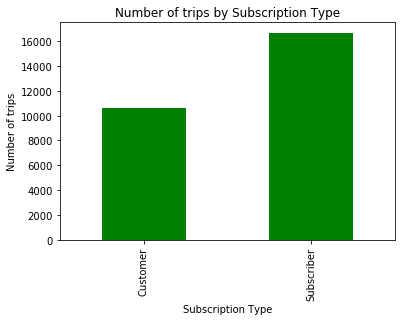

In [17]:
# TODO: plote um gráfico de barras que mostre quantidade de viagens por subscription_type
# lembrando que quando o comando .plot é usado, se pode escolher o tipo de gráfico usando 
# o parâmetro kind. Ex: plot(kind='bar')
# trip_data.loc[(trip_data['subscription_type'] == 'Subscriber') | (trip_data['subscription_type'] == 'Customer')]
my_colors = ['g', 'b']*5
plt = trip_data.groupby(['subscription_type']).duration.count().plot(kind='bar', color=my_colors, title='Number of trips by Subscription Type')
plt.set(xlabel='Subscription Type', ylabel='Number of trips')

Para que você possa conferir se os seus gráficos estão corretos, usaremos a função `use_plot()`. O segundo argumento da função nos permite contar as viagens em uma variável selecionada, exibindo as informações em um gráfico. A expressão abaixo mostrará como deve ter ficado o seu gráfico acima.

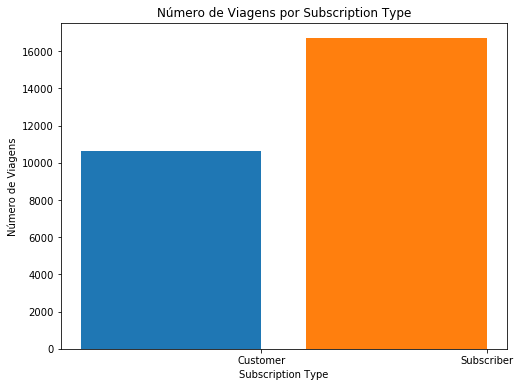

In [18]:
# como o seu gráfico deve ficar. Descomente a linha abaixo caso queira rodar este comando
usage_plot(trip_data, 'subscription_type')

>*Nota*: Perceba que provavelmente o seu gráfico não ficou exatamente igual, principalmente pelo título e pelo nome dos eixos. Lembre-se, estes são detalhes mas fazem toda a diferença quando você for apresentar os gráficos que você analisou. Neste Nanodegree não focaremos nestas questões, mas tenha em mente que ter os gráficos acertados é de extrema importância.

Parece que existe 50% mais viagens feitas por assinantes (subscribers) no primeiro mês do que outro tipos de consumidores. Vamos tentar uma outra variável. Como é a distribuição da duração das viagens (trip duration)?

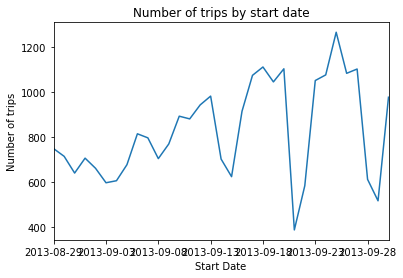

In [19]:
# TODO: Faça um gráfico baseado nas durações
plt = trip_data.groupby(['start_date']).duration.count().plot(title='Number of trips by start date')
plt.set(xlabel='Start Date', ylabel='Number of trips')

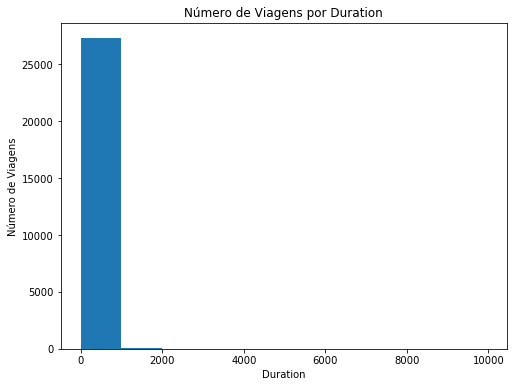

In [20]:
# rode este comando abaixo caso esteja em dúvida quanto ao resultado esperado
usage_plot(trip_data, 'duration')

Parece muito estranho, não é? Dê uma olhada nos valores de duração no eixo x. A maioria dos passeios deve ser de 30 minutos ou menos, uma vez que há taxas de excesso de tempo extra em uma única viagem. A primeira barra abrange durações de até 1000 minutos, ou mais de 16 horas. Com base nas estatísticas que obtivemos do `use_stats()`, deveríamos ter esperado algumas viagens com durações muito longas que levem a média a ser muito superior à mediana: o gráfico mostra isso de forma dramática, mas inútil.

Ao explorar os dados, muitas vezes você precisará trabalhar com os parâmetros da função de visualização para facilitar a compreensão dos dados. É aqui que os filtros vão ajudar você. Comecemos por limitar as  viagens de menos de 60 minutos.

In [21]:
# TODO: faça um gráfico de barras para os dados com duração inferior a 60 minutos.
import matplotlib.pyplot as plt
step1 = trip_data.loc[trip_data.duration < 6].count()['duration']
step2 = trip_data.loc[(trip_data.duration >= 6) & (trip_data.duration <= 12)].count()['duration']
step3 = trip_data.loc[(trip_data.duration >= 12) & (trip_data.duration <= 18)].count()['duration']
step4 = trip_data.loc[(trip_data.duration >= 18) & (trip_data.duration <= 24)].count()['duration']
step5 = trip_data.loc[(trip_data.duration >= 24) & (trip_data.duration <= 30)].count()['duration']
step6 = trip_data.loc[(trip_data.duration >= 30) & (trip_data.duration <= 36)].count()['duration']
step7 = trip_data.loc[(trip_data.duration >= 36) & (trip_data.duration <= 42)].count()['duration']
step8 = trip_data.loc[(trip_data.duration >= 42) & (trip_data.duration <= 48)].count()['duration']
step9 = trip_data.loc[(trip_data.duration >= 48) & (trip_data.duration <= 54)].count()['duration']
step10 = trip_data.loc[(trip_data.duration >= 54) & (trip_data.duration <= 60)].count()['duration']


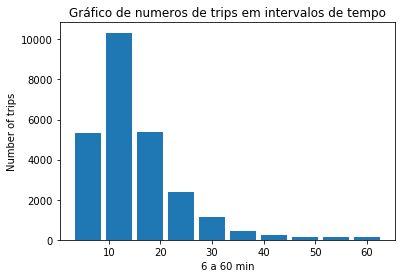

In [22]:
y = [step1, step2, step3, step4, step5, step6, step7, step8, step9, step10]
x = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
width = 5
plt.bar(x,y, width)
plt.ylabel('Number of trips')
plt.xlabel('6 a 60 min')
plt.title('Gráfico de numeros de trips em intervalos de tempo')
plt.show()

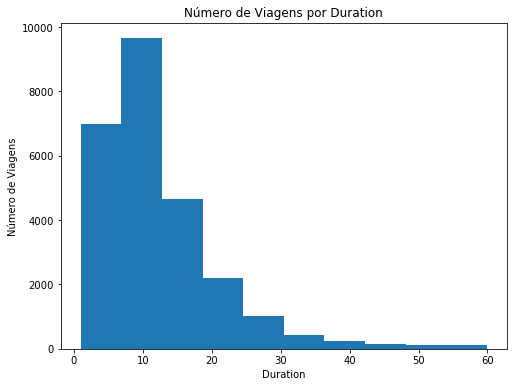

In [23]:
# descomente a linha abaixo para verificar o gráfico esperado.
usage_plot(trip_data, 'duration', ['duration < 60'])

Isso está bem melhor! Você pode ver que a maioria das viagens têm menos de 30 minutos de duração, mas que você pode fazer mais para melhorar a apresentação. Uma vez que a duração mínima não é 0, a barra da esquerda está ligeiramente acima de 0. Nós queremos saber onde existe um limite perto dos 30 minutos, então ficará mais agradável se tivermos tamanhos de intervalos (bin sizes) e limites dos intervalos que correspondam a alguns minutos. 

Felizmente, o Pandas e o Matplotlib te dão a opção de resolver ester problemas. Uma das maneiras de fazê-lo é definindo qual o intervalo no eixo x (parâmetro range) e quantos intervalos desejamos (bins).

No campo abaixo, faça o ajuste do gráfico para que os limites das barras se encontrem nas extremidades e que as barras tenham tamanho 5 (0, 5, 10, 15, etc). Se precisar, use a [documentação](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist).

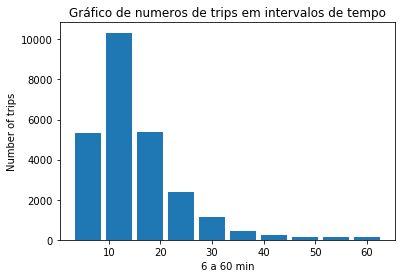

In [24]:
# faça o gráfico ajustado que começará no 0 e terá o bin size de 5
y = [step1, step2, step3, step4, step5, step6, step7, step8, step9, step10]
x = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
width = 5
plt.bar(x,y, width)
plt.ylabel('Number of trips')
plt.xlabel('6 a 60 min')
plt.title('Gráfico de numeros de trips em intervalos de tempo')
plt.show()

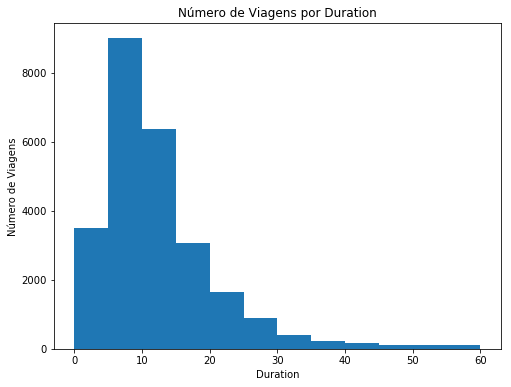

In [25]:
# rode esta linha para verificar como deve ficar o seu gráfico
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

Pequenos ajustes como este podem ser pequenos mas fazem toda a diferença na entrega de um trabalho de qualidade e com atenção aos detalhes.


# Pergunta 4

Analise o histograma do exercicio anterior e responda:

Qual o intervalo de duração com maior quantidade de viagens?


**Reposta**: 

O intervalo com maior numero de viagens está entre 6 a 12 minutos.

# Pergunta 4.1

Com base na sua resposta da pergunta anterior, conte quantas viagens existem para cada origem e destino desse intervalo de tempo. Monte uma tabela que demonstre isso. 

Qual origem e destino tem a maior quantidade de viagens?  Aproximadamente quantas viagens foram feitas nesta faixa de tempo?


 **Reposta**: Substitua este texto pela sua resposta!

In [37]:
trip_data.head()


duration  start_date  start_year  start_month  start_hour   weekday  \
0  1.050000  2013-08-29        2013            8          14  Thursday   
1  1.166667  2013-08-29        2013            8          14  Thursday   
2  1.183333  2013-08-29        2013            8          10  Thursday   
3  1.283333  2013-08-29        2013            8          11  Thursday   
4  1.383333  2013-08-29        2013            8          12  Thursday   

                 start_city                  end_city subscription_type  
0  South Van Ness at Market  South Van Ness at Market        Subscriber  
1        San Jose City Hall        San Jose City Hall        Subscriber  
2   Mountain View City Hall   Mountain View City Hall        Subscriber  
3        San Jose City Hall        San Jose City Hall        Subscriber  
4  South Van Ness at Market            Market at 10th        Subscriber

## Fazendo suas Próprias Análises

Agora que você fez alguma exploração em uma pequena amostra do conjunto de dados, é hora de avançar e reunir todos os dados em um único arquivo e ver quais tendências você pode encontrar. O código abaixo usará a mesma função `summarise_data()` para processar dados. Depois de executar a célula abaixo, você terá processado todos os dados em um único arquivo de dados. Observe que a função não exibirá qualquer saída enquanto ele é executado, e isso pode demorar um pouco para ser concluído, pois você tem muito mais dados do que a amostra com a qual você trabalhou.

In [27]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# Esta função irá ler as informações das estações e das viagens
# e escreverá um arquivo processado com o nome trip_out
summarise_data(trip_in, station_data, trip_out)

Já que a função `summarise_data()` escreveu um arquivo de saída, a célula acima não precisa ser rodada novamente mesmo que este notebook seja fechado e uma nova sessão seja criada. Você pode simplesmente ler os dados novamente e fazer a exploração deste ponto (não esqueça de executar a parte das funções no começo do notebook caso esteja em uma nova sessão)

In [28]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

duration  start_date  start_year  start_month  start_hour   weekday  \
0  1.050000  2013-08-29        2013            8          14  Thursday   
1  1.166667  2013-08-29        2013            8          14  Thursday   
2  1.183333  2013-08-29        2013            8          10  Thursday   
3  1.283333  2013-08-29        2013            8          11  Thursday   
4  1.383333  2013-08-29        2013            8          12  Thursday   

                 start_city                  end_city subscription_type  
0  South Van Ness at Market  South Van Ness at Market        Subscriber  
1        San Jose City Hall        San Jose City Hall        Subscriber  
2   Mountain View City Hall   Mountain View City Hall        Subscriber  
3        San Jose City Hall        San Jose City Hall        Subscriber  
4  South Van Ness at Market            Market at 10th        Subscriber

#### Agora é a SUA vez de fazer a exploração do dataset (do conjunto de dados) completo.

Aproveite para fazer filtros nos dados e tentar encontrar padrões nos dados.

Explore algumas variáveis diferentes usando o mesmo racional acima e tome nota de algumas tendências que você encontra. Sinta-se livre para criar células adicionais se quiser explorar o conjunto de dados de outras maneiras ou de várias maneiras.

> **Dica**: para adicionar células adicionais a um notebook, você pode usar as opções "Inserir célula acima" (Insert Cell Above) e "Insert Cell Below" na barra de menu acima. Há também um ícone na barra de ferramentas para adicionar novas células, com ícones adicionais para mover as células para cima e para baixo do documento. Por padrão, as novas células são do tipo de código; Você também pode especificar o tipo de célula (por exemplo, Código ou Markdown) das células selecionadas no menu Cell ou no menu dropdown na barra de ferramentas.

Um feito com suas explorações, copie as duas visualizações que você achou mais interessantes nas células abaixo e responda as seguintes perguntas com algumas frases descrevendo o que você encontrou e por que você selecionou os números. Certifique-se de que você ajusta o número de caixas ou os limites da bandeja para que efetivamente transmitam os resultados dos dados. Sinta-se livre para complementar isso com quaisquer números adicionais gerados a partir de `use_stats()` ou coloque visualizações múltiplas para suportar suas observações.

Para ver alguns outros tipos de gráficos que o matplotlib (padrão do Pandas) possui, leia [este artigo](https://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots). 

Para entender um pouco mais como e quais gráficos podem ser úteis, leia [este documento](https://www.tableau.com/sites/default/files/media/Whitepapers/which_chart_v6_ptb.pdf). Ele lhe dará um pouco de idéia de como mostrar os dados de forma mais acertada

# Pergunta 5a
Explore os dados e faça um gráfico que demonstre alguma particularidade dos dados:

In [29]:
# Gráfico final 1
data_inicial = trip_data.start_date.min()
data_final = trip_data.start_date.max()
display(data_inicial, data_final)

'2013-08-29'

'2015-08-31'

In [30]:
trip_data.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

In [31]:
trip_data.head()

duration  start_date  start_year  start_month  start_hour   weekday  \
0  1.050000  2013-08-29        2013            8          14  Thursday   
1  1.166667  2013-08-29        2013            8          14  Thursday   
2  1.183333  2013-08-29        2013            8          10  Thursday   
3  1.283333  2013-08-29        2013            8          11  Thursday   
4  1.383333  2013-08-29        2013            8          12  Thursday   

                 start_city                  end_city subscription_type  
0  South Van Ness at Market  South Van Ness at Market        Subscriber  
1        San Jose City Hall        San Jose City Hall        Subscriber  
2   Mountain View City Hall   Mountain View City Hall        Subscriber  
3        San Jose City Hall        San Jose City Hall        Subscriber  
4  South Van Ness at Market            Market at 10th        Subscriber

In [32]:
trip_data.shape

(669959, 9)

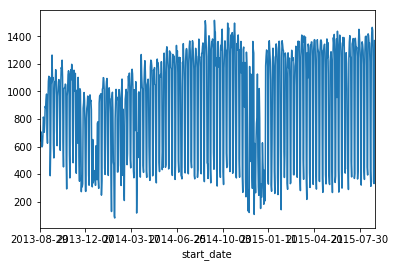

In [33]:
trip_data.groupby('start_date').duration.count().plot()

In [34]:
ano = trip_data.loc[(trip_data.start_date >= '2014-01-01') & (trip_data.start_date <= '2014-12-31'), ['start_date','duration']]
ano.head()

start_date   duration
100563  2014-01-01   7.250000
100564  2014-01-01   7.200000
100565  2014-01-01  25.383333
100566  2014-01-01  27.000000
100567  2014-01-01  26.950000

O que é interessante na visualização acima? Por que você a selecionou?

**Resposta**: 

Observando as caracteristicas dos dados podemos observar que ele tem incio em 29/08/2013(aberto para o público) e termina em 31/08/2015, cobrindo um perido de 2 anos de funcionamento do sistema. Optei por esse gráfico pois queria entender o funcionamento do sistema ao longo do ano e dessa forma encontrar padrões como as diferenças os valores para dias da semana e finais de semana, influencia de eventos climáticos e esportivos bem como feriados e datas comemorativas. Também podemos perceber que após sua abertura houve um crescimento na taxa de utilização do sistema na primeira metade do periodo até se estabilizar na segunda metade.

# Pergunta 5b
Faça um gráfico que demonstre alguma particularidade dos dados:

In [43]:
trip_data.head()

duration  start_date  start_year  start_month  start_hour   weekday  \
0  1.050000  2013-08-29        2013            8          14  Thursday   
1  1.166667  2013-08-29        2013            8          14  Thursday   
2  1.183333  2013-08-29        2013            8          10  Thursday   
3  1.283333  2013-08-29        2013            8          11  Thursday   
4  1.383333  2013-08-29        2013            8          12  Thursday   

                 start_city                  end_city subscription_type  
0  South Van Ness at Market  South Van Ness at Market        Subscriber  
1        San Jose City Hall        San Jose City Hall        Subscriber  
2   Mountain View City Hall   Mountain View City Hall        Subscriber  
3        San Jose City Hall        San Jose City Hall        Subscriber  
4  South Van Ness at Market            Market at 10th        Subscriber

In [53]:
# for row in trip_data.itertuples():
#    display(row.start_city)

'South Van Ness at Market'

'San Jose City Hall'

'Mountain View City Hall'

'San Jose City Hall'

'South Van Ness at Market'

'Golden Gate at Polk'

'Santa Clara at Almaden'

'San Salvador at 1st'

'South Van Ness at Market'

'San Jose City Hall'

'Spear at Folsom'

'San Pedro Square'

'Mountain View Caltrain Station'

'2nd at South Park'

'Clay at Battery'

'Post at Kearney'

'San Jose City Hall'

'Market at 10th'

'Steuart at Market'

'Powell Street BART'

'Spear at Folsom'

'Redwood City Caltrain Station'

'San Francisco City Hall'

'Post at Kearney'

'Beale at Market'

'Japantown'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Civic Center'

'South Van Ness at Market'

'Redwood City Medical Center'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'San Francisco City Hall'

'Commercial at Montgomery'

'Market at 4th'

'Market at 10th'

'2nd at Folsom'

'2nd at Folsom'

'Market at 10th'

'Powell Street BART'

'Clay at Battery'

'Washington at Kearney'

'San Jose City Hall'

'Golden Gate at Polk'

'University and Emerson'

'Golden Gate at Polk'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Adobe on Almaden'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View City Hall'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'2nd at Folsom'

'Golden Gate at Polk'

'South Van Ness at Market'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'South Van Ness at Market'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Townsend at 7th'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Market at 4th'

'Evelyn Park and Ride'

'Davis at Jackson'

'Market at 4th'

'Market at Sansome'

'University and Emerson'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mountain View City Hall'

'Embarcadero at Sansome'

'Market at Sansome'

'San Pedro Square'

'Townsend at 7th'

'Palo Alto Caltrain Station'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'5th at Howard'

'Civic Center BART (7th at Market)'

'University and Emerson'

'San Francisco City Hall'

'Powell Street BART'

'2nd at Townsend'

'San Mateo County Center'

'5th at Howard'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Steuart at Market'

'Embarcadero at Vallejo'

'San Salvador at 1st'

'Cowper at University'

'Market at 4th'

'2nd at Folsom'

'2nd at South Park'

'Santa Clara at Almaden'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Market at Sansome'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Commercial at Montgomery'

'San Jose City Hall'

'Post at Kearney'

'Embarcadero at Bryant'

'Davis at Jackson'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Market at 10th'

'Steuart at Market'

'San Jose Civic Center'

'Commercial at Montgomery'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'St James Park'

'San Jose City Hall'

'Beale at Market'

'Market at 4th'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Civic Center'

'Embarcadero at Bryant'

'San Jose City Hall'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Post at Kearney'

'5th at Howard'

'Powell at Post (Union Square)'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Market at Sansome'

'St James Park'

'Adobe on Almaden'

'Cowper at University'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Market at 4th'

'Powell Street BART'

'Davis at Jackson'

'Market at Sansome'

'Steuart at Market'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Post at Kearney'

'Market at 10th'

'Davis at Jackson'

'South Van Ness at Market'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Beale at Market'

'Commercial at Montgomery'

'Market at 10th'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Market at 4th'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Cowper at University'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Washington at Kearney'

'Embarcadero at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Beale at Market'

'Howard at 2nd'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Embarcadero at Sansome'

'Market at Sansome'

'Powell Street BART'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Japantown'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Post at Kearney'

'Powell Street BART'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Adobe on Almaden'

'Market at 10th'

'Post at Kearney'

'Golden Gate at Polk'

'Beale at Market'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Spear at Folsom'

'5th at Howard'

'Commercial at Montgomery'

'Post at Kearney'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'South Van Ness at Market'

'San Jose Civic Center'

'Market at 4th'

'San Francisco City Hall'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Vallejo'

'San Jose Civic Center'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Market at Sansome'

'Powell Street BART'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'South Van Ness at Market'

'MLK Library'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'South Van Ness at Market'

'Santa Clara at Almaden'

'Post at Kearney'

'Embarcadero at Vallejo'

'Clay at Battery'

'Beale at Market'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Market at 10th'

'Powell at Post (Union Square)'

'Powell Street BART'

'Powell at Post (Union Square)'

'San Jose Civic Center'

'South Van Ness at Market'

'Market at 4th'

'Davis at Jackson'

'Howard at 2nd'

'Commercial at Montgomery'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Howard at 2nd'

'Japantown'

'Powell Street BART'

'Townsend at 7th'

'Washington at Kearney'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Japantown'

'Powell Street BART'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Mountain View City Hall'

'Market at 4th'

'Steuart at Market'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'2nd at Townsend'

'Clay at Battery'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Market at 4th'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Civic Center'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at South Park'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Redwood City Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Golden Gate at Polk'

'Spear at Folsom'

'Japantown'

'South Van Ness at Market'

'Market at Sansome'

'Spear at Folsom'

'University and Emerson'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'MLK Library'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Beale at Market'

'Embarcadero at Folsom'

'Post at Kearney'

'South Van Ness at Market'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'2nd at Folsom'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'2nd at Folsom'

'Clay at Battery'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'South Van Ness at Market'

'Spear at Folsom'

'South Van Ness at Market'

'Townsend at 7th'

'Commercial at Montgomery'

'2nd at South Park'

'California Ave Caltrain Station'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Howard at 2nd'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Spear at Folsom'

'South Van Ness at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'California Ave Caltrain Station'

'San Salvador at 1st'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at 10th'

'South Van Ness at Market'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Clay at Battery'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'5th at Howard'

'5th at Howard'

'Market at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'San Antonio Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Commercial at Montgomery'

'Howard at 2nd'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'Steuart at Market'

'Davis at Jackson'

'Spear at Folsom'

'San Pedro Square'

'Embarcadero at Bryant'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Beale at Market'

'2nd at South Park'

'South Van Ness at Market'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Townsend at 7th'

'Post at Kearney'

'Post at Kearney'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'University and Emerson'

'Commercial at Montgomery'

'Spear at Folsom'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Post at Kearney'

'Mountain View City Hall'

'Davis at Jackson'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Civic Center'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'South Van Ness at Market'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'California Ave Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Arena Green / SAP Center'

'Embarcadero at Vallejo'

'Steuart at Market'

'Commercial at Montgomery'

'Townsend at 7th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Civic Center'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'California Ave Caltrain Station'

'Embarcadero at Folsom'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Clay at Battery'

'South Van Ness at Market'

'University and Emerson'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Commercial at Montgomery'

'Market at Sansome'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Market at 10th'

'Market at 4th'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'University and Emerson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'California Ave Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Steuart at Market'

'University and Emerson'

'5th at Howard'

'Steuart at Market'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'San Jose City Hall'

'Embarcadero at Folsom'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco City Hall'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'SJSU 4th at San Carlos'

'St James Park'

'Davis at Jackson'

'Market at 4th'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at 10th'

'St James Park'

'Market at Sansome'

'Embarcadero at Sansome'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Folsom'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Market at 10th'

'Townsend at 7th'

'Market at 10th'

'Embarcadero at Vallejo'

'Japantown'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Paseo de San Antonio'

'Paseo de San Antonio'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Market at 4th'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Folsom'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Market at 4th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Franklin at Maple'

'South Van Ness at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'University and Emerson'

'University and Emerson'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Franklin at Maple'

'Clay at Battery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Davis at Jackson'

'Powell Street BART'

'Palo Alto Caltrain Station'

'Market at Sansome'

'South Van Ness at Market'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Redwood City Caltrain Station'

'Davis at Jackson'

'Golden Gate at Polk'

'Market at 4th'

'San Francisco City Hall'

'San Francisco City Hall'

'Market at 4th'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Market at 10th'

'Spear at Folsom'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'Paseo de San Antonio'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Mountain View City Hall'

'Market at 4th'

'Market at 4th'

'Embarcadero at Folsom'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Market at Sansome'

'San Jose City Hall'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Commercial at Montgomery'

'South Van Ness at Market'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Japantown'

'2nd at Folsom'

'5th at Howard'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'South Van Ness at Market'

'St James Park'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Townsend at 7th'

'Commercial at Montgomery'

'Market at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Paseo de San Antonio'

'South Van Ness at Market'

'San Francisco City Hall'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Townsend at 7th'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'San Salvador at 1st'

'South Van Ness at Market'

'Steuart at Market'

'Beale at Market'

'Powell Street BART'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'2nd at South Park'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Spear at Folsom'

'Santa Clara at Almaden'

'St James Park'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Santa Clara at Almaden'

'Paseo de San Antonio'

'San Francisco Caltrain 2 (330 Townsend)'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Market at 4th'

'Market at 4th'

'Market at Sansome'

'Clay at Battery'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Market at 4th'

'San Mateo County Center'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'South Van Ness at Market'

'Powell Street BART'

'Market at 10th'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'San Jose City Hall'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Post at Kearney'

'5th at Howard'

'Beale at Market'

'Beale at Market'

'Embarcadero at Vallejo'

'San Salvador at 1st'

'Clay at Battery'

'South Van Ness at Market'

'Post at Kearney'

'San Pedro Square'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Embarcadero at Bryant'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'San Pedro Square'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'South Van Ness at Market'

'Post at Kearney'

'Beale at Market'

'2nd at Townsend'

'San Jose Civic Center'

'Redwood City Medical Center'

'San Pedro Square'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Evelyn Park and Ride'

'2nd at Folsom'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Evelyn Park and Ride'

'Spear at Folsom'

'Clay at Battery'

'South Van Ness at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Japantown'

'2nd at South Park'

'Franklin at Maple'

'Redwood City Caltrain Station'

'Post at Kearney'

'South Van Ness at Market'

'Market at Sansome'

'Powell at Post (Union Square)'

'San Jose City Hall'

'Golden Gate at Polk'

'Paseo de San Antonio'

'San Jose City Hall'

'Embarcadero at Sansome'

'Park at Olive'

'Paseo de San Antonio'

'Steuart at Market'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'San Antonio Caltrain Station'

'2nd at Townsend'

'Redwood City Public Library'

'Post at Kearney'

'Post at Kearney'

'South Van Ness at Market'

'Steuart at Market'

'Powell Street BART'

'St James Park'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Market at 4th'

'Commercial at Montgomery'

'St James Park'

'Market at Sansome'

'San Salvador at 1st'

'2nd at Townsend'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'Davis at Jackson'

'2nd at Folsom'

'2nd at Townsend'

'MLK Library'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Market at Sansome'

'Golden Gate at Polk'

'Post at Kearney'

'Embarcadero at Bryant'

'Clay at Battery'

'Paseo de San Antonio'

'San Francisco City Hall'

'Beale at Market'

'Howard at 2nd'

'Paseo de San Antonio'

'Powell Street BART'

'Clay at Battery'

'Howard at 2nd'

'San Antonio Caltrain Station'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'2nd at South Park'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Golden Gate at Polk'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Commercial at Montgomery'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Paseo de San Antonio'

'San Francisco City Hall'

'Steuart at Market'

'Steuart at Market'

'Post at Kearney'

'South Van Ness at Market'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Powell Street BART'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Embarcadero at Bryant'

'SJSU - San Salvador at 9th'

'San Francisco City Hall'

'Market at 4th'

'Steuart at Market'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Commercial at Montgomery'

'Steuart at Market'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'2nd at Townsend'

'Beale at Market'

'2nd at Townsend'

'2nd at Townsend'

'San Pedro Square'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'Japantown'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'San Pedro Square'

'Market at 4th'

'Embarcadero at Bryant'

'2nd at Townsend'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Embarcadero at Folsom'

'2nd at Townsend'

'SJSU - San Salvador at 9th'

'Embarcadero at Bryant'

'Steuart at Market'

'Powell Street BART'

'Powell Street BART'

'San Francisco City Hall'

'Beale at Market'

'South Van Ness at Market'

'San Salvador at 1st'

'Market at 4th'

'San Francisco City Hall'

'Embarcadero at Folsom'

'San Pedro Square'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'5th at Howard'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at Folsom'

'South Van Ness at Market'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Post at Kearney'

'South Van Ness at Market'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Powell Street BART'

'San Jose City Hall'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Beale at Market'

'Clay at Battery'

'South Van Ness at Market'

'Mountain View City Hall'

'Market at Sansome'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Pedro Square'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Powell at Post (Union Square)'

'Japantown'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Townsend at 7th'

'Post at Kearney'

'St James Park'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Pedro Square'

'Powell Street BART'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Davis at Jackson'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'South Van Ness at Market'

'Powell Street BART'

'San Francisco City Hall'

'Market at 4th'

'Steuart at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at 4th'

'Powell Street BART'

'San Francisco City Hall'

'Powell Street BART'

'Embarcadero at Sansome'

'Howard at 2nd'

'University and Emerson'

'Spear at Folsom'

'Davis at Jackson'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Japantown'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Post at Kearney'

'Clay at Battery'

'Embarcadero at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Market at 4th'

'Powell at Post (Union Square)'

'Powell Street BART'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Market at Sansome'

'Arena Green / SAP Center'

'South Van Ness at Market'

'Embarcadero at Folsom'

'San Salvador at 1st'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'San Salvador at 1st'

'2nd at Townsend'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'San Mateo County Center'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'2nd at Folsom'

'Embarcadero at Sansome'

'Powell Street BART'

'Steuart at Market'

'Embarcadero at Sansome'

'Powell Street BART'

'Clay at Battery'

'Market at Sansome'

'Market at Sansome'

'Powell at Post (Union Square)'

'Market at Sansome'

'South Van Ness at Market'

'Market at 10th'

'San Francisco City Hall'

'5th at Howard'

'South Van Ness at Market'

'San Francisco City Hall'

'Howard at 2nd'

'Beale at Market'

'Embarcadero at Bryant'

'Spear at Folsom'

'Park at Olive'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Market at 10th'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'MLK Library'

'Spear at Folsom'

'MLK Library'

'2nd at Townsend'

'South Van Ness at Market'

'Market at Sansome'

'Commercial at Montgomery'

'Market at Sansome'

'Commercial at Montgomery'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'South Van Ness at Market'

'Post at Kearney'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Mountain View City Hall'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Howard at 2nd'

'Mountain View City Hall'

'Market at Sansome'

'Embarcadero at Bryant'

'Howard at 2nd'

'Howard at 2nd'

'San Mateo County Center'

'Howard at 2nd'

'2nd at Townsend'

'Embarcadero at Bryant'

'Powell Street BART'

'2nd at Townsend'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Spear at Folsom'

'Embarcadero at Folsom'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mountain View Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Japantown'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Powell Street BART'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'California Ave Caltrain Station'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Davis at Jackson'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Golden Gate at Polk'

'Park at Olive'

'2nd at Townsend'

'Post at Kearney'

'Steuart at Market'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Steuart at Market'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Post at Kearney'

'Market at 4th'

'Adobe on Almaden'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Mateo County Center'

'University and Emerson'

'Davis at Jackson'

'University and Emerson'

'Davis at Jackson'

'Embarcadero at Sansome'

'MLK Library'

'Civic Center BART (7th at Market)'

'MLK Library'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'Beale at Market'

'Market at Sansome'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Market at 4th'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Santa Clara at Almaden'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'Clay at Battery'

'Beale at Market'

'University and Emerson'

'University and Emerson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Beale at Market'

'5th at Howard'

'Beale at Market'

'San Jose Civic Center'

'Commercial at Montgomery'

'Davis at Jackson'

'Post at Kearney'

'Embarcadero at Vallejo'

'San Pedro Square'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'University and Emerson'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Golden Gate at Polk'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Embarcadero at Sansome'

'2nd at Folsom'

'Steuart at Market'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Embarcadero at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Francisco City Hall'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'South Van Ness at Market'

'MLK Library'

'Embarcadero at Sansome'

'San Jose City Hall'

'Franklin at Maple'

'SJSU 4th at San Carlos'

'Embarcadero at Vallejo'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Broadway at Main'

'Townsend at 7th'

'2nd at Townsend'

'San Francisco City Hall'

'Powell Street BART'

'Paseo de San Antonio'

'Market at 4th'

'2nd at Folsom'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Townsend at 7th'

'2nd at Townsend'

'Redwood City Caltrain Station'

'Franklin at Maple'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'San Antonio Caltrain Station'

'South Van Ness at Market'

'MLK Library'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Commercial at Montgomery'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Mountain View Caltrain Station'

'Clay at Battery'

'Park at Olive'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Commercial at Montgomery'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Davis at Jackson'

'Golden Gate at Polk'

'Post at Kearney'

'Rengstorff Avenue / California Street'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Evelyn Park and Ride'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Redwood City Public Library'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Post at Kearney'

'Market at 10th'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Paseo de San Antonio'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'2nd at Townsend'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at 10th'

'South Van Ness at Market'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Palo Alto Caltrain Station'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Steuart at Market'

'Howard at 2nd'

'Paseo de San Antonio'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Cowper at University'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Cowper at University'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Mountain View City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Embarcadero at Sansome'

'Rengstorff Avenue / California Street'

'San Jose City Hall'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'2nd at Folsom'

'Evelyn Park and Ride'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Cowper at University'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Market at 4th'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Powell at Post (Union Square)'

'5th at Howard'

'Market at 4th'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Rengstorff Avenue / California Street'

'Market at 4th'

'South Van Ness at Market'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Francisco City Hall'

'Powell Street BART'

'San Francisco City Hall'

'San Francisco City Hall'

'Townsend at 7th'

'University and Emerson'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Steuart at Market'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Washington at Kearney'

'Washington at Kearney'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at 4th'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Paseo de San Antonio'

'Market at 4th'

'Beale at Market'

'University and Emerson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Beale at Market'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'SJSU - San Salvador at 9th'

'2nd at Townsend'

'Commercial at Montgomery'

'Market at 4th'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Clay at Battery'

'Market at 10th'

'University and Emerson'

'Embarcadero at Bryant'

'Powell Street BART'

'Howard at 2nd'

'Beale at Market'

'Commercial at Montgomery'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Market at 4th'

'Park at Olive'

'Commercial at Montgomery'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Powell Street BART'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Davis at Jackson'

'San Francisco City Hall'

'South Van Ness at Market'

'Commercial at Montgomery'

'5th at Howard'

'South Van Ness at Market'

'Davis at Jackson'

'Embarcadero at Sansome'

'Howard at 2nd'

'Golden Gate at Polk'

'Beale at Market'

'San Antonio Caltrain Station'

'San Francisco City Hall'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'California Ave Caltrain Station'

'Embarcadero at Sansome'

'Davis at Jackson'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'California Ave Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'University and Emerson'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell Street BART'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'Park at Olive'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Steuart at Market'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Cowper at University'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'California Ave Caltrain Station'

'Cowper at University'

'Townsend at 7th'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Beale at Market'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Golden Gate at Polk'

'San Antonio Caltrain Station'

'San Francisco City Hall'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'5th at Howard'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'California Ave Caltrain Station'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'5th at Howard'

'Market at Sansome'

'Powell Street BART'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Park at Olive'

'Market at 4th'

'Embarcadero at Sansome'

'Park at Olive'

'Commercial at Montgomery'

'Steuart at Market'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Commercial at Montgomery'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Davis at Jackson'

'Mountain View City Hall'

'Powell at Post (Union Square)'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'University and Emerson'

'San Antonio Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'University and Emerson'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Market at 4th'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Cowper at University'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Cowper at University'

'Market at Sansome'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Market at 4th'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Evelyn Park and Ride'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Davis at Jackson'

'Evelyn Park and Ride'

'Market at 4th'

'Davis at Jackson'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Townsend'

'Market at 4th'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'University and Emerson'

'University and Emerson'

'Steuart at Market'

'Steuart at Market'

'San Jose City Hall'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'2nd at Folsom'

'2nd at Folsom'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Howard at 2nd'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Paseo de San Antonio'

'Steuart at Market'

'Mountain View Caltrain Station'

'Market at 4th'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'University and Emerson'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 10th'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Golden Gate at Polk'

'Howard at 2nd'

'Howard at 2nd'

'Beale at Market'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'5th at Howard'

'Powell Street BART'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Steuart at Market'

'Powell at Post (Union Square)'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Broadway at Main'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'MLK Library'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Powell Street BART'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Steuart at Market'

'Howard at 2nd'

'Powell Street BART'

'Howard at 2nd'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Washington at Kearney'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Market at 10th'

'Commercial at Montgomery'

'Spear at Folsom'

'Spear at Folsom'

'San Francisco City Hall'

'San Francisco City Hall'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Davis at Jackson'

'5th at Howard'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Sansome'

'2nd at Folsom'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Embarcadero at Sansome'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'Market at 4th'

'5th at Howard'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'5th at Howard'

'Powell at Post (Union Square)'

'St James Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Franklin at Maple'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'South Van Ness at Market'

'Townsend at 7th'

'Spear at Folsom'

'Spear at Folsom'

'Davis at Jackson'

'Beale at Market'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Market at 10th'

'Market at 10th'

'Post at Kearney'

'Embarcadero at Bryant'

'Post at Kearney'

'Market at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Market at 10th'

'Market at 10th'

'Mountain View City Hall'

'Embarcadero at Sansome'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'2nd at Folsom'

'Powell Street BART'

'5th at Howard'

'San Salvador at 1st'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Townsend at 7th'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Howard at 2nd'

'2nd at Townsend'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'South Van Ness at Market'

'Commercial at Montgomery'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Antonio Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'San Francisco City Hall'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Arena Green / SAP Center'

'Powell at Post (Union Square)'

'Arena Green / SAP Center'

'Golden Gate at Polk'

'2nd at Folsom'

'2nd at Folsom'

'Cowper at University'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Folsom'

'Japantown'

'Japantown'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Market at 10th'

'Embarcadero at Bryant'

'Market at 10th'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'Rengstorff Avenue / California Street'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'2nd at Townsend'

'Franklin at Maple'

'2nd at Townsend'

'Franklin at Maple'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco City Hall'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Japantown'

'University and Emerson'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Powell Street BART'

'Embarcadero at Bryant'

'Powell Street BART'

'2nd at Folsom'

'2nd at Townsend'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Davis at Jackson'

'Davis at Jackson'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'San Francisco City Hall'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'San Pedro Square'

'Embarcadero at Sansome'

'San Pedro Square'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Evelyn Park and Ride'

'Evelyn Park and Ride'

'Powell at Post (Union Square)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Mountain View City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'South Van Ness at Market'

'Steuart at Market'

'Embarcadero at Folsom'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Market at 4th'

'California Ave Caltrain Station'

'University and Emerson'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Redwood City Public Library'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'South Van Ness at Market'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'San Jose City Hall'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'San Jose City Hall'

'5th at Howard'

'San Jose City Hall'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'San Jose City Hall'

'San Jose City Hall'

'Paseo de San Antonio'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Davis at Jackson'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'St James Park'

'St James Park'

'Howard at 2nd'

'SJSU 4th at San Carlos'

'Howard at 2nd'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Evelyn Park and Ride'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Civic Center'

'Evelyn Park and Ride'

'2nd at Townsend'

'Evelyn Park and Ride'

'Steuart at Market'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco City Hall'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Clay at Battery'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'Embarcadero at Bryant'

'2nd at Townsend'

'Market at 4th'

'San Pedro Square'

'San Pedro Square'

'Evelyn Park and Ride'

'San Pedro Square'

'Evelyn Park and Ride'

'San Pedro Square'

'2nd at Townsend'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'Embarcadero at Folsom'

'Spear at Folsom'

'Post at Kearney'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Clay at Battery'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Japantown'

'Japantown'

'San Francisco City Hall'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Salvador at 1st'

'San Salvador at 1st'

'Steuart at Market'

'Steuart at Market'

'San Jose City Hall'

'San Jose City Hall'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'MLK Library'

'MLK Library'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'San Salvador at 1st'

'San Salvador at 1st'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'MLK Library'

'MLK Library'

'Market at 10th'

'Market at 10th'

'Townsend at 7th'

'Powell at Post (Union Square)'

'University and Emerson'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'University and Emerson'

'5th at Howard'

'5th at Howard'

'University and Emerson'

'Spear at Folsom'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Japantown'

'Japantown'

'Powell Street BART'

'MLK Library'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'San Pedro Square'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Evelyn Park and Ride'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'5th at Howard'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Post at Kearney'

'University and Emerson'

'2nd at Townsend'

'University and Emerson'

'University and Emerson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Steuart at Market'

'Steuart at Market'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Beale at Market'

'Embarcadero at Folsom'

'Beale at Market'

'Embarcadero at Bryant'

'San Jose City Hall'

'San Jose City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Clay at Battery'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'San Salvador at 1st'

'MLK Library'

'Embarcadero at Sansome'

'Market at Sansome'

'5th at Howard'

'Howard at 2nd'

'Powell Street BART'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Steuart at Market'

'Evelyn Park and Ride'

'Spear at Folsom'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at 10th'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'5th at Howard'

'Market at 4th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Beale at Market'

'2nd at Folsom'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Powell Street BART'

'Market at 4th'

'Powell at Post (Union Square)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Powell Street BART'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Steuart at Market'

'Spear at Folsom'

'Spear at Folsom'

'2nd at Townsend'

'Market at 4th'

'Howard at 2nd'

'Market at 4th'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Market at 10th'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'South Van Ness at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'2nd at Folsom'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Pedro Square'

'Embarcadero at Folsom'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'Post at Kearney'

'Post at Kearney'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Spear at Folsom'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Post at Kearney'

'2nd at South Park'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Clay at Battery'

'Market at 10th'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Market at Sansome'

'Steuart at Market'

'Market at 10th'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Washington at Kearney'

'5th at Howard'

'5th at Howard'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'5th at Howard'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'South Van Ness at Market'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Park at Olive'

'Market at 4th'

'South Van Ness at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Arena Green / SAP Center'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Steuart at Market'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'San Francisco Caltrain (Townsend at 4th)'

'Arena Green / SAP Center'

'San Salvador at 1st'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Howard at 2nd'

'Townsend at 7th'

'Market at Sansome'

'2nd at Townsend'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Market at 4th'

'Arena Green / SAP Center'

'Market at 4th'

'Arena Green / SAP Center'

'Market at 4th'

'Embarcadero at Sansome'

'2nd at Townsend'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'San Antonio Caltrain Station'

'2nd at Townsend'

'Embarcadero at Bryant'

'Adobe on Almaden'

'San Francisco City Hall'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'San Jose City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'San Jose City Hall'

'Market at Sansome'

'San Jose City Hall'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'2nd at South Park'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Arena Green / SAP Center'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Arena Green / SAP Center'

'Commercial at Montgomery'

'Arena Green / SAP Center'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Jose City Hall'

'San Pedro Square'

'Davis at Jackson'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Market at 10th'

'Japantown'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'2nd at Townsend'

'Post at Kearney'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Market at 4th'

'Market at 4th'

'San Pedro Square'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Davis at Jackson'

'Spear at Folsom'

'Powell Street BART'

'Powell Street BART'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Market at Sansome'

'Steuart at Market'

'Powell Street BART'

'Market at Sansome'

'Market at Sansome'

'Davis at Jackson'

'San Pedro Square'

'Embarcadero at Sansome'

'San Pedro Square'

'Davis at Jackson'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'San Francisco City Hall'

'Davis at Jackson'

'Redwood City Public Library'

'Redwood City Public Library'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Embarcadero at Bryant'

'Powell Street BART'

'Embarcadero at Bryant'

'Market at 10th'

'Market at 10th'

'Powell at Post (Union Square)'

'Mountain View Caltrain Station'

'Commercial at Montgomery'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Post at Kearney'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'Steuart at Market'

'Steuart at Market'

'5th at Howard'

'5th at Howard'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'MLK Library'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Howard at 2nd'

'Howard at 2nd'

'2nd at Townsend'

'Davis at Jackson'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'University and Emerson'

'University and Emerson'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Caltrain Station'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'San Jose City Hall'

'SJSU 4th at San Carlos'

'SJSU - San Salvador at 9th'

'Golden Gate at Polk'

'Golden Gate at Polk'

'SJSU 4th at San Carlos'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Paseo de San Antonio'

'2nd at Townsend'

'Paseo de San Antonio'

'Paseo de San Antonio'

'MLK Library'

'MLK Library'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Market at 4th'

'Townsend at 7th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Market at 4th'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'St James Park'

'Market at Sansome'

'Market at Sansome'

'University and Emerson'

'University and Emerson'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'5th at Howard'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Market at Sansome'

'San Francisco City Hall'

'Commercial at Montgomery'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Townsend at 7th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Market at 10th'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'South Van Ness at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Beale at Market'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'Market at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Rengstorff Avenue / California Street'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Redwood City Public Library'

'San Francisco City Hall'

'Embarcadero at Sansome'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Beale at Market'

'Powell Street BART'

'Evelyn Park and Ride'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'California Ave Caltrain Station'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Washington at Kearney'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'2nd at Folsom'

'Market at 10th'

'South Van Ness at Market'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Commercial at Montgomery'

'2nd at Townsend'

'Washington at Kearney'

'Washington at Kearney'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Market at Sansome'

'Cowper at University'

'San Francisco City Hall'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'5th at Howard'

'Powell at Post (Union Square)'

'Beale at Market'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Powell at Post (Union Square)'

'Market at 10th'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'Franklin at Maple'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 4th'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Powell Street BART'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Franklin at Maple'

'Market at 10th'

'2nd at South Park'

'Market at 4th'

'South Van Ness at Market'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Adobe on Almaden'

'Adobe on Almaden'

'Spear at Folsom'

'San Francisco City Hall'

'Beale at Market'

'South Van Ness at Market'

'Franklin at Maple'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Franklin at Maple'

'Cowper at University'

'Market at Sansome'

'South Van Ness at Market'

'Santa Clara at Almaden'

'San Jose Diridon Caltrain Station'

'Post at Kearney'

'Redwood City Public Library'

'2nd at Folsom'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Clay at Battery'

'San Francisco City Hall'

'2nd at South Park'

'Market at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'SJSU 4th at San Carlos'

'2nd at Folsom'

'Golden Gate at Polk'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Steuart at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Market at Sansome'

'Steuart at Market'

'University and Emerson'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'South Van Ness at Market'

'2nd at Townsend'

'Steuart at Market'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'Powell Street BART'

'Townsend at 7th'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Market at 10th'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Cowper at University'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Howard at 2nd'

'San Francisco City Hall'

'5th at Howard'

'San Jose City Hall'

'5th at Howard'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Powell Street BART'

'Commercial at Montgomery'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Post at Kearney'

'Post at Kearney'

'Commercial at Montgomery'

'Clay at Battery'

'2nd at Folsom'

'Golden Gate at Polk'

'Clay at Battery'

'2nd at Folsom'

'Market at 10th'

'Golden Gate at Polk'

'Market at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Park at Olive'

'Adobe on Almaden'

'Commercial at Montgomery'

'2nd at South Park'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Market at 4th'

'San Francisco City Hall'

'Clay at Battery'

'Powell Street BART'

'Market at 10th'

'San Salvador at 1st'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'California Ave Caltrain Station'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'MLK Library'

'San Francisco City Hall'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'Post at Kearney'

'Howard at 2nd'

'Post at Kearney'

'2nd at South Park'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Market at 10th'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Steuart at Market'

'Market at 10th'

'Market at 10th'

'Spear at Folsom'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Market at 4th'

'Davis at Jackson'

'Embarcadero at Sansome'

'Palo Alto Caltrain Station'

'Townsend at 7th'

'University and Emerson'

'Townsend at 7th'

'Embarcadero at Folsom'

'Townsend at 7th'

'SJSU - San Salvador at 9th'

'Park at Olive'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'2nd at South Park'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Spear at Folsom'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'California Ave Caltrain Station'

'Washington at Kearney'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Clay at Battery'

'Golden Gate at Polk'

'Washington at Kearney'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Folsom'

'Clay at Battery'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Spear at Folsom'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'2nd at Townsend'

'Market at Sansome'

'Market at 10th'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Japantown'

'Embarcadero at Vallejo'

'Market at 10th'

'Market at 10th'

'California Ave Caltrain Station'

'Rengstorff Avenue / California Street'

'Washington at Kearney'

'Howard at 2nd'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Spear at Folsom'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Davis at Jackson'

'Powell Street BART'

'MLK Library'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at Sansome'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'South Van Ness at Market'

'MLK Library'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Redwood City Caltrain Station'

'Powell Street BART'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Steuart at Market'

'MLK Library'

'Redwood City Public Library'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'Market at 10th'

'San Francisco City Hall'

'Townsend at 7th'

'Clay at Battery'

'Clay at Battery'

'Steuart at Market'

'Market at Sansome'

'Paseo de San Antonio'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Market at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Market at Sansome'

'South Van Ness at Market'

'Steuart at Market'

'2nd at South Park'

'2nd at South Park'

'5th at Howard'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Market at 10th'

'Clay at Battery'

'Powell at Post (Union Square)'

'Market at 4th'

'Davis at Jackson'

'Palo Alto Caltrain Station'

'South Van Ness at Market'

'Post at Kearney'

'2nd at South Park'

'Palo Alto Caltrain Station'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Franklin at Maple'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Market at Sansome'

'2nd at South Park'

'2nd at Folsom'

'Howard at 2nd'

'Palo Alto Caltrain Station'

'Palo Alto Caltrain Station'

'Steuart at Market'

'Howard at 2nd'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'San Salvador at 1st'

'Townsend at 7th'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'SJSU 4th at San Carlos'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Cowper at University'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Spear at Folsom'

'Post at Kearney'

'Post at Kearney'

'2nd at Folsom'

'Powell Street BART'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'San Francisco City Hall'

'Commercial at Montgomery'

'2nd at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'Washington at Kearney'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Powell Street BART'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Howard at 2nd'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'Howard at 2nd'

'Howard at 2nd'

'Market at 10th'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Spear at Folsom'

'San Salvador at 1st'

'San Salvador at 1st'

'2nd at Townsend'

'5th at Howard'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Howard at 2nd'

'Mountain View Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Townsend at 7th'

'SJSU 4th at San Carlos'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Embarcadero at Sansome'

'San Pedro Square'

'Civic Center BART (7th at Market)'

'Rengstorff Avenue / California Street'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Clay at Battery'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Steuart at Market'

'2nd at Folsom'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Golden Gate at Polk'

'Townsend at 7th'

'Powell Street BART'

'Market at Sansome'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Japantown'

'Spear at Folsom'

'2nd at Townsend'

'Beale at Market'

'Embarcadero at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Powell Street BART'

'Beale at Market'

'South Van Ness at Market'

'Steuart at Market'

'2nd at Townsend'

'Arena Green / SAP Center'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU 4th at San Carlos'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Powell Street BART'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Townsend at 7th'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'2nd at Townsend'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Commercial at Montgomery'

'Steuart at Market'

'Market at 4th'

'2nd at Folsom'

'South Van Ness at Market'

'Market at 4th'

'South Van Ness at Market'

'Howard at 2nd'

'2nd at South Park'

'South Van Ness at Market'

'Post at Kearney'

'Powell Street BART'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Embarcadero at Bryant'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Embarcadero at Sansome'

'2nd at Townsend'

'Davis at Jackson'

'Redwood City Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'California Ave Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'2nd at South Park'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'South Van Ness at Market'

'Clay at Battery'

'2nd at South Park'

'2nd at South Park'

'Market at Sansome'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'MLK Library'

'San Salvador at 1st'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Powell Street BART'

'MLK Library'

'South Van Ness at Market'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Market at Sansome'

'San Jose City Hall'

'Paseo de San Antonio'

'2nd at Townsend'

'5th at Howard'

'South Van Ness at Market'

'5th at Howard'

'Post at Kearney'

'Paseo de San Antonio'

'Clay at Battery'

'Market at 10th'

'Washington at Kearney'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Paseo de San Antonio'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Market at Sansome'

'San Jose City Hall'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'St James Park'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'South Van Ness at Market'

'Market at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Market at 10th'

'Post at Kearney'

'Steuart at Market'

'Market at Sansome'

'South Van Ness at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'2nd at Townsend'

'Beale at Market'

'Market at Sansome'

'San Jose City Hall'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Market at 4th'

'2nd at Folsom'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Jose City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Japantown'

'Washington at Kearney'

'Santa Clara at Almaden'

'Townsend at 7th'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'California Ave Caltrain Station'

'Townsend at 7th'

'Washington at Kearney'

'Market at 10th'

'Golden Gate at Polk'

'Washington at Kearney'

'2nd at South Park'

'South Van Ness at Market'

'Market at 4th'

'SJSU - San Salvador at 9th'

'California Ave Caltrain Station'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'Adobe on Almaden'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Market at 4th'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Market at 10th'

'Spear at Folsom'

'Cowper at University'

'Paseo de San Antonio'

'Post at Kearney'

'Cowper at University'

'Commercial at Montgomery'

'2nd at South Park'

'Beale at Market'

'Powell Street BART'

'Post at Kearney'

'San Jose City Hall'

'Howard at 2nd'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'Market at 10th'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'San Pedro Square'

'Steuart at Market'

'San Francisco City Hall'

'Powell Street BART'

'San Salvador at 1st'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Davis at Jackson'

'University and Emerson'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Vallejo'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Paseo de San Antonio'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'5th at Howard'

'Powell Street BART'

'Market at Sansome'

'MLK Library'

'San Francisco City Hall'

'SJSU - San Salvador at 9th'

'Clay at Battery'

'Washington at Kearney'

'St James Park'

'5th at Howard'

'Japantown'

'Adobe on Almaden'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at 4th'

'Market at Sansome'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Post at Kearney'

'Steuart at Market'

'Davis at Jackson'

'Embarcadero at Sansome'

'Japantown'

'Market at 4th'

'Embarcadero at Bryant'

'5th at Howard'

'2nd at South Park'

'Powell at Post (Union Square)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'2nd at South Park'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'2nd at Folsom'

'Steuart at Market'

'Golden Gate at Polk'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'2nd at South Park'

'Market at Sansome'

'2nd at South Park'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'University and Emerson'

'Market at 4th'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Powell Street BART'

'Santa Clara at Almaden'

'5th at Howard'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Spear at Folsom'

'Commercial at Montgomery'

'Market at Sansome'

'South Van Ness at Market'

'Santa Clara at Almaden'

'South Van Ness at Market'

'Powell Street BART'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Embarcadero at Sansome'

'Howard at 2nd'

'2nd at South Park'

'Market at 4th'

'Embarcadero at Sansome'

'Market at 4th'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Bryant'

'2nd at Folsom'

'South Van Ness at Market'

'Santa Clara at Almaden'

'5th at Howard'

'Steuart at Market'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Spear at Folsom'

'Market at 4th'

'Howard at 2nd'

'Redwood City Medical Center'

'Santa Clara at Almaden'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Spear at Folsom'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'San Jose City Hall'

'Steuart at Market'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'2nd at Townsend'

'Steuart at Market'

'Market at 10th'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mountain View City Hall'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Powell Street BART'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Powell at Post (Union Square)'

'Market at 4th'

'Townsend at 7th'

'2nd at South Park'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at 4th'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Steuart at Market'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Howard at 2nd'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'San Salvador at 1st'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Davis at Jackson'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'2nd at Townsend'

'Beale at Market'

'San Antonio Caltrain Station'

'2nd at South Park'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Mountain View City Hall'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Salvador at 1st'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Post at Kearney'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Beale at Market'

'MLK Library'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'Market at Sansome'

'San Salvador at 1st'

'Market at 10th'

'San Salvador at 1st'

'SJSU - San Salvador at 9th'

'Market at 10th'

'Santa Clara at Almaden'

'MLK Library'

'Powell at Post (Union Square)'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Steuart at Market'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Embarcadero at Folsom'

'Townsend at 7th'

'Powell Street BART'

'Market at Sansome'

'Rengstorff Avenue / California Street'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Redwood City Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Market at Sansome'

'Steuart at Market'

'Townsend at 7th'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Embarcadero at Bryant'

'Market at 10th'

'Market at Sansome'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Evelyn Park and Ride'

'Steuart at Market'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'2nd at South Park'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Townsend at 7th'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'5th at Howard'

'Embarcadero at Folsom'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'SJSU 4th at San Carlos'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Market at 4th'

'South Van Ness at Market'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'San Francisco City Hall'

'Steuart at Market'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Golden Gate at Polk'

'Commercial at Montgomery'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Golden Gate at Polk'

'Washington at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Salvador at 1st'

'Clay at Battery'

'Clay at Battery'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'California Ave Caltrain Station'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Steuart at Market'

'Beale at Market'

'Paseo de San Antonio'

'San Mateo County Center'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'2nd at South Park'

'Redwood City Public Library'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Howard at 2nd'

'Clay at Battery'

'Santa Clara at Almaden'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'South Van Ness at Market'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Jose Civic Center'

'San Francisco City Hall'

'San Francisco City Hall'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at Townsend'

'Clay at Battery'

'5th at Howard'

'Spear at Folsom'

'Paseo de San Antonio'

'Powell at Post (Union Square)'

'Steuart at Market'

'Commercial at Montgomery'

'Spear at Folsom'

'Steuart at Market'

'Steuart at Market'

'2nd at Townsend'

'SJSU - San Salvador at 9th'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'South Van Ness at Market'

'South Van Ness at Market'

'Golden Gate at Polk'

'2nd at Folsom'

'Embarcadero at Sansome'

'San Jose City Hall'

'Market at 4th'

'SJSU - San Salvador at 9th'

'Embarcadero at Folsom'

'Steuart at Market'

'Golden Gate at Polk'

'St James Park'

'Market at 10th'

'2nd at South Park'

'Market at Sansome'

'Howard at 2nd'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'2nd at Folsom'

'MLK Library'

'2nd at Folsom'

'SJSU - San Salvador at 9th'

'Powell at Post (Union Square)'

'Market at Sansome'

'San Salvador at 1st'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'South Van Ness at Market'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'St James Park'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Powell Street BART'

'Market at 10th'

'Steuart at Market'

'Market at 4th'

'San Jose City Hall'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'Commercial at Montgomery'

'Davis at Jackson'

'Steuart at Market'

'Powell at Post (Union Square)'

'Clay at Battery'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'San Pedro Square'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'Paseo de San Antonio'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'2nd at Townsend'

'Powell Street BART'

'Washington at Kearney'

'Post at Kearney'

'2nd at South Park'

'Beale at Market'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Powell Street BART'

'Market at 10th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Commercial at Montgomery'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Vallejo'

'Mountain View Caltrain Station'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Embarcadero at Vallejo'

'Japantown'

'2nd at South Park'

'2nd at South Park'

'San Francisco City Hall'

'Washington at Kearney'

'Washington at Kearney'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'2nd at South Park'

'Market at Sansome'

'Market at Sansome'

'Beale at Market'

'Market at Sansome'

'Golden Gate at Polk'

'Adobe on Almaden'

'Post at Kearney'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Market at 4th'

'Townsend at 7th'

'Townsend at 7th'

'Townsend at 7th'

'Market at 10th'

'2nd at Folsom'

'Washington at Kearney'

'Embarcadero at Folsom'

'Spear at Folsom'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'St James Park'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Santa Clara at Almaden'

'San Pedro Square'

'South Van Ness at Market'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Post at Kearney'

'Market at Sansome'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco City Hall'

'2nd at South Park'

'San Francisco City Hall'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Washington at Kearney'

'Steuart at Market'

'San Jose City Hall'

'Embarcadero at Sansome'

'Market at 10th'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Market at 4th'

'Spear at Folsom'

'Franklin at Maple'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Market at Sansome'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'Clay at Battery'

'Spear at Folsom'

'Powell Street BART'

'Post at Kearney'

'South Van Ness at Market'

'Beale at Market'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Santa Clara at Almaden'

'Commercial at Montgomery'

'Santa Clara at Almaden'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Spear at Folsom'

'Market at 4th'

'Davis at Jackson'

'2nd at South Park'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'San Antonio Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Market at 10th'

'Powell at Post (Union Square)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'2nd at South Park'

'University and Emerson'

'Post at Kearney'

'Spear at Folsom'

'2nd at Townsend'

'Spear at Folsom'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Market at 10th'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Golden Gate at Polk'

'Spear at Folsom'

'2nd at Folsom'

'Market at 4th'

'2nd at Folsom'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'5th at Howard'

'Golden Gate at Polk'

'Market at 10th'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Beale at Market'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Post at Kearney'

'Commercial at Montgomery'

'Beale at Market'

'Beale at Market'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'San Salvador at 1st'

'Market at 4th'

'San Pedro Square'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'Powell Street BART'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Townsend at 7th'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Steuart at Market'

'Howard at 2nd'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'St James Park'

'2nd at Townsend'

'Embarcadero at Folsom'

'2nd at Folsom'

'5th at Howard'

'Steuart at Market'

'Commercial at Montgomery'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Beale at Market'

'Steuart at Market'

'Steuart at Market'

'Paseo de San Antonio'

'2nd at South Park'

'2nd at South Park'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Washington at Kearney'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Pedro Square'

'Market at 4th'

'Market at 4th'

'San Pedro Square'

'Embarcadero at Folsom'

'San Salvador at 1st'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Embarcadero at Folsom'

'San Salvador at 1st'

'2nd at South Park'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Broadway at Main'

'San Jose Diridon Caltrain Station'

'Clay at Battery'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Clay at Battery'

'San Salvador at 1st'

'San Salvador at 1st'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'South Van Ness at Market'

'2nd at Townsend'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Spear at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Redwood City Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Salvador at 1st'

'Japantown'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Townsend at 7th'

'Market at 10th'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Embarcadero at Bryant'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'Redwood City Caltrain Station'

'Market at 10th'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Evelyn Park and Ride'

'5th at Howard'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Steuart at Market'

'2nd at Townsend'

'Post at Kearney'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Market at Sansome'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Powell Street BART'

'Steuart at Market'

'5th at Howard'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Commercial at Montgomery'

'Townsend at 7th'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'2nd at Townsend'

'2nd at South Park'

'2nd at South Park'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Howard at 2nd'

'Embarcadero at Bryant'

'South Van Ness at Market'

'St James Park'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Washington at Kearney'

'Powell Street BART'

'Steuart at Market'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at 10th'

'Market at Sansome'

'Clay at Battery'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'2nd at Folsom'

'2nd at Folsom'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'San Salvador at 1st'

'South Van Ness at Market'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Market at 4th'

'Mountain View Caltrain Station'

'Market at 10th'

'California Ave Caltrain Station'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Beale at Market'

'Embarcadero at Bryant'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'University and Emerson'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Market at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Pedro Square'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'Redwood City Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Post at Kearney'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Park at Olive'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Market at 10th'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Beale at Market'

'Beale at Market'

'San Salvador at 1st'

'South Van Ness at Market'

'5th at Howard'

'South Van Ness at Market'

'5th at Howard'

'South Van Ness at Market'

'Powell Street BART'

'Washington at Kearney'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Clay at Battery'

'Market at 4th'

'Market at 4th'

'South Van Ness at Market'

'Clay at Battery'

'Clay at Battery'

'Post at Kearney'

'Commercial at Montgomery'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Redwood City Medical Center'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'5th at Howard'

'SJSU 4th at San Carlos'

'Market at 10th'

'Market at 10th'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Market at Sansome'

'South Van Ness at Market'

'2nd at South Park'

'Davis at Jackson'

'San Salvador at 1st'

'San Mateo County Center'

'Powell Street BART'

'2nd at Townsend'

'South Van Ness at Market'

'Powell Street BART'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at 4th'

'Market at 4th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'South Van Ness at Market'

'Commercial at Montgomery'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'2nd at South Park'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'2nd at South Park'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Market at 4th'

'Clay at Battery'

'Market at 4th'

'2nd at South Park'

'2nd at South Park'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Davis at Jackson'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Clay at Battery'

'Market at 4th'

'Powell Street BART'

'5th at Howard'

'Market at 10th'

'2nd at Townsend'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Vallejo'

'San Jose City Hall'

'Washington at Kearney'

'2nd at South Park'

'2nd at South Park'

'San Jose Civic Center'

'San Francisco City Hall'

'Embarcadero at Bryant'

'San Jose Civic Center'

'Embarcadero at Vallejo'

'San Jose Civic Center'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Paseo de San Antonio'

'San Francisco City Hall'

'Post at Kearney'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'5th at Howard'

'Market at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Townsend at 7th'

'Commercial at Montgomery'

'Townsend at 7th'

'Market at 4th'

'Steuart at Market'

'California Ave Caltrain Station'

'2nd at Townsend'

'Washington at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Broadway at Main'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'2nd at South Park'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Public Library'

'2nd at Townsend'

'San Francisco City Hall'

'Post at Kearney'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'2nd at South Park'

'Davis at Jackson'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Market at Sansome'

'Embarcadero at Folsom'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'South Van Ness at Market'

'Townsend at 7th'

'Post at Kearney'

'Golden Gate at Polk'

'Market at 4th'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Davis at Jackson'

'2nd at Townsend'

'Embarcadero at Folsom'

'Market at 4th'

'Beale at Market'

'Clay at Battery'

'Spear at Folsom'

'Market at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Mateo County Center'

'Davis at Jackson'

'Market at Sansome'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'St James Park'

'Market at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Civic Center'

'2nd at Townsend'

'Santa Clara at Almaden'

'San Jose Civic Center'

'Powell Street BART'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Market at Sansome'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Powell at Post (Union Square)'

'Spear at Folsom'

'South Van Ness at Market'

'Spear at Folsom'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Redwood City Caltrain Station'

'Paseo de San Antonio'

'Market at 10th'

'Howard at 2nd'

'Commercial at Montgomery'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'2nd at Folsom'

'Townsend at 7th'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Market at 10th'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'Market at 4th'

'Embarcadero at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Paseo de San Antonio'

'South Van Ness at Market'

'Steuart at Market'

'Townsend at 7th'

'San Jose City Hall'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Embarcadero at Bryant'

'South Van Ness at Market'

'San Salvador at 1st'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'Post at Kearney'

'Beale at Market'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'2nd at South Park'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Market at 4th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Medical Center'

'Davis at Jackson'

'Steuart at Market'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Japantown'

'Japantown'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Post at Kearney'

'Powell Street BART'

'Market at 10th'

'Evelyn Park and Ride'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'South Van Ness at Market'

'Clay at Battery'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Redwood City Public Library'

'Powell Street BART'

'Beale at Market'

'Powell at Post (Union Square)'

'2nd at South Park'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'Market at 4th'

'5th at Howard'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Beale at Market'

'Mountain View Caltrain Station'

'Townsend at 7th'

'San Salvador at 1st'

'Market at 4th'

'Powell Street BART'

'Cowper at University'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Redwood City Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'Embarcadero at Bryant'

'Steuart at Market'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Market at Sansome'

'Davis at Jackson'

'2nd at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Arena Green / SAP Center'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Clay at Battery'

'Davis at Jackson'

'Post at Kearney'

'Clay at Battery'

'Market at 4th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Clay at Battery'

'2nd at Townsend'

'Market at Sansome'

'Market at 4th'

'Post at Kearney'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Spear at Folsom'

'Spear at Folsom'

'San Salvador at 1st'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'2nd at Folsom'

'St James Park'

'Clay at Battery'

'Clay at Battery'

'San Salvador at 1st'

'San Salvador at 1st'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Salvador at 1st'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Market at 4th'

'2nd at Townsend'

'5th at Howard'

'5th at Howard'

'2nd at Townsend'

'2nd at Townsend'

'Howard at 2nd'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'2nd at South Park'

'2nd at Folsom'

'2nd at South Park'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Salvador at 1st'

'San Salvador at 1st'

'Post at Kearney'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Townsend at 7th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'Washington at Kearney'

'Washington at Kearney'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Post at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'Clay at Battery'

'University and Emerson'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Post at Kearney'

'Washington at Kearney'

'University and Emerson'

'Market at Sansome'

'Powell Street BART'

'Park at Olive'

'University and Emerson'

'University and Emerson'

'University and Emerson'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Embarcadero at Folsom'

'Steuart at Market'

'5th at Howard'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Howard at 2nd'

'Rengstorff Avenue / California Street'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Post at Kearney'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 4th'

'Spear at Folsom'

'Beale at Market'

'San Francisco City Hall'

'San Francisco City Hall'

'South Van Ness at Market'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'South Van Ness at Market'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Market at Sansome'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Market at Sansome'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Townsend'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'5th at Howard'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Bryant'

'Townsend at 7th'

'Townsend at 7th'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Powell Street BART'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at South Park'

'2nd at South Park'

'Commercial at Montgomery'

'Market at 4th'

'Powell Street BART'

'2nd at South Park'

'Washington at Kearney'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Embarcadero at Folsom'

'Townsend at 7th'

'St James Park'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'St James Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'2nd at Townsend'

'Spear at Folsom'

'2nd at Townsend'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at Sansome'

'5th at Howard'

'2nd at South Park'

'2nd at Townsend'

'Beale at Market'

'Beale at Market'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'Washington at Kearney'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Clay at Battery'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Embarcadero at Bryant'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Washington at Kearney'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Davis at Jackson'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Davis at Jackson'

'Embarcadero at Sansome'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Post at Kearney'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Powell Street BART'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'San Pedro Square'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Pedro Square'

'Paseo de San Antonio'

'2nd at Townsend'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Market at 4th'

'Washington at Kearney'

'Market at 4th'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Spear at Folsom'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Howard at 2nd'

'2nd at Folsom'

'Steuart at Market'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at Folsom'

'Davis at Jackson'

'Market at 4th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Townsend at 7th'

'5th at Howard'

'5th at Howard'

'South Van Ness at Market'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Embarcadero at Folsom'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Evelyn Park and Ride'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Evelyn Park and Ride'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Powell Street BART'

'Beale at Market'

'Paseo de San Antonio'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'5th at Howard'

'Market at Sansome'

'5th at Howard'

'Beale at Market'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Sansome'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'5th at Howard'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Market at 10th'

'St James Park'

'St James Park'

'St James Park'

'Embarcadero at Sansome'

'MLK Library'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'2nd at Townsend'

'2nd at Townsend'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Spear at Folsom'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'California Ave Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Evelyn Park and Ride'

'Market at 4th'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Mountain View City Hall'

'Mountain View City Hall'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Mountain View City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Evelyn Park and Ride'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Powell Street BART'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Embarcadero at Sansome'

'Powell Street BART'

'Post at Kearney'

'San Antonio Caltrain Station'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'2nd at South Park'

'Market at 10th'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'Townsend at 7th'

'Townsend at 7th'

'Steuart at Market'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'University and Emerson'

'Powell at Post (Union Square)'

'Market at 10th'

'Spear at Folsom'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Golden Gate at Polk'

'Golden Gate at Polk'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Commercial at Montgomery'

'Post at Kearney'

'Embarcadero at Sansome'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Powell Street BART'

'5th at Howard'

'Townsend at 7th'

'5th at Howard'

'Clay at Battery'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Cowper at University'

'Market at 4th'

'Market at Sansome'

'Clay at Battery'

'Spear at Folsom'

'Washington at Kearney'

'Washington at Kearney'

'Market at Sansome'

'Cowper at University'

'Cowper at University'

'Embarcadero at Folsom'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Steuart at Market'

'Powell at Post (Union Square)'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Powell Street BART'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Market at 10th'

'Market at 10th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Market at Sansome'

'Japantown'

'Commercial at Montgomery'

'Market at Sansome'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'MLK Library'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'SJSU - San Salvador at 9th'

'Golden Gate at Polk'

'2nd at Folsom'

'Clay at Battery'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'5th at Howard'

'University and Emerson'

'2nd at Folsom'

'2nd at Folsom'

'5th at Howard'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Market at Sansome'

'South Van Ness at Market'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 4th'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Townsend at 7th'

'Davis at Jackson'

'Davis at Jackson'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'University and Emerson'

'2nd at Folsom'

'University and Emerson'

'University and Emerson'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'South Van Ness at Market'

'Townsend at 7th'

'Palo Alto Caltrain Station'

'Palo Alto Caltrain Station'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Powell Street BART'

'Clay at Battery'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Market at 4th'

'Davis at Jackson'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mountain View City Hall'

'Powell Street BART'

'Franklin at Maple'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Franklin at Maple'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Park at Olive'

'San Francisco City Hall'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'California Ave Caltrain Station'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'California Ave Caltrain Station'

'Howard at 2nd'

'SJSU - San Salvador at 9th'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'San Antonio Caltrain Station'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Salvador at 1st'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'San Pedro Square'

'San Pedro Square'

'Washington at Kearney'

'Santa Clara at Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Adobe on Almaden'

'Market at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'2nd at Folsom'

'Embarcadero at Sansome'

'Market at Sansome'

'Commercial at Montgomery'

'Davis at Jackson'

'MLK Library'

'Market at 4th'

'South Van Ness at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Market at 10th'

'San Jose City Hall'

'Paseo de San Antonio'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Japantown'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Townsend at 7th'

'Steuart at Market'

'Davis at Jackson'

'SJSU - San Salvador at 9th'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 4th'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'Commercial at Montgomery'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'Clay at Battery'

'Commercial at Montgomery'

'2nd at Townsend'

'2nd at Townsend'

'Commercial at Montgomery'

'Post at Kearney'

'Post at Kearney'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'SJSU - San Salvador at 9th'

'Powell at Post (Union Square)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Franklin at Maple'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Beale at Market'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Folsom'

'Beale at Market'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Market at 10th'

'Market at Sansome'

'Beale at Market'

'San Francisco City Hall'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Mountain View City Hall'

'Mountain View City Hall'

'Powell at Post (Union Square)'

'Mountain View City Hall'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'San Francisco City Hall'

'5th at Howard'

'2nd at Townsend'

'Beale at Market'

'Steuart at Market'

'San Francisco City Hall'

'2nd at Townsend'

'San Francisco City Hall'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Jose Civic Center'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Washington at Kearney'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Golden Gate at Polk'

'Spear at Folsom'

'Powell Street BART'

'Powell Street BART'

'2nd at Townsend'

'2nd at Townsend'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'Washington at Kearney'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Embarcadero at Folsom'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Paseo de San Antonio'

'Embarcadero at Folsom'

'Post at Kearney'

'Post at Kearney'

'California Ave Caltrain Station'

'5th at Howard'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'Davis at Jackson'

'San Jose Civic Center'

'Clay at Battery'

'Howard at 2nd'

'Japantown'

'Japantown'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Embarcadero at Folsom'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Spear at Folsom'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Park at Olive'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Clay at Battery'

'Clay at Battery'

'Powell Street BART'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'MLK Library'

'Market at 4th'

'Palo Alto Caltrain Station'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Cowper at University'

'Cowper at University'

'5th at Howard'

'Palo Alto Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Arena Green / SAP Center'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Washington at Kearney'

'Steuart at Market'

'Steuart at Market'

'5th at Howard'

'5th at Howard'

'Market at Sansome'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'San Pedro Square'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Market at 4th'

'Market at 10th'

'San Francisco City Hall'

'California Ave Caltrain Station'

'5th at Howard'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'Powell Street BART'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at Sansome'

'South Van Ness at Market'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Davis at Jackson'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Commercial at Montgomery'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Market at 10th'

'Townsend at 7th'

'San Pedro Square'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'2nd at Townsend'

'Townsend at 7th'

'California Ave Caltrain Station'

'Powell Street BART'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Post at Kearney'

'Post at Kearney'

'San Francisco City Hall'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Powell Street BART'

'Powell Street BART'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'2nd at Townsend'

'2nd at Townsend'

'Golden Gate at Polk'

'Golden Gate at Polk'

'University and Emerson'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'2nd at South Park'

'Spear at Folsom'

'2nd at Townsend'

'Embarcadero at Bryant'

'5th at Howard'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'2nd at South Park'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Washington at Kearney'

'Washington at Kearney'

'Davis at Jackson'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Beale at Market'

'Steuart at Market'

'Steuart at Market'

'2nd at Folsom'

'Market at 10th'

'Townsend at 7th'

'Golden Gate at Polk'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Market at 4th'

'2nd at Townsend'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Embarcadero at Bryant'

'Washington at Kearney'

'Washington at Kearney'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Powell Street BART'

'San Salvador at 1st'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'South Van Ness at Market'

'Redwood City Caltrain Station'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Adobe on Almaden'

'Embarcadero at Sansome'

'San Jose Civic Center'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at 4th'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Davis at Jackson'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Market at 4th'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'San Jose Civic Center'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Market at 4th'

'San Jose Civic Center'

'University and Emerson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'University and Emerson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Davis at Jackson'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Arena Green / SAP Center'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'2nd at South Park'

'South Van Ness at Market'

'2nd at South Park'

'2nd at South Park'

'Clay at Battery'

'Clay at Battery'

'San Francisco City Hall'

'Adobe on Almaden'

'2nd at Folsom'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'2nd at South Park'

'Market at 10th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Mountain View City Hall'

'South Van Ness at Market'

'Market at 4th'

'Market at 4th'

'Mountain View City Hall'

'Market at Sansome'

'Market at Sansome'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell Street BART'

'Market at 4th'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Spear at Folsom'

'Spear at Folsom'

'Howard at 2nd'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'2nd at Folsom'

'Japantown'

'Japantown'

'Post at Kearney'

'Market at 4th'

'Powell Street BART'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Howard at 2nd'

'Howard at 2nd'

'San Francisco City Hall'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Clay at Battery'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Townsend at 7th'

'Townsend at 7th'

'2nd at South Park'

'Evelyn Park and Ride'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Antonio Caltrain Station'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Pedro Square'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Park at Olive'

'SJSU - San Salvador at 9th'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Howard at 2nd'

'2nd at South Park'

'Davis at Jackson'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Pedro Square'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'University and Emerson'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Golden Gate at Polk'

'Townsend at 7th'

'Spear at Folsom'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'San Salvador at 1st'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at 4th'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Washington at Kearney'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'2nd at South Park'

'Townsend at 7th'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Salvador at 1st'

'2nd at Townsend'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'San Francisco City Hall'

'Market at Sansome'

'Commercial at Montgomery'

'2nd at Folsom'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Redwood City Caltrain Station'

'Clay at Battery'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'2nd at Townsend'

'Beale at Market'

'Cowper at University'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Market at Sansome'

'Powell Street BART'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Washington at Kearney'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Post at Kearney'

'Post at Kearney'

'Embarcadero at Folsom'

'Post at Kearney'

'Post at Kearney'

'San Jose City Hall'

'Post at Kearney'

'Embarcadero at Sansome'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'San Pedro Square'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Howard at 2nd'

'Powell Street BART'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Clay at Battery'

'Powell at Post (Union Square)'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Commercial at Montgomery'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Townsend at 7th'

'Steuart at Market'

'Steuart at Market'

'Market at 4th'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'San Jose City Hall'

'Beale at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'South Van Ness at Market'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'2nd at Townsend'

'2nd at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Powell Street BART'

'5th at Howard'

'Cowper at University'

'Washington at Kearney'

'Washington at Kearney'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Clay at Battery'

'Clay at Battery'

'Market at 10th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at Sansome'

'St James Park'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Park at Olive'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'University and Emerson'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'Post at Kearney'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'San Salvador at 1st'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Rengstorff Avenue / California Street'

'Market at 4th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'South Van Ness at Market'

'2nd at Townsend'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Golden Gate at Polk'

'Davis at Jackson'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco City Hall'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Beale at Market'

'Market at Sansome'

'Davis at Jackson'

'2nd at Townsend'

'2nd at Townsend'

'California Ave Caltrain Station'

'Market at Sansome'

'Embarcadero at Folsom'

'Spear at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 10th'

'Clay at Battery'

'San Pedro Square'

'Clay at Battery'

'Commercial at Montgomery'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'2nd at Folsom'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Market at 4th'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'University and Emerson'

'Spear at Folsom'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Washington at Kearney'

'Commercial at Montgomery'

'Post at Kearney'

'5th at Howard'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Townsend at 7th'

'Market at 4th'

'Spear at Folsom'

'Washington at Kearney'

'Commercial at Montgomery'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Commercial at Montgomery'

'Post at Kearney'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Post at Kearney'

'Commercial at Montgomery'

'University and Emerson'

'University and Emerson'

'Townsend at 7th'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Townsend at 7th'

'Steuart at Market'

'5th at Howard'

'Mountain View Caltrain Station'

'Market at 10th'

'Steuart at Market'

'Golden Gate at Polk'

'Market at 4th'

'Market at 4th'

'Adobe on Almaden'

'2nd at Townsend'

'St James Park'

'Beale at Market'

'San Francisco City Hall'

'Mountain View City Hall'

'2nd at South Park'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Townsend at 7th'

'South Van Ness at Market'

'Japantown'

'Powell Street BART'

'Market at Sansome'

'Spear at Folsom'

'Embarcadero at Folsom'

'Townsend at 7th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Clay at Battery'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'5th at Howard'

'South Van Ness at Market'

'2nd at Folsom'

'Steuart at Market'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Paseo de San Antonio'

'San Salvador at 1st'

'Davis at Jackson'

'Spear at Folsom'

'2nd at South Park'

'Market at 10th'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Howard at 2nd'

'2nd at Folsom'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Paseo de San Antonio'

'Paseo de San Antonio'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Steuart at Market'

'Japantown'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'2nd at South Park'

'2nd at South Park'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Howard at 2nd'

'Steuart at Market'

'Beale at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 10th'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Spear at Folsom'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'Post at Kearney'

'Townsend at 7th'

'Townsend at 7th'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View City Hall'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'Post at Kearney'

'South Van Ness at Market'

'Powell Street BART'

'Market at Sansome'

'2nd at Folsom'

'Steuart at Market'

'2nd at South Park'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Market at Sansome'

'5th at Howard'

'Davis at Jackson'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Market at 10th'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'2nd at South Park'

'Market at 4th'

'Santa Clara at Almaden'

'Market at Sansome'

'Market at 4th'

'Townsend at 7th'

'Townsend at 7th'

'Spear at Folsom'

'Spear at Folsom'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'2nd at South Park'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Sansome'

'Beale at Market'

'Davis at Jackson'

'Howard at 2nd'

'Adobe on Almaden'

'Beale at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Market at Sansome'

'Davis at Jackson'

'Market at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Japantown'

'Japantown'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Spear at Folsom'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Post at Kearney'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'2nd at Townsend'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Washington at Kearney'

'Townsend at 7th'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Embarcadero at Sansome'

'Clay at Battery'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'Howard at 2nd'

'Steuart at Market'

'Market at 4th'

'SJSU - San Salvador at 9th'

'2nd at Townsend'

'Market at Sansome'

'Embarcadero at Sansome'

'MLK Library'

'2nd at Townsend'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Clay at Battery'

'Townsend at 7th'

'Post at Kearney'

'Market at Sansome'

'SJSU 4th at San Carlos'

'2nd at Folsom'

'Post at Kearney'

'Steuart at Market'

'Howard at 2nd'

'Steuart at Market'

'Steuart at Market'

'Market at 10th'

'San Antonio Caltrain Station'

'MLK Library'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'Townsend at 7th'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Market at 4th'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'St James Park'

'St James Park'

'Market at Sansome'

'Market at 4th'

'2nd at South Park'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Salvador at 1st'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'San Pedro Square'

'2nd at Townsend'

'San Salvador at 1st'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'2nd at South Park'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Adobe on Almaden'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Howard at 2nd'

'Spear at Folsom'

'Post at Kearney'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'2nd at South Park'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Steuart at Market'

'2nd at Folsom'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Beale at Market'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Civic Center BART (7th at Market)'

'St James Park'

'Powell Street BART'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Caltrain Station'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'Redwood City Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Embarcadero at Folsom'

'San Pedro Square'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Mountain View Caltrain Station'

'Townsend at 7th'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'5th at Howard'

'Market at 4th'

'Beale at Market'

'Redwood City Caltrain Station'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Spear at Folsom'

'South Van Ness at Market'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Davis at Jackson'

'University and Emerson'

'Redwood City Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'2nd at Townsend'

'Market at Sansome'

'Beale at Market'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Spear at Folsom'

'Mountain View Caltrain Station'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Cowper at University'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Market at Sansome'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Palo Alto Caltrain Station'

'2nd at Folsom'

'Palo Alto Caltrain Station'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Market at 10th'

'South Van Ness at Market'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Beale at Market'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Embarcadero at Bryant'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Park at Olive'

'Market at Sansome'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at Sansome'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Folsom'

'2nd at South Park'

'Cowper at University'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Steuart at Market'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Beale at Market'

'South Van Ness at Market'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Market at Sansome'

'Golden Gate at Polk'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Bryant'

'Powell Street BART'

'Embarcadero at Sansome'

'South Van Ness at Market'

'2nd at Townsend'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Steuart at Market'

'Embarcadero at Bryant'

'Davis at Jackson'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Market at 4th'

'South Van Ness at Market'

'Powell Street BART'

'Market at 4th'

'Steuart at Market'

'Adobe on Almaden'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'San Jose City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'St James Park'

'Market at 4th'

'Davis at Jackson'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'2nd at Folsom'

'2nd at South Park'

'Townsend at 7th'

'South Van Ness at Market'

'Market at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Davis at Jackson'

'Post at Kearney'

'Post at Kearney'

'Commercial at Montgomery'

'Powell Street BART'

'San Francisco City Hall'

'Santa Clara at Almaden'

'Powell at Post (Union Square)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'2nd at Folsom'

'Howard at 2nd'

'San Pedro Square'

'Embarcadero at Sansome'

'Townsend at 7th'

'2nd at Folsom'

'Howard at 2nd'

'Powell Street BART'

'Post at Kearney'

'San Jose City Hall'

'South Van Ness at Market'

'Embarcadero at Sansome'

'5th at Howard'

'San Francisco City Hall'

'Market at Sansome'

'2nd at South Park'

'San Francisco City Hall'

'San Francisco City Hall'

'2nd at Townsend'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Embarcadero at Folsom'

'Davis at Jackson'

'Steuart at Market'

'Embarcadero at Vallejo'

'San Salvador at 1st'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'Spear at Folsom'

'Clay at Battery'

'Embarcadero at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Commercial at Montgomery'

'2nd at Townsend'

'Embarcadero at Folsom'

'Clay at Battery'

'Embarcadero at Vallejo'

'Beale at Market'

'San Jose Civic Center'

'Steuart at Market'

'5th at Howard'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Japantown'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Market at 10th'

'Powell Street BART'

'Powell Street BART'

'Commercial at Montgomery'

'Clay at Battery'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'2nd at Folsom'

'Washington at Kearney'

'Market at Sansome'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Embarcadero at Bryant'

'2nd at Townsend'

'Market at 4th'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Commercial at Montgomery'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Market at 4th'

'Santa Clara at Almaden'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Arena Green / SAP Center'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Steuart at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'MLK Library'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'2nd at Townsend'

'Steuart at Market'

'2nd at South Park'

'Adobe on Almaden'

'Market at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Folsom'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'San Pedro Square'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'Townsend at 7th'

'Townsend at 7th'

'South Van Ness at Market'

'Embarcadero at Sansome'

'MLK Library'

'SJSU - San Salvador at 9th'

'5th at Howard'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Townsend at 7th'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Spear at Folsom'

'Commercial at Montgomery'

'Townsend at 7th'

'Townsend at 7th'

'Embarcadero at Sansome'

'2nd at Folsom'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Market at Sansome'

'Steuart at Market'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'San Francisco City Hall'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'2nd at South Park'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Market at Sansome'

'Spear at Folsom'

'Howard at 2nd'

'Spear at Folsom'

'Steuart at Market'

'Market at Sansome'

'San Jose City Hall'

'St James Park'

'Japantown'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Washington at Kearney'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Paseo de San Antonio'

'Embarcadero at Vallejo'

'Beale at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Market at 10th'

'Powell Street BART'

'Market at 4th'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Clay at Battery'

'2nd at South Park'

'Spear at Folsom'

'Commercial at Montgomery'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Clay at Battery'

'San Pedro Square'

'Market at Sansome'

'San Pedro Square'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose City Hall'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Post at Kearney'

'Davis at Jackson'

'Beale at Market'

'Adobe on Almaden'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Park at Olive'

'Davis at Jackson'

'Santa Clara at Almaden'

'Powell at Post (Union Square)'

'Market at Sansome'

'Steuart at Market'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Bryant'

'2nd at South Park'

'Redwood City Medical Center'

'2nd at South Park'

'Spear at Folsom'

'Howard at 2nd'

'Spear at Folsom'

'Market at Sansome'

'Clay at Battery'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Medical Center'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Howard at 2nd'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'University and Emerson'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Clay at Battery'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Palo Alto Caltrain Station'

'Davis at Jackson'

'Market at 10th'

'Howard at 2nd'

'Post at Kearney'

'2nd at Folsom'

'Clay at Battery'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'SJSU 4th at San Carlos'

'2nd at South Park'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Market at 10th'

'SJSU - San Salvador at 9th'

'Embarcadero at Bryant'

'Clay at Battery'

'Market at 4th'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Beale at Market'

'Embarcadero at Sansome'

'5th at Howard'

'Powell Street BART'

'Townsend at 7th'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Davis at Jackson'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Beale at Market'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Vallejo'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'5th at Howard'

'Steuart at Market'

'Davis at Jackson'

'SJSU - San Salvador at 9th'

'Davis at Jackson'

'Market at 4th'

'Embarcadero at Sansome'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Howard at 2nd'

'Santa Clara at Almaden'

'Post at Kearney'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Howard at 2nd'

'2nd at South Park'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'2nd at South Park'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at Townsend'

'University and Emerson'

'Franklin at Maple'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Post at Kearney'

'Market at Sansome'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Paseo de San Antonio'

'Post at Kearney'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'2nd at Folsom'

'2nd at South Park'

'5th at Howard'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'5th at Howard'

'Market at 4th'

'Embarcadero at Folsom'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View City Hall'

'Townsend at 7th'

'Market at 10th'

'Redwood City Caltrain Station'

'SJSU - San Salvador at 9th'

'South Van Ness at Market'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Arena Green / SAP Center'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'MLK Library'

'MLK Library'

'South Van Ness at Market'

'2nd at Folsom'

'Howard at 2nd'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Beale at Market'

'Beale at Market'

'South Van Ness at Market'

'Market at Sansome'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Howard at 2nd'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Rengstorff Avenue / California Street'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at Sansome'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Post at Kearney'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco City Hall'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'2nd at Townsend'

'Embarcadero at Folsom'

'San Francisco City Hall'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Evelyn Park and Ride'

'Embarcadero at Bryant'

'Market at Sansome'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Washington at Kearney'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Market at Sansome'

'San Salvador at 1st'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'2nd at Townsend'

'Davis at Jackson'

'Beale at Market'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Market at Sansome'

'2nd at Townsend'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Powell Street BART'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Cowper at University'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Palo Alto Caltrain Station'

'Market at 4th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Washington at Kearney'

'Market at Sansome'

'Powell at Post (Union Square)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Cowper at University'

'San Francisco Caltrain 2 (330 Townsend)'

'Cowper at University'

'Civic Center BART (7th at Market)'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Redwood City Caltrain Station'

'Market at 10th'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'MLK Library'

'Townsend at 7th'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Santa Clara at Almaden'

'Market at 10th'

'2nd at South Park'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Adobe on Almaden'

'2nd at Folsom'

'Post at Kearney'

'Clay at Battery'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Post at Kearney'

'San Jose City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at Sansome'

'Powell Street BART'

'Clay at Battery'

'San Francisco City Hall'

'Beale at Market'

'San Mateo County Center'

'San Pedro Square'

'San Pedro Square'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Market at 10th'

'Embarcadero at Folsom'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'2nd at Folsom'

'San Jose City Hall'

'2nd at Townsend'

'MLK Library'

'Beale at Market'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Paseo de San Antonio'

'Beale at Market'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'San Jose Diridon Caltrain Station'

'San Jose City Hall'

'Powell at Post (Union Square)'

'San Salvador at 1st'

'Beale at Market'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'St James Park'

'St James Park'

'Powell Street BART'

'Market at 4th'

'Post at Kearney'

'Golden Gate at Polk'

'Townsend at 7th'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'2nd at South Park'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Howard at 2nd'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Steuart at Market'

'5th at Howard'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Pedro Square'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Commercial at Montgomery'

'Beale at Market'

'Golden Gate at Polk'

'St James Park'

'Embarcadero at Sansome'

'San Jose Civic Center'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'2nd at Folsom'

'SJSU 4th at San Carlos'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Market at 10th'

'Embarcadero at Folsom'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Steuart at Market'

'Steuart at Market'

'San Jose Civic Center'

'2nd at South Park'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Steuart at Market'

'Powell Street BART'

'Davis at Jackson'

'Davis at Jackson'

'Townsend at 7th'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'2nd at Townsend'

'2nd at Folsom'

'2nd at Townsend'

'Davis at Jackson'

'2nd at Townsend'

'2nd at Townsend'

'San Jose City Hall'

'Market at 10th'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Davis at Jackson'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Market at 10th'

'Powell Street BART'

'Post at Kearney'

'St James Park'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Embarcadero at Bryant'

'2nd at South Park'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'2nd at South Park'

'Powell Street BART'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Beale at Market'

'2nd at South Park'

'MLK Library'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'5th at Howard'

'5th at Howard'

'Beale at Market'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'South Van Ness at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Market at Sansome'

'Powell at Post (Union Square)'

'Clay at Battery'

'Spear at Folsom'

'Market at Sansome'

'Paseo de San Antonio'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at Sansome'

'Howard at 2nd'

'Beale at Market'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Post at Kearney'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'South Van Ness at Market'

'Steuart at Market'

'2nd at Folsom'

'2nd at Townsend'

'San Francisco City Hall'

'Townsend at 7th'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Embarcadero at Bryant'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at 4th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Steuart at Market'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'San Pedro Square'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Sansome'

'5th at Howard'

'Steuart at Market'

'San Francisco City Hall'

'Steuart at Market'

'Embarcadero at Sansome'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'MLK Library'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Folsom'

'San Jose City Hall'

'Beale at Market'

'Adobe on Almaden'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Davis at Jackson'

'Market at 4th'

'Embarcadero at Sansome'

'Redwood City Medical Center'

'Beale at Market'

'Powell Street BART'

'Market at 10th'

'2nd at Folsom'

'Japantown'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Clay at Battery'

'Redwood City Medical Center'

'5th at Howard'

'2nd at Townsend'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Townsend at 7th'

'St James Park'

'2nd at South Park'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at 4th'

'2nd at Townsend'

'Townsend at 7th'

'Embarcadero at Bryant'

'Clay at Battery'

'Clay at Battery'

'2nd at Townsend'

'Beale at Market'

'Post at Kearney'

'Clay at Battery'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'San Antonio Caltrain Station'

'Townsend at 7th'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'Market at Sansome'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'Townsend at 7th'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Townsend at 7th'

'Townsend at 7th'

'2nd at South Park'

'Steuart at Market'

'South Van Ness at Market'

'2nd at Folsom'

'Howard at 2nd'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Spear at Folsom'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Santa Clara at Almaden'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'St James Park'

'Commercial at Montgomery'

'Powell Street BART'

'Embarcadero at Sansome'

'5th at Howard'

'Post at Kearney'

'Market at 10th'

'2nd at Townsend'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Howard at 2nd'

'Market at 10th'

'Market at Sansome'

'San Pedro Square'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Steuart at Market'

'Embarcadero at Sansome'

'Post at Kearney'

'Townsend at 7th'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at Folsom'

'Townsend at 7th'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Bryant'

'2nd at Townsend'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Clay at Battery'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Howard at 2nd'

'2nd at Folsom'

'Market at 4th'

'Davis at Jackson'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Clay at Battery'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'5th at Howard'

'Market at Sansome'

'5th at Howard'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Steuart at Market'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Embarcadero at Folsom'

'Powell Street BART'

'Powell Street BART'

'Post at Kearney'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Market at Sansome'

'Spear at Folsom'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'MLK Library'

'South Van Ness at Market'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Embarcadero at Folsom'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Howard at 2nd'

'Spear at Folsom'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'5th at Howard'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'San Salvador at 1st'

'Market at 4th'

'Market at 4th'

'5th at Howard'

'Paseo de San Antonio'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'San Salvador at 1st'

'Powell Street BART'

'2nd at Townsend'

'University and Emerson'

'Beale at Market'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'Washington at Kearney'

'Market at 4th'

'Townsend at 7th'

'Post at Kearney'

'Palo Alto Caltrain Station'

'Civic Center BART (7th at Market)'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Townsend at 7th'

'5th at Howard'

'Market at 10th'

'Adobe on Almaden'

'Embarcadero at Bryant'

'Washington at Kearney'

'Washington at Kearney'

'Market at 4th'

'Mountain View Caltrain Station'

'2nd at South Park'

'Howard at 2nd'

'Beale at Market'

'Beale at Market'

'SJSU - San Salvador at 9th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Folsom'

'Spear at Folsom'

'Howard at 2nd'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Paseo de San Antonio'

'South Van Ness at Market'

'Beale at Market'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'St James Park'

'Townsend at 7th'

'2nd at Townsend'

'Townsend at 7th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Paseo de San Antonio'

'Market at 10th'

'2nd at Folsom'

'Powell Street BART'

'Powell Street BART'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Beale at Market'

'Howard at 2nd'

'Market at 10th'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Park at Olive'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'2nd at Townsend'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Clay at Battery'

'5th at Howard'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'San Francisco City Hall'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Spear at Folsom'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Japantown'

'South Van Ness at Market'

'Steuart at Market'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Embarcadero at Bryant'

'Davis at Jackson'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'2nd at South Park'

'San Salvador at 1st'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Market at Sansome'

'Clay at Battery'

'Washington at Kearney'

'Steuart at Market'

'2nd at Townsend'

'Mountain View Caltrain Station'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Civic Center'

'SJSU 4th at San Carlos'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'South Van Ness at Market'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'South Van Ness at Market'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Redwood City Caltrain Station'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Steuart at Market'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'2nd at Townsend'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Market at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Palo Alto Caltrain Station'

'Market at 4th'

'Beale at Market'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'Cowper at University'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Powell Street BART'

'Embarcadero at Sansome'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Washington at Kearney'

'Golden Gate at Polk'

'2nd at Townsend'

'Beale at Market'

'Townsend at 7th'

'Paseo de San Antonio'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Sansome'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Market at 4th'

'Market at 4th'

'Santa Clara at Almaden'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco City Hall'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'2nd at Townsend'

'Embarcadero at Sansome'

'Steuart at Market'

'San Jose City Hall'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'2nd at Townsend'

'Steuart at Market'

'San Mateo County Center'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU 4th at San Carlos'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at Sansome'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'Post at Kearney'

'Steuart at Market'

'Post at Kearney'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Vallejo'

'Howard at 2nd'

'San Jose City Hall'

'Golden Gate at Polk'

'Clay at Battery'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Beale at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Rengstorff Avenue / California Street'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Spear at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Redwood City Caltrain Station'

'Beale at Market'

'Beale at Market'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'San Salvador at 1st'

'Post at Kearney'

'Spear at Folsom'

'Post at Kearney'

'2nd at Folsom'

'SJSU 4th at San Carlos'

'South Van Ness at Market'

'SJSU 4th at San Carlos'

'5th at Howard'

'Townsend at 7th'

'Steuart at Market'

'5th at Howard'

'2nd at Townsend'

'Market at 4th'

'Townsend at 7th'

'St James Park'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Market at 4th'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Beale at Market'

'Powell Street BART'

'5th at Howard'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'San Francisco City Hall'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'University and Emerson'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Commercial at Montgomery'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Washington at Kearney'

'Washington at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'Beale at Market'

'Beale at Market'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Market at Sansome'

'Clay at Battery'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Post at Kearney'

'MLK Library'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'5th at Howard'

'Howard at 2nd'

'Market at Sansome'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Powell Street BART'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Spear at Folsom'

'South Van Ness at Market'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Jose City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'2nd at South Park'

'Rengstorff Avenue / California Street'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Townsend at 7th'

'Japantown'

'Davis at Jackson'

'Embarcadero at Bryant'

'Market at 10th'

'San Mateo County Center'

'Market at Sansome'

'2nd at South Park'

'Steuart at Market'

'Clay at Battery'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco City Hall'

'Steuart at Market'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Post at Kearney'

'Howard at 2nd'

'Commercial at Montgomery'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Townsend at 7th'

'San Pedro Square'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'2nd at South Park'

'Market at 4th'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Market at Sansome'

'Embarcadero at Folsom'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'2nd at South Park'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Beale at Market'

'Japantown'

'Beale at Market'

'Washington at Kearney'

'Clay at Battery'

'Market at Sansome'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'2nd at South Park'

'5th at Howard'

'Clay at Battery'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Franklin at Maple'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Spear at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Spear at Folsom'

'St James Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'2nd at South Park'

'Embarcadero at Bryant'

'Howard at 2nd'

'2nd at South Park'

'Beale at Market'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'South Van Ness at Market'

'Clay at Battery'

'Howard at 2nd'

'South Van Ness at Market'

'Commercial at Montgomery'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Townsend at 7th'

'Market at Sansome'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'San Jose City Hall'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'2nd at South Park'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at South Park'

'Steuart at Market'

'Mountain View Caltrain Station'

'Davis at Jackson'

'Post at Kearney'

'Embarcadero at Bryant'

'Market at 4th'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'5th at Howard'

'2nd at Folsom'

'Spear at Folsom'

'Post at Kearney'

'Townsend at 7th'

'2nd at Folsom'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'Market at 10th'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Market at Sansome'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'5th at Howard'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Adobe on Almaden'

'Townsend at 7th'

'South Van Ness at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Post at Kearney'

'5th at Howard'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Davis at Jackson'

'2nd at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'Market at Sansome'

'Adobe on Almaden'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Davis at Jackson'

'2nd at Folsom'

'Howard at 2nd'

'Embarcadero at Bryant'

'Davis at Jackson'

'Embarcadero at Bryant'

'5th at Howard'

'Commercial at Montgomery'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Howard at 2nd'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Antonio Caltrain Station'

'Embarcadero at Folsom'

'Palo Alto Caltrain Station'

'Market at Sansome'

'2nd at Townsend'

'2nd at South Park'

'Davis at Jackson'

'Embarcadero at Sansome'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Post at Kearney'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Howard at 2nd'

'Clay at Battery'

'Powell Street BART'

'2nd at Townsend'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Powell Street BART'

'2nd at Townsend'

'Powell Street BART'

'Santa Clara at Almaden'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Antonio Caltrain Station'

'Beale at Market'

'Howard at 2nd'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Santa Clara at Almaden'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at 4th'

'Post at Kearney'

'California Ave Caltrain Station'

'Townsend at 7th'

'2nd at South Park'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Beale at Market'

'MLK Library'

'Embarcadero at Sansome'

'San Pedro Square'

'San Jose Diridon Caltrain Station'

'St James Park'

'Mountain View Caltrain Station'

'2nd at Townsend'

'Washington at Kearney'

'Market at 4th'

'5th at Howard'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'University and Emerson'

'University and Emerson'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Salvador at 1st'

'Townsend at 7th'

'2nd at Folsom'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'2nd at South Park'

'2nd at Folsom'

'South Van Ness at Market'

'Redwood City Caltrain Station'

'Townsend at 7th'

'Powell Street BART'

'Powell Street BART'

'South Van Ness at Market'

'San Jose City Hall'

'San Salvador at 1st'

'San Jose City Hall'

'5th at Howard'

'Powell at Post (Union Square)'

'2nd at Townsend'

'2nd at South Park'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'5th at Howard'

'Howard at 2nd'

'MLK Library'

'Howard at 2nd'

'2nd at South Park'

'Market at 10th'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Beale at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Howard at 2nd'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Powell Street BART'

'Embarcadero at Bryant'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'South Van Ness at Market'

'2nd at Townsend'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Japantown'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Cowper at University'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'2nd at Townsend'

'South Van Ness at Market'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'2nd at Folsom'

'Beale at Market'

'Howard at 2nd'

'2nd at Townsend'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'2nd at Folsom'

'Powell Street BART'

'Steuart at Market'

'Spear at Folsom'

'Howard at 2nd'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Powell Street BART'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Spear at Folsom'

'Davis at Jackson'

'San Mateo County Center'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'2nd at Townsend'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'2nd at Townsend'

'Market at Sansome'

'Redwood City Public Library'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Embarcadero at Vallejo'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Post at Kearney'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'St James Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Steuart at Market'

'Redwood City Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Howard at 2nd'

'Market at 10th'

'San Pedro Square'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Townsend at 7th'

'Market at 10th'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'SJSU 4th at San Carlos'

'Grant Avenue at Columbus Avenue'

'Mountain View Caltrain Station'

'San Francisco City Hall'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 4th'

'California Ave Caltrain Station'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Townsend at 7th'

'Powell Street BART'

'Powell Street BART'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Paseo de San Antonio'

'2nd at Folsom'

'Market at 10th'

'Market at 10th'

'SJSU 4th at San Carlos'

'Powell at Post (Union Square)'

'San Salvador at 1st'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Commercial at Montgomery'

'South Van Ness at Market'

'San Francisco City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'2nd at Townsend'

'San Jose City Hall'

'South Van Ness at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Market at 10th'

'Howard at 2nd'

'Market at Sansome'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Steuart at Market'

'Post at Kearney'

'Post at Kearney'

'Market at 10th'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Howard at 2nd'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Jose Civic Center'

'2nd at Folsom'

'2nd at Folsom'

'University and Emerson'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at 4th'

'Howard at 2nd'

'Embarcadero at Folsom'

'Cowper at University'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Davis at Jackson'

'Post at Kearney'

'2nd at Townsend'

'Davis at Jackson'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'2nd at Townsend'

'San Salvador at 1st'

'San Jose Civic Center'

'San Jose Civic Center'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'Market at 4th'

'Post at Kearney'

'Paseo de San Antonio'

'2nd at Folsom'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Paseo de San Antonio'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'2nd at Townsend'

'Howard at 2nd'

'Davis at Jackson'

'Japantown'

'Davis at Jackson'

'Townsend at 7th'

'SJSU - San Salvador at 9th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Beale at Market'

'Howard at 2nd'

'Post at Kearney'

'Adobe on Almaden'

'Powell Street BART'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Sansome'

'Washington at Kearney'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'South Van Ness at Market'

'Steuart at Market'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'2nd at South Park'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Embarcadero at Folsom'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'5th at Howard'

'Beale at Market'

'Powell Street BART'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Franklin at Maple'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'2nd at South Park'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Santa Clara at Almaden'

'Clay at Battery'

'Santa Clara at Almaden'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 10th'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Broadway at Main'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Townsend at 7th'

'University and Emerson'

'Commercial at Montgomery'

'Market at 4th'

'Market at 4th'

'2nd at South Park'

'2nd at South Park'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at Sansome'

'Post at Kearney'

'Howard at 2nd'

'Embarcadero at Sansome'

'Market at Sansome'

'5th at Howard'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'MLK Library'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Embarcadero at Folsom'

'Powell Street BART'

'Embarcadero at Sansome'

'5th at Howard'

'Spear at Folsom'

'South Van Ness at Market'

'Market at Sansome'

'Clay at Battery'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at 10th'

'Washington at Kearney'

'South Van Ness at Market'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Townsend at 7th'

'Commercial at Montgomery'

'2nd at South Park'

'Beale at Market'

'Washington at Kearney'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'Howard at 2nd'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Market at 10th'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Market at 4th'

'Market at 4th'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Powell at Post (Union Square)'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Clay at Battery'

'2nd at Townsend'

'Embarcadero at Sansome'

'Townsend at 7th'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Beale at Market'

'Embarcadero at Sansome'

'Arena Green / SAP Center'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Medical Center'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'5th at Howard'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'2nd at South Park'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Townsend at 7th'

'Market at Sansome'

'Powell Street BART'

'2nd at Folsom'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Pedro Square'

'Townsend at 7th'

'Santa Clara at Almaden'

'2nd at Townsend'

'South Van Ness at Market'

'Howard at 2nd'

'Townsend at 7th'

'Santa Clara at Almaden'

'South Van Ness at Market'

'Cowper at University'

'MLK Library'

'Embarcadero at Folsom'

'Howard at 2nd'

'5th at Howard'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'2nd at Townsend'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Townsend at 7th'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco City Hall'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Powell Street BART'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Vallejo'

'Howard at 2nd'

'2nd at Folsom'

'Beale at Market'

'Post at Kearney'

'2nd at South Park'

'Embarcadero at Folsom'

'Santa Clara at Almaden'

'Clay at Battery'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Market at Sansome'

'St James Park'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Market at 10th'

'Washington at Kearney'

'Washington at Kearney'

'Powell Street BART'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Townsend at 7th'

'Spear at Folsom'

'San Pedro Square'

'2nd at South Park'

'Embarcadero at Folsom'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Clay at Battery'

'Mountain View Caltrain Station'

'Spear at Folsom'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at 4th'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Park at Olive'

'Market at Sansome'

'Clay at Battery'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Davis at Jackson'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Sansome'

'2nd at South Park'

'Howard at 2nd'

'Embarcadero at Sansome'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Davis at Jackson'

'Commercial at Montgomery'

'Market at Sansome'

'Market at 10th'

'South Van Ness at Market'

'2nd at Townsend'

'2nd at Townsend'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Cowper at University'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'2nd at South Park'

'Howard at 2nd'

'Embarcadero at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Howard at 2nd'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Market at 10th'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'San Salvador at 1st'

'Clay at Battery'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Antonio Caltrain Station'

'Market at Sansome'

'Beale at Market'

'Steuart at Market'

'Market at Sansome'

'Beale at Market'

'Washington at Kearney'

'Mountain View City Hall'

'Mountain View City Hall'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Spear at Folsom'

'Spear at Folsom'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Market at Sansome'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Cowper at University'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Townsend at 7th'

'2nd at Townsend'

'Clay at Battery'

'Townsend at 7th'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Antonio Caltrain Station'

'Steuart at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Arena Green / SAP Center'

'Commercial at Montgomery'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Washington at Kearney'

'MLK Library'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Washington at Kearney'

'SJSU 4th at San Carlos'

'San Salvador at 1st'

'South Van Ness at Market'

'Paseo de San Antonio'

'Market at Sansome'

'Washington at Kearney'

'San Jose Civic Center'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'San Pedro Square'

'San Pedro Square'

'St James Park'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mountain View City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Clay at Battery'

'Embarcadero at Sansome'

'Market at 4th'

'Townsend at 7th'

'Market at 4th'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Japantown'

'Market at 10th'

'University and Emerson'

'2nd at Townsend'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Spear at Folsom'

'Market at 10th'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell Street BART'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Japantown'

'Japantown'

'Steuart at Market'

'San Pedro Square'

'San Pedro Square'

'Powell Street BART'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'San Salvador at 1st'

'San Salvador at 1st'

'Market at 10th'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'South Van Ness at Market'

'Davis at Jackson'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Paseo de San Antonio'

'San Salvador at 1st'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Steuart at Market'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Market at Sansome'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Market at 4th'

'Clay at Battery'

'Market at 4th'

'University and Emerson'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Palo Alto Caltrain Station'

'2nd at Townsend'

'South Van Ness at Market'

'Golden Gate at Polk'

'2nd at Folsom'

'Market at Sansome'

'Market at 4th'

'Post at Kearney'

'Steuart at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Bryant'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Arena Green / SAP Center'

'Civic Center BART (7th at Market)'

'Arena Green / SAP Center'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'South Van Ness at Market'

'South Van Ness at Market'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Arena Green / SAP Center'

'Embarcadero at Vallejo'

'Franklin at Maple'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'5th at Howard'

'Post at Kearney'

'Spear at Folsom'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Steuart at Market'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at Folsom'

'Spear at Folsom'

'Clay at Battery'

'University and Emerson'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Post at Kearney'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'5th at Howard'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at South Park'

'Market at 4th'

'2nd at Townsend'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'San Salvador at 1st'

'San Salvador at 1st'

'San Salvador at 1st'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Market at Sansome'

'Franklin at Maple'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'2nd at Townsend'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'2nd at South Park'

'Spear at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'5th at Howard'

'2nd at South Park'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Steuart at Market'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'2nd at Townsend'

'2nd at South Park'

'2nd at Folsom'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at Folsom'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Townsend at 7th'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Clay at Battery'

'Post at Kearney'

'Clay at Battery'

'Paseo de San Antonio'

'Clay at Battery'

'Post at Kearney'

'Powell Street BART'

'Embarcadero at Bryant'

'Townsend at 7th'

'MLK Library'

'Steuart at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'2nd at South Park'

'Embarcadero at Sansome'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'San Francisco City Hall'

'Redwood City Caltrain Station'

'Mountain View City Hall'

'South Van Ness at Market'

'Beale at Market'

'Steuart at Market'

'Beale at Market'

'Steuart at Market'

'South Van Ness at Market'

'Steuart at Market'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Market at 4th'

'Davis at Jackson'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at South Park'

'University and Emerson'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'San Jose City Hall'

'Market at 4th'

'Market at 4th'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Davis at Jackson'

'Market at 4th'

'Market at 4th'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Redwood City Medical Center'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Market at 10th'

'Market at 4th'

'Embarcadero at Folsom'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Spear at Folsom'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Public Library'

'Mountain View City Hall'

'Market at Sansome'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Japantown'

'2nd at South Park'

'Embarcadero at Sansome'

'Japantown'

'Japantown'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'Embarcadero at Vallejo'

'Powell Street BART'

'Japantown'

'Townsend at 7th'

'2nd at Townsend'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'5th at Howard'

'5th at Howard'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'Market at 4th'

'2nd at South Park'

'2nd at South Park'

'Spear at Folsom'

'Clay at Battery'

'Spear at Folsom'

'Embarcadero at Folsom'

'Davis at Jackson'

'Davis at Jackson'

'Howard at 2nd'

'Park at Olive'

'Park at Olive'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'5th at Howard'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Market at 4th'

'Howard at 2nd'

'5th at Howard'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'2nd at Folsom'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Cowper at University'

'Cowper at University'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Embarcadero at Bryant'

'San Pedro Square'

'Redwood City Caltrain Station'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Townsend'

'San Salvador at 1st'

'2nd at Townsend'

'San Francisco City Hall'

'2nd at Townsend'

'San Francisco City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Beale at Market'

'2nd at South Park'

'Franklin at Maple'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Civic Center'

'Grant Avenue at Columbus Avenue'

'SJSU 4th at San Carlos'

'San Jose Civic Center'

'San Jose Civic Center'

'SJSU 4th at San Carlos'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Jose Civic Center'

'San Jose Civic Center'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Market at Sansome'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Park at Olive'

'Park at Olive'

'San Jose City Hall'

'Embarcadero at Folsom'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Arena Green / SAP Center'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Market at Sansome'

'Washington at Kearney'

'Washington at Kearney'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'University and Emerson'

'Steuart at Market'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'University and Emerson'

'2nd at Folsom'

'Santa Clara at Almaden'

'Davis at Jackson'

'Embarcadero at Sansome'

'University and Emerson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Davis at Jackson'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'Market at 4th'

'Market at 4th'

'South Van Ness at Market'

'5th at Howard'

'2nd at Townsend'

'2nd at Townsend'

'Post at Kearney'

'2nd at Folsom'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Redwood City Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Townsend at 7th'

'Powell Street BART'

'2nd at Townsend'

'2nd at South Park'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'California Ave Caltrain Station'

'Market at Sansome'

'Steuart at Market'

'Steuart at Market'

'Market at 4th'

'Market at 4th'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Japantown'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'San Jose City Hall'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Embarcadero at Folsom'

'San Francisco City Hall'

'San Francisco City Hall'

'Clay at Battery'

'Townsend at 7th'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Arena Green / SAP Center'

'Market at Sansome'

'Mountain View Caltrain Station'

'Japantown'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Spear at Folsom'

'Howard at 2nd'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Market at 10th'

'University and Emerson'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'South Van Ness at Market'

'Powell Street BART'

'Howard at 2nd'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Beale at Market'

'Santa Clara at Almaden'

'2nd at Townsend'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'Embarcadero at Bryant'

'Davis at Jackson'

'2nd at Folsom'

'2nd at Folsom'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'South Van Ness at Market'

'5th at Howard'

'Embarcadero at Folsom'

'Clay at Battery'

'Spear at Folsom'

'Clay at Battery'

'2nd at Townsend'

'Clay at Battery'

'Adobe on Almaden'

'Cowper at University'

'Clay at Battery'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Spear at Folsom'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Washington at Kearney'

'Washington at Kearney'

'Washington at Kearney'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Davis at Jackson'

'Market at 4th'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'University and Emerson'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Davis at Jackson'

'Howard at 2nd'

'Howard at 2nd'

'Steuart at Market'

'Davis at Jackson'

'Townsend at 7th'

'Davis at Jackson'

'Clay at Battery'

'Spear at Folsom'

'Davis at Jackson'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Japantown'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Clay at Battery'

'Clay at Battery'

'MLK Library'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Market at 4th'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'Beale at Market'

'2nd at Folsom'

'Embarcadero at Bryant'

'5th at Howard'

'Mountain View City Hall'

'Townsend at 7th'

'South Van Ness at Market'

'2nd at Folsom'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Beale at Market'

'San Francisco City Hall'

'Steuart at Market'

'Powell Street BART'

'Steuart at Market'

'Powell Street BART'

'Embarcadero at Sansome'

'2nd at Folsom'

'Beale at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'St James Park'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Embarcadero at Bryant'

'2nd at Townsend'

'Embarcadero at Folsom'

'2nd at South Park'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Embarcadero at Bryant'

'Powell Street BART'

'Clay at Battery'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Palo Alto Caltrain Station'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 4th'

'Market at Sansome'

'Market at 4th'

'South Van Ness at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Spear at Folsom'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Howard at 2nd'

'San Francisco City Hall'

'Post at Kearney'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Beale at Market'

'Washington at Kearney'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'2nd at Townsend'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell Street BART'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Spear at Folsom'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Spear at Folsom'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'South Van Ness at Market'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Post at Kearney'

'Market at 10th'

'South Van Ness at Market'

'Davis at Jackson'

'2nd at South Park'

'Embarcadero at Sansome'

'MLK Library'

'San Pedro Square'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Pedro Square'

'San Pedro Square'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Powell Street BART'

'2nd at Townsend'

'Clay at Battery'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'5th at Howard'

'University and Emerson'

'University and Emerson'

'Embarcadero at Vallejo'

'Powell Street BART'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Powell Street BART'

'Powell Street BART'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Jose Civic Center'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell Street BART'

'Powell Street BART'

'Washington at Kearney'

'Steuart at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Arena Green / SAP Center'

'Spear at Folsom'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 10th'

'Spear at Folsom'

'Spear at Folsom'

'Market at 10th'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Market at Sansome'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Howard at 2nd'

'Powell Street BART'

'Arena Green / SAP Center'

'Embarcadero at Bryant'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'2nd at Townsend'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Embarcadero at Bryant'

'Park at Olive'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Davis at Jackson'

'Market at Sansome'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Davis at Jackson'

'Powell Street BART'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'2nd at South Park'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'2nd at South Park'

'2nd at South Park'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Santa Clara at Almaden'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Townsend at 7th'

'San Francisco City Hall'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'5th at Howard'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Arena Green / SAP Center'

'San Jose Diridon Caltrain Station'

'Post at Kearney'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Francisco City Hall'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Powell Street BART'

'Powell Street BART'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Jose City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Broadway at Main'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'2nd at Folsom'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mountain View City Hall'

'San Pedro Square'

'Post at Kearney'

'Market at Sansome'

'Clay at Battery'

'Golden Gate at Polk'

'Golden Gate at Polk'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'Beale at Market'

'Park at Olive'

'Market at Sansome'

'Market at Sansome'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco City Hall'

'Spear at Folsom'

'Spear at Folsom'

'University and Emerson'

'Embarcadero at Sansome'

'Market at 4th'

'Powell Street BART'

'Powell Street BART'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Davis at Jackson'

'Mountain View City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Embarcadero at Folsom'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Washington at Kearney'

'Steuart at Market'

'Steuart at Market'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'University and Emerson'

'Spear at Folsom'

'Market at 10th'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'2nd at Townsend'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Redwood City Caltrain Station'

'2nd at Folsom'

'Paseo de San Antonio'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Market at Sansome'

'Mountain View Caltrain Station'

'2nd at Townsend'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Embarcadero at Sansome'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Golden Gate at Polk'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Steuart at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Davis at Jackson'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Spear at Folsom'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Redwood City Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'2nd at Folsom'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Japantown'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Market at 4th'

'Market at 10th'

'Powell Street BART'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'MLK Library'

'Market at Sansome'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Beale at Market'

'2nd at Folsom'

'Embarcadero at Bryant'

'Market at 10th'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Powell Street BART'

'5th at Howard'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Steuart at Market'

'Clay at Battery'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Beale at Market'

'Redwood City Caltrain Station'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'2nd at South Park'

'Steuart at Market'

'Steuart at Market'

'5th at Howard'

'Paseo de San Antonio'

'Powell Street BART'

'Townsend at 7th'

'Powell Street BART'

'Japantown'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Clay at Battery'

'2nd at Townsend'

'Japantown'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Adobe on Almaden'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Powell at Post (Union Square)'

'Market at 4th'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Davis at Jackson'

'Market at Sansome'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'2nd at Townsend'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Washington at Kearney'

'Washington at Kearney'

'2nd at Folsom'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at 10th'

'Beale at Market'

'South Van Ness at Market'

'SJSU 4th at San Carlos'

'Washington at Kearney'

'Commercial at Montgomery'

'MLK Library'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 4th'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at 4th'

'Post at Kearney'

'5th at Howard'

'Market at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Davis at Jackson'

'2nd at South Park'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Japantown'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Howard at 2nd'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Townsend at 7th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'San Mateo County Center'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Powell Street BART'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Redwood City Public Library'

'Davis at Jackson'

'Market at 10th'

'Powell Street BART'

'Clay at Battery'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'San Francisco City Hall'

'2nd at Folsom'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Mateo County Center'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Park at Olive'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Davis at Jackson'

'Embarcadero at Vallejo'

'San Mateo County Center'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Market at 4th'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Powell Street BART'

'Market at 10th'

'Townsend at 7th'

'Embarcadero at Folsom'

'Clay at Battery'

'Clay at Battery'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at South Park'

'Davis at Jackson'

'San Francisco City Hall'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'5th at Howard'

'5th at Howard'

'Clay at Battery'

'Redwood City Medical Center'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'2nd at South Park'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'South Van Ness at Market'

'Commercial at Montgomery'

'Howard at 2nd'

'Market at 10th'

'Clay at Battery'

'Redwood City Caltrain Station'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'2nd at South Park'

'2nd at Townsend'

'2nd at Townsend'

'Townsend at 7th'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Townsend at 7th'

'Davis at Jackson'

'Davis at Jackson'

'Powell Street BART'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Powell Street BART'

'Howard at 2nd'

'Post at Kearney'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Townsend at 7th'

'Steuart at Market'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Market at 4th'

'Beale at Market'

'Market at 4th'

'Post at Kearney'

'Steuart at Market'

'Powell Street BART'

'Post at Kearney'

'Powell at Post (Union Square)'

'Market at Sansome'

'Powell Street BART'

'Townsend at 7th'

'2nd at Townsend'

'Market at 4th'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Vallejo'

'5th at Howard'

'Market at Sansome'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Cowper at University'

'Harry Bridges Plaza (Ferry Building)'

'Cowper at University'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'San Jose City Hall'

'Spear at Folsom'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Beale at Market'

'Post at Kearney'

'San Mateo County Center'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at Sansome'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Adobe on Almaden'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Clay at Battery'

'San Mateo County Center'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Jose City Hall'

'San Jose City Hall'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Washington at Kearney'

'Washington at Kearney'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Post at Kearney'

'Post at Kearney'

'Redwood City Medical Center'

'Townsend at 7th'

'Embarcadero at Folsom'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Commercial at Montgomery'

'Market at 4th'

'Townsend at 7th'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'MLK Library'

'Santa Clara at Almaden'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'Embarcadero at Folsom'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'St James Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'2nd at Folsom'

'Post at Kearney'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Market at Sansome'

'Market at 10th'

'Japantown'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Santa Clara at Almaden'

'San Pedro Square'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Steuart at Market'

'Golden Gate at Polk'

'Townsend at 7th'

'South Van Ness at Market'

'2nd at Townsend'

'2nd at South Park'

'Market at Sansome'

'Steuart at Market'

'Steuart at Market'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Washington at Kearney'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'2nd at Townsend'

'Steuart at Market'

'Post at Kearney'

'Beale at Market'

'2nd at Folsom'

'2nd at South Park'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Folsom'

'Market at 10th'

'2nd at Folsom'

'Howard at 2nd'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Townsend at 7th'

'Steuart at Market'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Spear at Folsom'

'Palo Alto Caltrain Station'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'Market at 10th'

'Commercial at Montgomery'

'Howard at 2nd'

'Embarcadero at Folsom'

'5th at Howard'

'Townsend at 7th'

'Steuart at Market'

'San Jose City Hall'

'Townsend at 7th'

'Market at Sansome'

'Market at 4th'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Clay at Battery'

'Steuart at Market'

'Howard at 2nd'

'2nd at South Park'

'Clay at Battery'

'Beale at Market'

'2nd at South Park'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at 10th'

'Market at 4th'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'2nd at Townsend'

'Market at Sansome'

'Market at 10th'

'Davis at Jackson'

'Davis at Jackson'

'Post at Kearney'

'2nd at Folsom'

'Market at Sansome'

'Clay at Battery'

'Townsend at 7th'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Market at Sansome'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Spear at Folsom'

'2nd at Townsend'

'Davis at Jackson'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Market at 4th'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Davis at Jackson'

'Market at 10th'

'5th at Howard'

'2nd at Folsom'

'Rengstorff Avenue / California Street'

'Embarcadero at Vallejo'

'Powell Street BART'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Clay at Battery'

'2nd at Folsom'

'Post at Kearney'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'5th at Howard'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Howard at 2nd'

'2nd at Townsend'

'Santa Clara at Almaden'

'Davis at Jackson'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'Clay at Battery'

'Howard at 2nd'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Clay at Battery'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'SJSU 4th at San Carlos'

'Clay at Battery'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Clay at Battery'

'2nd at Folsom'

'5th at Howard'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'San Jose City Hall'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'Steuart at Market'

'Market at 10th'

'Market at Sansome'

'Steuart at Market'

'Market at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Embarcadero at Folsom'

'University and Emerson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Folsom'

'Market at Sansome'

'St James Park'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'5th at Howard'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'University and Emerson'

'University and Emerson'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Clay at Battery'

'Market at 4th'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'Market at 10th'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Clay at Battery'

'2nd at Townsend'

'Post at Kearney'

'2nd at Folsom'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Davis at Jackson'

'Clay at Battery'

'Howard at 2nd'

'Santa Clara at Almaden'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Davis at Jackson'

'2nd at Townsend'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Rengstorff Avenue / California Street'

'5th at Howard'

'Washington at Kearney'

'Market at 4th'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Caltrain Station'

'Market at 10th'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'MLK Library'

'Embarcadero at Bryant'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Steuart at Market'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Golden Gate at Polk'

'Market at Sansome'

'San Jose Civic Center'

'Market at 4th'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at 10th'

'2nd at Folsom'

'Market at Sansome'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Beale at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Market at Sansome'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Bryant'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Redwood City Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Steuart at Market'

'Washington at Kearney'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Powell Street BART'

'Market at Sansome'

'2nd at Folsom'

'Market at 10th'

'2nd at Folsom'

'Steuart at Market'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Powell Street BART'

'South Van Ness at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Howard at 2nd'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Davis at Jackson'

'South Van Ness at Market'

'Steuart at Market'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Japantown'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Cowper at University'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Golden Gate at Polk'

'Market at Sansome'

'Post at Kearney'

'Powell Street BART'

'Market at 4th'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Palo Alto Caltrain Station'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Spear at Folsom'

'Market at 4th'

'Spear at Folsom'

'Market at 4th'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'SJSU 4th at San Carlos'

'Spear at Folsom'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Golden Gate at Polk'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Howard at 2nd'

'Beale at Market'

'Powell at Post (Union Square)'

'Market at Sansome'

'Market at Sansome'

'Commercial at Montgomery'

'2nd at South Park'

'5th at Howard'

'5th at Howard'

'Commercial at Montgomery'

'Market at 4th'

'Washington at Kearney'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'2nd at South Park'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'2nd at South Park'

'2nd at Folsom'

'Cowper at University'

'Cowper at University'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Washington at Kearney'

'South Van Ness at Market'

'Market at 10th'

'San Jose City Hall'

'Washington at Kearney'

'Steuart at Market'

'Steuart at Market'

'2nd at South Park'

'Washington at Kearney'

'Market at Sansome'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'South Van Ness at Market'

'San Francisco City Hall'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'San Francisco City Hall'

'Clay at Battery'

'2nd at South Park'

'2nd at South Park'

'Beale at Market'

'Davis at Jackson'

'2nd at Townsend'

'2nd at Townsend'

'Market at Sansome'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Powell at Post (Union Square)'

'Market at 10th'

'Paseo de San Antonio'

'2nd at Townsend'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Post at Kearney'

'Clay at Battery'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Embarcadero at Sansome'

'Market at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Spear at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'2nd at Townsend'

'Clay at Battery'

'Commercial at Montgomery'

'San Salvador at 1st'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'California Ave Caltrain Station'

'Commercial at Montgomery'

'Spear at Folsom'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Market at Sansome'

'Powell Street BART'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Paseo de San Antonio'

'MLK Library'

'Beale at Market'

'Powell Street BART'

'Embarcadero at Sansome'

'Market at 10th'

'Townsend at 7th'

'Howard at 2nd'

'Embarcadero at Folsom'

'Market at 10th'

'Embarcadero at Bryant'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Howard at 2nd'

'Howard at 2nd'

'Steuart at Market'

'Clay at Battery'

'Davis at Jackson'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'Market at 10th'

'Post at Kearney'

'Market at 10th'

'Townsend at 7th'

'Embarcadero at Vallejo'

'2nd at Townsend'

'Embarcadero at Folsom'

'Post at Kearney'

'Powell Street BART'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at Sansome'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'2nd at South Park'

'Embarcadero at Vallejo'

'Market at 10th'

'San Mateo County Center'

'2nd at Townsend'

'Powell at Post (Union Square)'

'5th at Howard'

'2nd at Folsom'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Beale at Market'

'Spear at Folsom'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Powell Street BART'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'Redwood City Caltrain Station'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'2nd at South Park'

'Market at 10th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Embarcadero at Vallejo'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Post at Kearney'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Washington at Kearney'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'2nd at South Park'

'Market at 4th'

'Market at 10th'

'Market at 10th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'5th at Howard'

'Market at 10th'

'Market at 10th'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Market at Sansome'

'San Jose City Hall'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Park at Olive'

'Beale at Market'

'Mountain View Caltrain Station'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Post at Kearney'

'Embarcadero at Sansome'

'Townsend at 7th'

'Golden Gate at Polk'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Market at 4th'

'MLK Library'

'Davis at Jackson'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'2nd at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'2nd at Townsend'

'Embarcadero at Vallejo'

'2nd at Townsend'

'2nd at Townsend'

'California Ave Caltrain Station'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco City Hall'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'San Jose City Hall'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Market at Sansome'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Davis at Jackson'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Washington at Kearney'

'Market at Sansome'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Powell Street BART'

'San Francisco City Hall'

'Market at 4th'

'Davis at Jackson'

'2nd at Townsend'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'South Van Ness at Market'

'Market at 4th'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Market at 4th'

'Townsend at 7th'

'2nd at South Park'

'South Van Ness at Market'

'Townsend at 7th'

'5th at Howard'

'Spear at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Redwood City Medical Center'

'Embarcadero at Folsom'

'2nd at South Park'

'Santa Clara at Almaden'

'Market at 10th'

'Market at 10th'

'Steuart at Market'

'Commercial at Montgomery'

'Powell Street BART'

'Townsend at 7th'

'South Van Ness at Market'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Palo Alto Caltrain Station'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'5th at Howard'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Bryant'

'South Van Ness at Market'

'University and Emerson'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'2nd at South Park'

'Steuart at Market'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'2nd at Folsom'

'Post at Kearney'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Clay at Battery'

'St James Park'

'Market at Sansome'

'5th at Howard'

'Japantown'

'Market at Sansome'

'University and Emerson'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at 10th'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'2nd at South Park'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Market at 10th'

'Howard at 2nd'

'Townsend at 7th'

'Townsend at 7th'

'Beale at Market'

'Spear at Folsom'

'Market at 10th'

'Steuart at Market'

'Spear at Folsom'

'Market at 4th'

'Howard at 2nd'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at Townsend'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Pedro Square'

'Market at Sansome'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Beale at Market'

'Franklin at Maple'

'Powell Street BART'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Santa Clara at Almaden'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Townsend at 7th'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'5th at Howard'

'Spear at Folsom'

'South Van Ness at Market'

'San Jose City Hall'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Folsom'

'Howard at 2nd'

'Townsend at 7th'

'Townsend at 7th'

'Townsend at 7th'

'2nd at Townsend'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'2nd at Folsom'

'Townsend at 7th'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Townsend at 7th'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Spear at Folsom'

'2nd at Townsend'

'South Van Ness at Market'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'2nd at Folsom'

'2nd at Townsend'

'Japantown'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Folsom'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco City Hall'

'Clay at Battery'

'Beale at Market'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Market at Sansome'

'Howard at 2nd'

'2nd at Townsend'

'Beale at Market'

'Townsend at 7th'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Market at 4th'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Howard at 2nd'

'Spear at Folsom'

'Market at 10th'

'South Van Ness at Market'

'Market at Sansome'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Market at 4th'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Cowper at University'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Antonio Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at Sansome'

'2nd at South Park'

'Steuart at Market'

'Market at 10th'

'2nd at Folsom'

'2nd at Folsom'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'2nd at Townsend'

'Market at Sansome'

'Steuart at Market'

'Japantown'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'San Antonio Caltrain Station'

'5th at Howard'

'Embarcadero at Bryant'

'Spear at Folsom'

'Davis at Jackson'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'2nd at Townsend'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Golden Gate at Polk'

'Market at Sansome'

'Post at Kearney'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'University and Emerson'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Market at Sansome'

'Market at 10th'

'Market at 10th'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Park at Olive'

'Powell Street BART'

'5th at Howard'

'South Van Ness at Market'

'South Van Ness at Market'

'Powell Street BART'

'Townsend at 7th'

'2nd at Townsend'

'South Van Ness at Market'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Market at Sansome'

'Market at 10th'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Adobe on Almaden'

'Market at Sansome'

'2nd at South Park'

'Clay at Battery'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'Market at 10th'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at Townsend'

'2nd at Folsom'

'MLK Library'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell Street BART'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Market at 4th'

'2nd at Townsend'

'Howard at 2nd'

'Steuart at Market'

'South Van Ness at Market'

'San Pedro Square'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Market at 10th'

'2nd at Folsom'

'Beale at Market'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'University and Emerson'

'University and Emerson'

'2nd at South Park'

'2nd at South Park'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Howard at 2nd'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Commercial at Montgomery'

'5th at Howard'

'South Van Ness at Market'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'2nd at South Park'

'Steuart at Market'

'Howard at 2nd'

'South Van Ness at Market'

'Davis at Jackson'

'2nd at Folsom'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Embarcadero at Bryant'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Davis at Jackson'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Washington at Kearney'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Market at 4th'

'Market at 10th'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Cowper at University'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at 4th'

'Steuart at Market'

'Redwood City Caltrain Station'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Paseo de San Antonio'

'Powell Street BART'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Spear at Folsom'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'San Salvador at 1st'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'San Francisco City Hall'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Market at 4th'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'South Van Ness at Market'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Redwood City Caltrain Station'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Market at 10th'

'San Salvador at 1st'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'South Van Ness at Market'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'2nd at Folsom'

'University and Emerson'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Powell at Post (Union Square)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at 4th'

'Embarcadero at Vallejo'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Post at Kearney'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Clay at Battery'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'SJSU - San Salvador at 9th'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Steuart at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'South Van Ness at Market'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'5th at Howard'

'Redwood City Caltrain Station'

'2nd at Townsend'

'South Van Ness at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Palo Alto Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Golden Gate at Polk'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Howard at 2nd'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Embarcadero at Sansome'

'Market at 4th'

'Spear at Folsom'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Davis at Jackson'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Market at Sansome'

'Market at 10th'

'San Francisco City Hall'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at 4th'

'SJSU 4th at San Carlos'

'5th at Howard'

'5th at Howard'

'Beale at Market'

'2nd at Folsom'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Powell at Post (Union Square)'

'2nd at South Park'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Market at 4th'

'Beale at Market'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Beale at Market'

'Market at 4th'

'Beale at Market'

'Beale at Market'

'Post at Kearney'

'Park at Olive'

'South Van Ness at Market'

'South Van Ness at Market'

'Powell Street BART'

'Beale at Market'

'Beale at Market'

'Powell Street BART'

'Market at 4th'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'South Van Ness at Market'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'2nd at Folsom'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Post at Kearney'

'Paseo de San Antonio'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'2nd at South Park'

'Embarcadero at Folsom'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Redwood City Caltrain Station'

'Powell at Post (Union Square)'

'San Jose City Hall'

'2nd at South Park'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'San Francisco City Hall'

'San Jose City Hall'

'Townsend at 7th'

'Market at 4th'

'2nd at Townsend'

'Steuart at Market'

'Howard at 2nd'

'2nd at Folsom'

'Market at Sansome'

'5th at Howard'

'Market at 4th'

'Clay at Battery'

'Clay at Battery'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'2nd at Townsend'

'Townsend at 7th'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'2nd at South Park'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Arena Green / SAP Center'

'Embarcadero at Bryant'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'2nd at South Park'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Clay at Battery'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Commercial at Montgomery'

'Powell Street BART'

'Clay at Battery'

'Embarcadero at Bryant'

'Beale at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Townsend at 7th'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell Street BART'

'Market at Sansome'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Clay at Battery'

'Market at Sansome'

'Howard at 2nd'

'Steuart at Market'

'Washington at Kearney'

'2nd at South Park'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Powell Street BART'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Embarcadero at Folsom'

'Howard at 2nd'

'San Jose City Hall'

'Howard at 2nd'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'SJSU 4th at San Carlos'

'Spear at Folsom'

'2nd at Townsend'

'Townsend at 7th'

'Market at 4th'

'Market at 4th'

'Powell Street BART'

'Townsend at 7th'

'Post at Kearney'

'2nd at Townsend'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Commercial at Montgomery'

'Howard at 2nd'

'2nd at Townsend'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Spear at Folsom'

'Spear at Folsom'

'Clay at Battery'

'Embarcadero at Sansome'

'Powell Street BART'

'Market at Sansome'

'2nd at Townsend'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Clay at Battery'

'Clay at Battery'

'Steuart at Market'

'San Mateo County Center'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Davis at Jackson'

'MLK Library'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Townsend at 7th'

'Embarcadero at Bryant'

'San Francisco City Hall'

'2nd at Folsom'

'Beale at Market'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Redwood City Caltrain Station'

'San Jose City Hall'

'5th at Howard'

'Beale at Market'

'MLK Library'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'2nd at South Park'

'MLK Library'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Paseo de San Antonio'

'Embarcadero at Folsom'

'Market at 4th'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Spear at Folsom'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Market at 10th'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'Market at 4th'

'2nd at South Park'

'Post at Kearney'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Market at 4th'

'South Van Ness at Market'

'Powell Street BART'

'2nd at South Park'

'Market at 10th'

'Beale at Market'

'Market at Sansome'

'Market at Sansome'

'5th at Howard'

'Townsend at 7th'

'Commercial at Montgomery'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Clay at Battery'

'South Van Ness at Market'

'San Francisco City Hall'

'Market at 4th'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Clay at Battery'

'Steuart at Market'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Market at 4th'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Sansome'

'St James Park'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at 4th'

'Powell Street BART'

'St James Park'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Townsend at 7th'

'Steuart at Market'

'Market at 10th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'2nd at Folsom'

'Post at Kearney'

'Embarcadero at Sansome'

'Market at 10th'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Pedro Square'

'San Pedro Square'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 10th'

'South Van Ness at Market'

'Market at 4th'

'South Van Ness at Market'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Market at 10th'

'Commercial at Montgomery'

'2nd at Townsend'

'Rengstorff Avenue / California Street'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'Embarcadero at Bryant'

'Townsend at 7th'

'5th at Howard'

'Howard at 2nd'

'Market at 10th'

'Market at Sansome'

'2nd at South Park'

'Steuart at Market'

'Mountain View Caltrain Station'

'Post at Kearney'

'2nd at South Park'

'Market at 4th'

'Washington at Kearney'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'2nd at South Park'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Market at 4th'

'Beale at Market'

'South Van Ness at Market'

'San Jose City Hall'

'Market at 10th'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Steuart at Market'

'South Van Ness at Market'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'California Ave Caltrain Station'

'Beale at Market'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Commercial at Montgomery'

'Market at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Market at Sansome'

'2nd at Folsom'

'5th at Howard'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'2nd at South Park'

'Market at Sansome'

'Clay at Battery'

'Japantown'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Commercial at Montgomery'

'Steuart at Market'

'2nd at South Park'

'Powell Street BART'

'Beale at Market'

'Golden Gate at Polk'

'Townsend at 7th'

'Beale at Market'

'Post at Kearney'

'San Francisco City Hall'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'2nd at Townsend'

'Market at Sansome'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Spear at Folsom'

'2nd at Folsom'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Clay at Battery'

'Market at Sansome'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Steuart at Market'

'Townsend at 7th'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Townsend at 7th'

'Market at 10th'

'Steuart at Market'

'Japantown'

'Washington at Kearney'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'2nd at South Park'

'Embarcadero at Folsom'

'Powell Street BART'

'Market at 10th'

'Embarcadero at Folsom'

'2nd at Folsom'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 10th'

'5th at Howard'

'Steuart at Market'

'Townsend at 7th'

'Market at 10th'

'Townsend at 7th'

'San Salvador at 1st'

'2nd at Folsom'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'2nd at Townsend'

'Powell Street BART'

'Palo Alto Caltrain Station'

'Steuart at Market'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Townsend at 7th'

'Market at Sansome'

'Market at Sansome'

'Howard at 2nd'

'Market at 10th'

'Townsend at 7th'

'Howard at 2nd'

'Market at 10th'

'Townsend at 7th'

'Market at 10th'

'Steuart at Market'

'Embarcadero at Folsom'

'Palo Alto Caltrain Station'

'Post at Kearney'

'Market at Sansome'

'Beale at Market'

'Townsend at 7th'

'Market at 4th'

'Howard at 2nd'

'Market at 4th'

'Townsend at 7th'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Clay at Battery'

'MLK Library'

'Market at 4th'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Cowper at University'

'2nd at Folsom'

'Steuart at Market'

'Commercial at Montgomery'

'Howard at 2nd'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at Sansome'

'MLK Library'

'MLK Library'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'SJSU 4th at San Carlos'

'Commercial at Montgomery'

'Cowper at University'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Powell Street BART'

'San Jose City Hall'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'San Francisco Caltrain 2 (330 Townsend)'

'Park at Olive'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'2nd at Townsend'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Paseo de San Antonio'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Embarcadero at Sansome'

'2nd at Townsend'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'2nd at Folsom'

'Post at Kearney'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Spear at Folsom'

'Howard at 2nd'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Redwood City Caltrain Station'

'Davis at Jackson'

'Embarcadero at Bryant'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'MLK Library'

'2nd at South Park'

'Market at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Davis at Jackson'

'Spear at Folsom'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Davis at Jackson'

'Post at Kearney'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Townsend at 7th'

'Embarcadero at Sansome'

'Townsend at 7th'

'2nd at Folsom'

'Howard at 2nd'

'Beale at Market'

'Beale at Market'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Japantown'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'SJSU 4th at San Carlos'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Townsend at 7th'

'2nd at South Park'

'San Francisco City Hall'

'MLK Library'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Japantown'

'Market at 4th'

'Market at 4th'

'Townsend at 7th'

'South Van Ness at Market'

'Market at 10th'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Market at 10th'

'South Van Ness at Market'

'Market at 10th'

'South Van Ness at Market'

'Townsend at 7th'

'Market at Sansome'

'Golden Gate at Polk'

'Market at Sansome'

'Market at Sansome'

'Clay at Battery'

'Market at Sansome'

'San Jose Civic Center'

'San Jose Civic Center'

'Davis at Jackson'

'SJSU 4th at San Carlos'

'Embarcadero at Vallejo'

'SJSU 4th at San Carlos'

'2nd at South Park'

'2nd at South Park'

'South Van Ness at Market'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'Powell Street BART'

'Townsend at 7th'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Market at 10th'

'Powell Street BART'

'Embarcadero at Bryant'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Rengstorff Avenue / California Street'

'2nd at Townsend'

'Steuart at Market'

'Davis at Jackson'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Clay at Battery'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Powell Street BART'

'Clay at Battery'

'San Jose Diridon Caltrain Station'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at South Park'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Steuart at Market'

'Steuart at Market'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Clay at Battery'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Powell at Post (Union Square)'

'Redwood City Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Market at 4th'

'Beale at Market'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'2nd at Townsend'

'Embarcadero at Sansome'

'Davis at Jackson'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Powell Street BART'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Embarcadero at Bryant'

'Powell Street BART'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Powell Street BART'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Spear at Folsom'

'Market at Sansome'

'Embarcadero at Folsom'

'St James Park'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Beale at Market'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Market at Sansome'

'Beale at Market'

'Beale at Market'

'Howard at 2nd'

'Powell Street BART'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Spear at Folsom'

'Beale at Market'

'2nd at South Park'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'San Francisco City Hall'

'Market at 10th'

'San Francisco City Hall'

'Beale at Market'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Beale at Market'

'Mountain View Caltrain Station'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Cowper at University'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Market at 4th'

'Steuart at Market'

'2nd at South Park'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Market at 10th'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Washington at Kearney'

'5th at Howard'

'Steuart at Market'

'Post at Kearney'

'Washington at Kearney'

'Embarcadero at Bryant'

'San Salvador at 1st'

'2nd at Townsend'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'San Francisco City Hall'

'Mountain View Caltrain Station'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Townsend'

'Powell Street BART'

'Beale at Market'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Beale at Market'

'5th at Howard'

'5th at Howard'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Golden Gate at Polk'

'Cowper at University'

'Embarcadero at Bryant'

'Cowper at University'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'2nd at South Park'

'South Van Ness at Market'

'San Francisco City Hall'

'Clay at Battery'

'Spear at Folsom'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Sansome'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at 10th'

'2nd at Folsom'

'2nd at South Park'

'Powell Street BART'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Post at Kearney'

'Market at 4th'

'Market at 10th'

'Post at Kearney'

'Market at Sansome'

'2nd at Folsom'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'2nd at South Park'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'2nd at South Park'

'Beale at Market'

'Powell at Post (Union Square)'

'Market at Sansome'

'Market at Sansome'

'Howard at 2nd'

'Japantown'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'2nd at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'San Pedro Square'

'Powell Street BART'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'2nd at South Park'

'Golden Gate at Polk'

'2nd at South Park'

'2nd at South Park'

'Washington at Kearney'

'Post at Kearney'

'Washington at Kearney'

'Washington at Kearney'

'2nd at Townsend'

'Adobe on Almaden'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'San Jose City Hall'

'Post at Kearney'

'Clay at Battery'

'Market at 10th'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Adobe on Almaden'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Redwood City Medical Center'

'2nd at Townsend'

'Market at Sansome'

'Market at 4th'

'San Salvador at 1st'

'Davis at Jackson'

'Clay at Battery'

'Davis at Jackson'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Spear at Folsom'

'Spear at Folsom'

'2nd at Townsend'

'Beale at Market'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Townsend at 7th'

'South Van Ness at Market'

'San Mateo County Center'

'Commercial at Montgomery'

'Market at 4th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View City Hall'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'2nd at Townsend'

'Washington at Kearney'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Embarcadero at Sansome'

'Davis at Jackson'

'Japantown'

'Japantown'

'5th at Howard'

'Market at Sansome'

'2nd at Folsom'

'Washington at Kearney'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Steuart at Market'

'Market at 4th'

'Market at 10th'

'2nd at South Park'

'Townsend at 7th'

'Market at 10th'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Market at 10th'

'Embarcadero at Bryant'

'Townsend at 7th'

'MLK Library'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Market at Sansome'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Beale at Market'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at 10th'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose City Hall'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Washington at Kearney'

'Davis at Jackson'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Townsend at 7th'

'2nd at South Park'

'Howard at 2nd'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 4th'

'Post at Kearney'

'Post at Kearney'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Market at 4th'

'Market at 4th'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'San Salvador at 1st'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Steuart at Market'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'South Van Ness at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'South Van Ness at Market'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Clay at Battery'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Market at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Embarcadero at Vallejo'

'2nd at South Park'

'Townsend at 7th'

'2nd at Folsom'

'Spear at Folsom'

'Powell Street BART'

'Golden Gate at Polk'

'Post at Kearney'

'Market at 10th'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Market at 10th'

'MLK Library'

'2nd at Folsom'

'Steuart at Market'

'Embarcadero at Sansome'

'San Jose City Hall'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'5th at Howard'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'Howard at 2nd'

'Cowper at University'

'Embarcadero at Sansome'

'St James Park'

'San Mateo County Center'

'Redwood City Medical Center'

'2nd at South Park'

'Beale at Market'

'Townsend at 7th'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'2nd at South Park'

'2nd at Townsend'

'2nd at Townsend'

'2nd at South Park'

'MLK Library'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'San Salvador at 1st'

'Market at 10th'

'Market at 10th'

'Embarcadero at Bryant'

'Washington at Kearney'

'Embarcadero at Folsom'

'Beale at Market'

'Market at Sansome'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'South Van Ness at Market'

'Santa Clara at Almaden'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Post at Kearney'

'Paseo de San Antonio'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Japantown'

'2nd at Townsend'

'Commercial at Montgomery'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Spear at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Post at Kearney'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Embarcadero at Folsom'

'Steuart at Market'

'Japantown'

'Embarcadero at Vallejo'

'Market at Sansome'

'Washington at Kearney'

'San Jose City Hall'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Commercial at Montgomery'

'Post at Kearney'

'Howard at 2nd'

'5th at Howard'

'Howard at 2nd'

'Steuart at Market'

'Market at Sansome'

'Market at 10th'

'Powell at Post (Union Square)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'2nd at South Park'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'Beale at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'South Van Ness at Market'

'Santa Clara at Almaden'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Embarcadero at Sansome'

'5th at Howard'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Embarcadero at Vallejo'

'2nd at Folsom'

'2nd at South Park'

'Townsend at 7th'

'Japantown'

'Post at Kearney'

'Davis at Jackson'

'2nd at South Park'

'Market at Sansome'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Steuart at Market'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'St James Park'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Spear at Folsom'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Townsend at 7th'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Townsend at 7th'

'Commercial at Montgomery'

'2nd at South Park'

'2nd at Folsom'

'Beale at Market'

'Embarcadero at Sansome'

'Washington at Kearney'

'2nd at South Park'

'Market at Sansome'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'2nd at Folsom'

'Howard at 2nd'

'Post at Kearney'

'Japantown'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'South Van Ness at Market'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Embarcadero at Folsom'

'2nd at Townsend'

'South Van Ness at Market'

'2nd at Folsom'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Howard at 2nd'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Howard at 2nd'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Adobe on Almaden'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Paseo de San Antonio'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Steuart at Market'

'Market at Sansome'

'2nd at Townsend'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Commercial at Montgomery'

'Steuart at Market'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Post at Kearney'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Howard at 2nd'

'South Van Ness at Market'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Civic Center'

'Howard at 2nd'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Market at 4th'

'Post at Kearney'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Townsend at 7th'

'Japantown'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'2nd at Townsend'

'Beale at Market'

'San Antonio Caltrain Station'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Washington at Kearney'

'Mountain View Caltrain Station'

'Market at Sansome'

'Market at Sansome'

'Powell at Post (Union Square)'

'2nd at Townsend'

'2nd at Folsom'

'Townsend at 7th'

'Mountain View City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Howard at 2nd'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Mountain View Caltrain Station'

'Howard at 2nd'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Townsend at 7th'

'MLK Library'

'Steuart at Market'

'Market at 4th'

'2nd at Townsend'

'5th at Howard'

'Market at 10th'

'Market at 10th'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'San Jose Civic Center'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Powell at Post (Union Square)'

'Market at 4th'

'Japantown'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'Commercial at Montgomery'

'San Jose City Hall'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'San Antonio Caltrain Station'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Santa Clara at Almaden'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'University and Emerson'

'Spear at Folsom'

'Davis at Jackson'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Townsend at 7th'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Davis at Jackson'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Rengstorff Avenue / California Street'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Paseo de San Antonio'

'Arena Green / SAP Center'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'5th at Howard'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Market at Sansome'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Townsend at 7th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'2nd at Townsend'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Market at 4th'

'Spear at Folsom'

'2nd at Folsom'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Powell Street BART'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Washington at Kearney'

'Steuart at Market'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Howard at 2nd'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU - San Salvador at 9th'

'Davis at Jackson'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Adobe on Almaden'

'5th at Howard'

'2nd at Folsom'

'Steuart at Market'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Powell Street BART'

'Post at Kearney'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'South Van Ness at Market'

'Post at Kearney'

'Powell Street BART'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at Sansome'

'Market at 10th'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Beale at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Mountain View Caltrain Station'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Japantown'

'Embarcadero at Vallejo'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'2nd at South Park'

'2nd at Folsom'

'Embarcadero at Vallejo'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Steuart at Market'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Powell Street BART'

'South Van Ness at Market'

'St James Park'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Embarcadero at Bryant'

'Steuart at Market'

'Townsend at 7th'

'San Francisco City Hall'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'Beale at Market'

'Beale at Market'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Cowper at University'

'2nd at South Park'

'Market at Sansome'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Steuart at Market'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Market at Sansome'

'Powell Street BART'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'San Jose City Hall'

'Commercial at Montgomery'

'Market at Sansome'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Steuart at Market'

'Market at 10th'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Powell Street BART'

'Powell at Post (Union Square)'

'2nd at South Park'

'2nd at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Steuart at Market'

'Howard at 2nd'

'2nd at Folsom'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Golden Gate at Polk'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Powell Street BART'

'Powell at Post (Union Square)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Clay at Battery'

'Embarcadero at Folsom'

'Davis at Jackson'

'Market at Sansome'

'2nd at South Park'

'South Van Ness at Market'

'San Jose Civic Center'

'Clay at Battery'

'Market at Sansome'

'South Van Ness at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'South Van Ness at Market'

'2nd at Townsend'

'Embarcadero at Bryant'

'Clay at Battery'

'Embarcadero at Folsom'

'Townsend at 7th'

'Post at Kearney'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Market at 10th'

'2nd at South Park'

'Spear at Folsom'

'San Jose Civic Center'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'South Van Ness at Market'

'Post at Kearney'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Market at 4th'

'2nd at Folsom'

'Market at Sansome'

'2nd at Folsom'

'2nd at Folsom'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Clay at Battery'

'2nd at Folsom'

'St James Park'

'2nd at Townsend'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'2nd at South Park'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Market at 4th'

'Post at Kearney'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Market at Sansome'

'South Van Ness at Market'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Howard at 2nd'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Post at Kearney'

'Townsend at 7th'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'San Salvador at 1st'

'Powell Street BART'

'Palo Alto Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'2nd at Folsom'

'San Mateo County Center'

'2nd at Folsom'

'Commercial at Montgomery'

'2nd at Folsom'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Clay at Battery'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Beale at Market'

'Clay at Battery'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at 4th'

'Howard at 2nd'

'Davis at Jackson'

'Washington at Kearney'

'Market at 4th'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Pedro Square'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'San Jose City Hall'

'San Jose Diridon Caltrain Station'

'Embarcadero at Folsom'

'Townsend at 7th'

'5th at Howard'

'2nd at Townsend'

'Embarcadero at Vallejo'

'MLK Library'

'5th at Howard'

'Townsend at 7th'

'Commercial at Montgomery'

'Market at Sansome'

'Embarcadero at Vallejo'

'SJSU 4th at San Carlos'

'Commercial at Montgomery'

'Mountain View City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at 4th'

'Howard at 2nd'

'Redwood City Medical Center'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Embarcadero at Bryant'

'Post at Kearney'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Cowper at University'

'San Jose City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Beale at Market'

'Market at 4th'

'Commercial at Montgomery'

'Powell Street BART'

'Powell Street BART'

'Washington at Kearney'

'Market at 4th'

'2nd at Townsend'

'Broadway at Main'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'San Jose City Hall'

'Steuart at Market'

'Howard at 2nd'

'SJSU - San Salvador at 9th'

'San Francisco City Hall'

'Powell Street BART'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'San Pedro Square'

'Market at 10th'

'Embarcadero at Sansome'

'Clay at Battery'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Post at Kearney'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Beale at Market'

'Beale at Market'

'Howard at 2nd'

'Market at Sansome'

'San Antonio Caltrain Station'

'St James Park'

'Paseo de San Antonio'

'Market at 10th'

'San Antonio Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Powell Street BART'

'Commercial at Montgomery'

'Washington at Kearney'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Market at 4th'

'San Francisco City Hall'

'San Jose Civic Center'

'5th at Howard'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Market at 4th'

'2nd at Townsend'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Howard at 2nd'

'Market at Sansome'

'Japantown'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Washington at Kearney'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'SJSU 4th at San Carlos'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Steuart at Market'

'Beale at Market'

'Beale at Market'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Market at 10th'

'Adobe on Almaden'

'MLK Library'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'Beale at Market'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Washington at Kearney'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Pedro Square'

'Market at Sansome'

'San Pedro Square'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'SJSU 4th at San Carlos'

'Market at Sansome'

'Howard at 2nd'

'Market at 10th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Market at Sansome'

'Post at Kearney'

'Commercial at Montgomery'

'5th at Howard'

'Santa Clara at Almaden'

'Davis at Jackson'

'Howard at 2nd'

'Market at 4th'

'San Pedro Square'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Rengstorff Avenue / California Street'

'MLK Library'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Japantown'

'Market at 10th'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Adobe on Almaden'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Folsom'

'Steuart at Market'

'Embarcadero at Bryant'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Townsend at 7th'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'San Pedro Square'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Paseo de San Antonio'

'Clay at Battery'

'Adobe on Almaden'

'Davis at Jackson'

'2nd at Folsom'

'Market at 10th'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Post at Kearney'

'Powell Street BART'

'Embarcadero at Folsom'

'Spear at Folsom'

'University and Emerson'

'Post at Kearney'

'Clay at Battery'

'South Van Ness at Market'

'Post at Kearney'

'Palo Alto Caltrain Station'

'Clay at Battery'

'Townsend at 7th'

'South Van Ness at Market'

'San Pedro Square'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Post at Kearney'

'Townsend at 7th'

'Beale at Market'

'Market at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'Golden Gate at Polk'

'Davis at Jackson'

'2nd at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Davis at Jackson'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'San Salvador at 1st'

'South Van Ness at Market'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Santa Clara at Almaden'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Steuart at Market'

'Washington at Kearney'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'MLK Library'

'Market at 10th'

'Market at Sansome'

'Market at 4th'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'2nd at Folsom'

'2nd at South Park'

'2nd at Folsom'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Davis at Jackson'

'Market at Sansome'

'Franklin at Maple'

'5th at Howard'

'Davis at Jackson'

'2nd at South Park'

'2nd at Townsend'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'2nd at South Park'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Paseo de San Antonio'

'Market at Sansome'

'Townsend at 7th'

'Commercial at Montgomery'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Post at Kearney'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Embarcadero at Bryant'

'2nd at Folsom'

'Market at Sansome'

'2nd at Townsend'

'Market at 4th'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Post at Kearney'

'2nd at Townsend'

'Steuart at Market'

'Market at 10th'

'Cowper at University'

'Powell Street BART'

'Townsend at 7th'

'SJSU - San Salvador at 9th'

'Embarcadero at Vallejo'

'Market at 4th'

'SJSU - San Salvador at 9th'

'San Salvador at 1st'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Park at Olive'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Salvador at 1st'

'Washington at Kearney'

'Market at Sansome'

'2nd at Townsend'

'2nd at South Park'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Adobe on Almaden'

'2nd at Townsend'

'San Salvador at 1st'

'Japantown'

'2nd at South Park'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'San Pedro Square'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Townsend at 7th'

'2nd at Townsend'

'Market at Sansome'

'Embarcadero at Folsom'

'Steuart at Market'

'Market at Sansome'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'Davis at Jackson'

'2nd at South Park'

'Townsend at 7th'

'2nd at Townsend'

'Townsend at 7th'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU - San Salvador at 9th'

'San Jose Diridon Caltrain Station'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'Spear at Folsom'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'Washington at Kearney'

'San Pedro Square'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'SJSU - San Salvador at 9th'

'San Francisco City Hall'

'San Pedro Square'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Post at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'San Pedro Square'

'Powell at Post (Union Square)'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'Market at Sansome'

'Market at 10th'

'Paseo de San Antonio'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Pedro Square'

'San Pedro Square'

'San Jose City Hall'

'San Jose City Hall'

'Clay at Battery'

'Clay at Battery'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Paseo de San Antonio'

'2nd at Townsend'

'Powell at Post (Union Square)'

'San Pedro Square'

'San Pedro Square'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Paseo de San Antonio'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'San Francisco City Hall'

'Market at 10th'

'5th at Howard'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'SJSU - San Salvador at 9th'

'Market at 4th'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'MLK Library'

'Cowper at University'

'Powell Street BART'

'Cowper at University'

'SJSU 4th at San Carlos'

'SJSU - San Salvador at 9th'

'Commercial at Montgomery'

'San Salvador at 1st'

'Adobe on Almaden'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Clay at Battery'

'Embarcadero at Bryant'

'Arena Green / SAP Center'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Pedro Square'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'5th at Howard'

'Washington at Kearney'

'Market at Sansome'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at 10th'

'2nd at South Park'

'Market at 10th'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Spear at Folsom'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Market at 4th'

'Embarcadero at Folsom'

'Townsend at 7th'

'South Van Ness at Market'

'Market at 10th'

'Market at Sansome'

'Powell Street BART'

'Market at Sansome'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Howard at 2nd'

'Embarcadero at Sansome'

'Beale at Market'

'Market at 10th'

'Market at 10th'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'Howard at 2nd'

'Market at 4th'

'Howard at 2nd'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'2nd at Townsend'

'Clay at Battery'

'2nd at Townsend'

'Clay at Battery'

'Spear at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Commercial at Montgomery'

'2nd at South Park'

'San Francisco City Hall'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Steuart at Market'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'Steuart at Market'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Powell Street BART'

'Howard at 2nd'

'Market at Sansome'

'Steuart at Market'

'Redwood City Caltrain Station'

'Townsend at 7th'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'University and Emerson'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Spear at Folsom'

'Market at Sansome'

'Post at Kearney'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at 10th'

'Davis at Jackson'

'Market at 10th'

'Beale at Market'

'Market at Sansome'

'Powell Street BART'

'MLK Library'

'MLK Library'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'SJSU - San Salvador at 9th'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Market at 10th'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'Embarcadero at Sansome'

'MLK Library'

'Embarcadero at Bryant'

'Market at 4th'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Steuart at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'5th at Howard'

'5th at Howard'

'Townsend at 7th'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'2nd at Folsom'

'Powell Street BART'

'Japantown'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at South Park'

'2nd at South Park'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Post at Kearney'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Powell Street BART'

'Townsend at 7th'

'5th at Howard'

'Washington at Kearney'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'Beale at Market'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'MLK Library'

'MLK Library'

'Post at Kearney'

'MLK Library'

'MLK Library'

'MLK Library'

'MLK Library'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'Grant Avenue at Columbus Avenue'

'MLK Library'

'MLK Library'

'MLK Library'

'Steuart at Market'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Folsom'

'Steuart at Market'

'Steuart at Market'

'Powell at Post (Union Square)'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Market at 4th'

'Powell Street BART'

'Powell Street BART'

'Golden Gate at Polk'

'Market at 4th'

'Arena Green / SAP Center'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'San Pedro Square'

'St James Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Washington at Kearney'

'Washington at Kearney'

'Steuart at Market'

'Steuart at Market'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'South Van Ness at Market'

'Beale at Market'

'Beale at Market'

'University and Emerson'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'University and Emerson'

'South Van Ness at Market'

'Market at Sansome'

'Powell Street BART'

'Davis at Jackson'

'South Van Ness at Market'

'Commercial at Montgomery'

'MLK Library'

'MLK Library'

'Embarcadero at Vallejo'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Paseo de San Antonio'

'San Salvador at 1st'

'Davis at Jackson'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Market at Sansome'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'MLK Library'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Powell Street BART'

'Powell Street BART'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'St James Park'

'South Van Ness at Market'

'Santa Clara at Almaden'

'Golden Gate at Polk'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'University and Emerson'

'2nd at Townsend'

'South Van Ness at Market'

'Commercial at Montgomery'

'2nd at South Park'

'2nd at South Park'

'Paseo de San Antonio'

'Washington at Kearney'

'Howard at 2nd'

'Commercial at Montgomery'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Steuart at Market'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Commercial at Montgomery'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 4th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Market at 4th'

'2nd at South Park'

'2nd at South Park'

'Commercial at Montgomery'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Bryant'

'Howard at 2nd'

'2nd at South Park'

'St James Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Powell Street BART'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Davis at Jackson'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Market at 10th'

'Market at 10th'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Washington at Kearney'

'Spear at Folsom'

'Spear at Folsom'

'Steuart at Market'

'Steuart at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'Clay at Battery'

'Japantown'

'Civic Center BART (7th at Market)'

'Japantown'

'Market at 10th'

'Market at Sansome'

'Howard at 2nd'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Redwood City Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Market at 4th'

'2nd at Townsend'

'Howard at 2nd'

'Market at 10th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Golden Gate at Polk'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at South Park'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Post at Kearney'

'Post at Kearney'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Beale at Market'

'2nd at Townsend'

'5th at Howard'

'Beale at Market'

'2nd at Townsend'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Washington at Kearney'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'Howard at 2nd'

'Post at Kearney'

'Howard at 2nd'

'Mountain View Caltrain Station'

'Davis at Jackson'

'Townsend at 7th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Market at Sansome'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at 4th'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Pedro Square'

'California Ave Caltrain Station'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View City Hall'

'Mountain View City Hall'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Market at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Powell Street BART'

'Beale at Market'

'Beale at Market'

'Park at Olive'

'Park at Olive'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Market at 4th'

'Howard at 2nd'

'Howard at 2nd'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Davis at Jackson'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Davis at Jackson'

'MLK Library'

'Embarcadero at Vallejo'

'SJSU 4th at San Carlos'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'2nd at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Steuart at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Park at Olive'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'2nd at Townsend'

'Steuart at Market'

'5th at Howard'

'Powell Street BART'

'5th at Howard'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Davis at Jackson'

'Steuart at Market'

'Market at 4th'

'Steuart at Market'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Market at 4th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Adobe on Almaden'

'Davis at Jackson'

'2nd at Folsom'

'MLK Library'

'Embarcadero at Sansome'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Embarcadero at Vallejo'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Post at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'University and Emerson'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'Market at 4th'

'Market at 4th'

'Embarcadero at Vallejo'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Market at 4th'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at 4th'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Cowper at University'

'Townsend at 7th'

'Commercial at Montgomery'

'Palo Alto Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'University and Emerson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Cowper at University'

'Commercial at Montgomery'

'Cowper at University'

'Commercial at Montgomery'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Market at 4th'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Park at Olive'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Market at 4th'

'Park at Olive'

'Park at Olive'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'Market at 10th'

'Commercial at Montgomery'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'2nd at Folsom'

'Japantown'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Beale at Market'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'Steuart at Market'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Embarcadero at Folsom'

'Post at Kearney'

'Howard at 2nd'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 4th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Beale at Market'

'Washington at Kearney'

'Palo Alto Caltrain Station'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Market at Sansome'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Market at 10th'

'Paseo de San Antonio'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Powell Street BART'

'Powell Street BART'

'Market at 10th'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'Washington at Kearney'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Townsend at 7th'

'2nd at Townsend'

'Market at Sansome'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Davis at Jackson'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'5th at Howard'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'SJSU - San Salvador at 9th'

'South Van Ness at Market'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Paseo de San Antonio'

'Davis at Jackson'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Embarcadero at Folsom'

'Steuart at Market'

'Washington at Kearney'

'2nd at Townsend'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Spear at Folsom'

'5th at Howard'

'Market at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Market at 10th'

'Beale at Market'

'2nd at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Sansome'

'Spear at Folsom'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Market at Sansome'

'South Van Ness at Market'

'5th at Howard'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Steuart at Market'

'5th at Howard'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'2nd at Townsend'

'Market at 10th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Spear at Folsom'

'Powell Street BART'

'Steuart at Market'

'Market at 10th'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Beale at Market'

'University and Emerson'

'SJSU - San Salvador at 9th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'South Van Ness at Market'

'2nd at Townsend'

'San Francisco City Hall'

'Golden Gate at Polk'

'Market at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Howard at 2nd'

'Steuart at Market'

'Market at 4th'

'Washington at Kearney'

'Spear at Folsom'

'Steuart at Market'

'Beale at Market'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Post at Kearney'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Steuart at Market'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'2nd at Folsom'

'San Francisco City Hall'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Steuart at Market'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'South Van Ness at Market'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Golden Gate at Polk'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco City Hall'

'San Francisco City Hall'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Powell Street BART'

'Powell Street BART'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Townsend at 7th'

'2nd at Folsom'

'Washington at Kearney'

'Commercial at Montgomery'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Market at 4th'

'Post at Kearney'

'Powell Street BART'

'2nd at Folsom'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Townsend at 7th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'San Jose City Hall'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'San Jose Civic Center'

'Redwood City Caltrain Station'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Market at 10th'

'Townsend at 7th'

'Howard at 2nd'

'Howard at 2nd'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Evelyn Park and Ride'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Steuart at Market'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Market at Sansome'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'San Salvador at 1st'

'Howard at 2nd'

'Spear at Folsom'

'Townsend at 7th'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Japantown'

'2nd at Folsom'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Howard at 2nd'

'2nd at Townsend'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'University and Emerson'

'Spear at Folsom'

'University and Emerson'

'Spear at Folsom'

'Clay at Battery'

'South Van Ness at Market'

'Market at 4th'

'Paseo de San Antonio'

'5th at Howard'

'2nd at Folsom'

'Market at 4th'

'Howard at 2nd'

'Commercial at Montgomery'

'Clay at Battery'

'2nd at Townsend'

'Beale at Market'

'Beale at Market'

'Steuart at Market'

'Post at Kearney'

'Washington at Kearney'

'Market at 10th'

'2nd at South Park'

'Howard at 2nd'

'Commercial at Montgomery'

'Market at 4th'

'Spear at Folsom'

'Spear at Folsom'

'San Francisco City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'San Francisco City Hall'

'Clay at Battery'

'Post at Kearney'

'Howard at 2nd'

'Townsend at 7th'

'Powell Street BART'

'2nd at Townsend'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at Folsom'

'Market at 10th'

'Post at Kearney'

'Post at Kearney'

'SJSU 4th at San Carlos'

'Washington at Kearney'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'South Van Ness at Market'

'Commercial at Montgomery'

'Market at 10th'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Steuart at Market'

'Beale at Market'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Market at Sansome'

'South Van Ness at Market'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Market at 10th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Commercial at Montgomery'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Townsend at 7th'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Howard at 2nd'

'SJSU - San Salvador at 9th'

'Embarcadero at Sansome'

'Powell Street BART'

'Mountain View Caltrain Station'

'Embarcadero at Vallejo'

'Post at Kearney'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'2nd at South Park'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at Folsom'

'5th at Howard'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'Market at 10th'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Davis at Jackson'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Washington at Kearney'

'Townsend at 7th'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'San Salvador at 1st'

'5th at Howard'

'Steuart at Market'

'Steuart at Market'

'Market at Sansome'

'Commercial at Montgomery'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'San Jose City Hall'

'Powell Street BART'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Steuart at Market'

'Commercial at Montgomery'

'Market at Sansome'

'St James Park'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Steuart at Market'

'Market at 4th'

'Market at Sansome'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'MLK Library'

'Market at 10th'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Townsend at 7th'

'5th at Howard'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Townsend at 7th'

'San Francisco City Hall'

'Washington at Kearney'

'Embarcadero at Sansome'

'Howard at 2nd'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Embarcadero at Sansome'

'2nd at Townsend'

'Steuart at Market'

'Adobe on Almaden'

'South Van Ness at Market'

'South Van Ness at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Howard at 2nd'

'Davis at Jackson'

'2nd at Townsend'

'Redwood City Medical Center'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'Mountain View Caltrain Station'

'2nd at South Park'

'Market at 10th'

'Commercial at Montgomery'

'Santa Clara at Almaden'

'5th at Howard'

'California Ave Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'San Pedro Square'

'Powell at Post (Union Square)'

'Davis at Jackson'

'2nd at Townsend'

'Golden Gate at Polk'

'2nd at Folsom'

'Golden Gate at Polk'

'Steuart at Market'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Steuart at Market'

'Market at 4th'

'San Pedro Square'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Folsom'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Post at Kearney'

'Davis at Jackson'

'Redwood City Public Library'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Beale at Market'

'Howard at 2nd'

'Townsend at 7th'

'Steuart at Market'

'2nd at South Park'

'Powell Street BART'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Vallejo'

'Townsend at 7th'

'San Pedro Square'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at 10th'

'Adobe on Almaden'

'Market at 10th'

'Embarcadero at Folsom'

'Clay at Battery'

'Mountain View City Hall'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Market at 10th'

'Market at Sansome'

'Market at 4th'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'Embarcadero at Folsom'

'Market at Sansome'

'Adobe on Almaden'

'Market at 10th'

'Embarcadero at Folsom'

'2nd at South Park'

'Mountain View City Hall'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Cowper at University'

'Post at Kearney'

'South Van Ness at Market'

'Cowper at University'

'Powell Street BART'

'Market at Sansome'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Folsom'

'San Antonio Caltrain Station'

'Townsend at 7th'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Clay at Battery'

'2nd at South Park'

'Market at 4th'

'Howard at 2nd'

'2nd at South Park'

'2nd at South Park'

'2nd at Folsom'

'Clay at Battery'

'Clay at Battery'

'Townsend at 7th'

'2nd at Folsom'

'Spear at Folsom'

'Market at Sansome'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Market at 10th'

'California Ave Caltrain Station'

'Spear at Folsom'

'Steuart at Market'

'Market at 10th'

'Market at Sansome'

'5th at Howard'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Mountain View City Hall'

'2nd at Folsom'

'Powell Street BART'

'Clay at Battery'

'Clay at Battery'

'Market at 10th'

'Golden Gate at Polk'

'Steuart at Market'

'2nd at Townsend'

'2nd at Townsend'

'Market at 10th'

'5th at Howard'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'California Ave Caltrain Station'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Market at 4th'

'Powell Street BART'

'Clay at Battery'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Vallejo'

'Market at Sansome'

'Embarcadero at Vallejo'

'Beale at Market'

'MLK Library'

'Market at 10th'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Park at Olive'

'Market at 4th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Market at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'SJSU 4th at San Carlos'

'Embarcadero at Sansome'

'5th at Howard'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Civic Center'

'Steuart at Market'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Redwood City Medical Center'

'Townsend at 7th'

'2nd at South Park'

'Steuart at Market'

'California Ave Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Santa Clara at Almaden'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Post at Kearney'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View City Hall'

'2nd at South Park'

'Market at Sansome'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Mountain View City Hall'

'Market at Sansome'

'Steuart at Market'

'Townsend at 7th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Washington at Kearney'

'Townsend at 7th'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'Steuart at Market'

'2nd at South Park'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Redwood City Medical Center'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'South Van Ness at Market'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Townsend at 7th'

'Howard at 2nd'

'San Salvador at 1st'

'Steuart at Market'

'San Jose City Hall'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Townsend at 7th'

'Beale at Market'

'Japantown'

'5th at Howard'

'MLK Library'

'Embarcadero at Sansome'

'2nd at Folsom'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'2nd at Folsom'

'South Van Ness at Market'

'Market at 4th'

'Spear at Folsom'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Market at Sansome'

'2nd at South Park'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Davis at Jackson'

'Market at Sansome'

'Market at 4th'

'Powell Street BART'

'2nd at Townsend'

'SJSU - San Salvador at 9th'

'Market at Sansome'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'SJSU 4th at San Carlos'

'Townsend at 7th'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'Market at Sansome'

'2nd at Folsom'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Howard at 2nd'

'St James Park'

'Market at 4th'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Japantown'

'5th at Howard'

'2nd at Townsend'

'2nd at Townsend'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Mountain View City Hall'

'Mountain View City Hall'

'Clay at Battery'

'Market at 10th'

'Market at 4th'

'SJSU 4th at San Carlos'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'San Salvador at 1st'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'5th at Howard'

'Powell at Post (Union Square)'

'Market at 4th'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Embarcadero at Sansome'

'Post at Kearney'

'Japantown'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Redwood City Caltrain Station'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Embarcadero at Bryant'

'Townsend at 7th'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Post at Kearney'

'Townsend at 7th'

'Howard at 2nd'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Steuart at Market'

'Davis at Jackson'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Powell Street BART'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Redwood City Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'5th at Howard'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Powell Street BART'

'2nd at Townsend'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Rengstorff Avenue / California Street'

'2nd at Townsend'

'San Jose Civic Center'

'Market at 4th'

'Powell Street BART'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Steuart at Market'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Steuart at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Mountain View Caltrain Station'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Steuart at Market'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Redwood City Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Davis at Jackson'

'Market at Sansome'

'Steuart at Market'

'Steuart at Market'

'Powell Street BART'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Redwood City Caltrain Station'

'Market at 10th'

'2nd at Townsend'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Steuart at Market'

'South Van Ness at Market'

'Golden Gate at Polk'

'Howard at 2nd'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'South Van Ness at Market'

'Washington at Kearney'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Steuart at Market'

'2nd at Folsom'

'Market at Sansome'

'5th at Howard'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'San Jose City Hall'

'San Salvador at 1st'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'MLK Library'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Embarcadero at Bryant'

'SJSU - San Salvador at 9th'

'2nd at South Park'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'5th at Howard'

'Clay at Battery'

'Steuart at Market'

'Spear at Folsom'

'Steuart at Market'

'Howard at 2nd'

'2nd at South Park'

'Washington at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Market at Sansome'

'Clay at Battery'

'2nd at South Park'

'Market at Sansome'

'Steuart at Market'

'Beale at Market'

'Clay at Battery'

'Washington at Kearney'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'Washington at Kearney'

'Embarcadero at Bryant'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'5th at Howard'

'Steuart at Market'

'Clay at Battery'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Steuart at Market'

'South Van Ness at Market'

'2nd at Folsom'

'Market at Sansome'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Market at Sansome'

'Beale at Market'

'Howard at 2nd'

'South Van Ness at Market'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Beale at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Embarcadero at Bryant'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'California Ave Caltrain Station'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'2nd at Folsom'

'2nd at Townsend'

'Steuart at Market'

'Powell at Post (Union Square)'

'Steuart at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Market at Sansome'

'Embarcadero at Vallejo'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'San Salvador at 1st'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Market at 4th'

'Howard at 2nd'

'SJSU 4th at San Carlos'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Clay at Battery'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Market at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Beale at Market'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'2nd at South Park'

'Market at 4th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Mountain View City Hall'

'Mountain View City Hall'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Market at 4th'

'Embarcadero at Vallejo'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'2nd at South Park'

'Powell Street BART'

'Market at 4th'

'Embarcadero at Bryant'

'Post at Kearney'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Davis at Jackson'

'2nd at Folsom'

'South Van Ness at Market'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Steuart at Market'

'Market at 10th'

'Market at 10th'

'MLK Library'

'San Salvador at 1st'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Howard at 2nd'

'Embarcadero at Bryant'

'Clay at Battery'

'Redwood City Public Library'

'San Jose City Hall'

'Davis at Jackson'

'San Jose City Hall'

'St James Park'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Market at 10th'

'Clay at Battery'

'Steuart at Market'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Clay at Battery'

'Beale at Market'

'Embarcadero at Bryant'

'Townsend at 7th'

'5th at Howard'

'Townsend at 7th'

'Beale at Market'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Clay at Battery'

'Townsend at 7th'

'Post at Kearney'

'Paseo de San Antonio'

'Market at 10th'

'San Francisco City Hall'

'Washington at Kearney'

'SJSU - San Salvador at 9th'

'MLK Library'

'Commercial at Montgomery'

'Steuart at Market'

'SJSU 4th at San Carlos'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Market at 4th'

'Steuart at Market'

'Market at 4th'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Powell Street BART'

'Clay at Battery'

'Post at Kearney'

'Powell Street BART'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'2nd at South Park'

'Market at 4th'

'Market at 4th'

'Townsend at 7th'

'Market at 4th'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Commercial at Montgomery'

'South Van Ness at Market'

'Embarcadero at Sansome'

'San Francisco City Hall'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Adobe on Almaden'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'San Mateo County Center'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Mateo County Center'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'2nd at Folsom'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Spear at Folsom'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at Folsom'

'MLK Library'

'2nd at Townsend'

'Redwood City Medical Center'

'Market at Sansome'

'Market at 4th'

'Beale at Market'

'2nd at South Park'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'San Jose City Hall'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Beale at Market'

'Powell Street BART'

'Post at Kearney'

'5th at Howard'

'Howard at 2nd'

'Post at Kearney'

'Market at 10th'

'Paseo de San Antonio'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Folsom'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Cowper at University'

'Steuart at Market'

'2nd at Folsom'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Steuart at Market'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Powell at Post (Union Square)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Washington at Kearney'

'South Van Ness at Market'

'Washington at Kearney'

'Beale at Market'

'San Jose City Hall'

'Market at Sansome'

'Townsend at 7th'

'St James Park'

'2nd at Townsend'

'Market at 4th'

'Embarcadero at Vallejo'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Post at Kearney'

'Market at 4th'

'Steuart at Market'

'Townsend at 7th'

'San Mateo County Center'

'Townsend at 7th'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Townsend at 7th'

'Powell Street BART'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Antonio Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Townsend'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Townsend at 7th'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Market at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at Townsend'

'2nd at South Park'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Steuart at Market'

'2nd at South Park'

'San Salvador at 1st'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Embarcadero at Folsom'

'Market at 4th'

'Davis at Jackson'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'South Van Ness at Market'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Steuart at Market'

'Beale at Market'

'5th at Howard'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Beale at Market'

'South Van Ness at Market'

'Post at Kearney'

'South Van Ness at Market'

'2nd at Folsom'

'San Francisco City Hall'

'Townsend at 7th'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'San Jose Diridon Caltrain Station'

'Post at Kearney'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'2nd at Folsom'

'San Pedro Square'

'Mountain View City Hall'

'Townsend at 7th'

'Beale at Market'

'Spear at Folsom'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Steuart at Market'

'Commercial at Montgomery'

'Post at Kearney'

'Beale at Market'

'Beale at Market'

'Market at Sansome'

'2nd at South Park'

'Post at Kearney'

'2nd at South Park'

'Townsend at 7th'

'Townsend at 7th'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'San Jose City Hall'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Powell Street BART'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'2nd at Folsom'

'2nd at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Market at Sansome'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Mountain View Caltrain Station'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Folsom'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'University and Emerson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'5th at Howard'

'Embarcadero at Folsom'

'2nd at South Park'

'Post at Kearney'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Paseo de San Antonio'

'Beale at Market'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Post at Kearney'

'South Van Ness at Market'

'Market at 10th'

'Market at 4th'

'Powell Street BART'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Paseo de San Antonio'

'Washington at Kearney'

'Steuart at Market'

'Steuart at Market'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'2nd at Folsom'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'SJSU 4th at San Carlos'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Clay at Battery'

'Howard at 2nd'

'2nd at South Park'

'Clay at Battery'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at Folsom'

'Steuart at Market'

'Post at Kearney'

'Post at Kearney'

'Market at 10th'

'Steuart at Market'

'2nd at South Park'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'2nd at South Park'

'Market at Sansome'

'Commercial at Montgomery'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Spear at Folsom'

'Market at 4th'

'Santa Clara at Almaden'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Market at 4th'

'Clay at Battery'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'Davis at Jackson'

'Market at 4th'

'5th at Howard'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Townsend at 7th'

'2nd at South Park'

'2nd at South Park'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Powell at Post (Union Square)'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Washington at Kearney'

'Embarcadero at Sansome'

'Davis at Jackson'

'Market at 10th'

'San Francisco City Hall'

'Commercial at Montgomery'

'Park at Olive'

'San Salvador at 1st'

'Market at Sansome'

'Davis at Jackson'

'2nd at South Park'

'San Jose Civic Center'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Embarcadero at Sansome'

'2nd at Townsend'

'Clay at Battery'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Davis at Jackson'

'Davis at Jackson'

'Townsend at 7th'

'Post at Kearney'

'2nd at Folsom'

'Mountain View Caltrain Station'

'SJSU - San Salvador at 9th'

'Japantown'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'Embarcadero at Folsom'

'2nd at Townsend'

'Golden Gate at Polk'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 4th'

'Market at 10th'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Beale at Market'

'Japantown'

'Clay at Battery'

'Market at 10th'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Market at 4th'

'Market at 4th'

'Beale at Market'

'Paseo de San Antonio'

'Beale at Market'

'Howard at 2nd'

'South Van Ness at Market'

'San Antonio Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'Japantown'

'Embarcadero at Bryant'

'Davis at Jackson'

'Market at 10th'

'Market at Sansome'

'2nd at Folsom'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'San Pedro Square'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'5th at Howard'

'Townsend at 7th'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'San Pedro Square'

'Embarcadero at Bryant'

'Washington at Kearney'

'Townsend at 7th'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'5th at Howard'

'Powell Street BART'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'2nd at Townsend'

'Market at 10th'

'Market at Sansome'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'2nd at Townsend'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'Franklin at Maple'

'Davis at Jackson'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Jose City Hall'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Rengstorff Avenue / California Street'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'Powell Street BART'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Beale at Market'

'Spear at Folsom'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Rengstorff Avenue / California Street'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Golden Gate at Polk'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Paseo de San Antonio'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Townsend at 7th'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Steuart at Market'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'SJSU - San Salvador at 9th'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Evelyn Park and Ride'

'Temporary Transbay Terminal (Howard at Beale)'

'Redwood City Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Beale at Market'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Post at Kearney'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Powell Street BART'

'Embarcadero at Sansome'

'Howard at 2nd'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Steuart at Market'

'San Jose Civic Center'

'South Van Ness at Market'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Commercial at Montgomery'

'2nd at South Park'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Townsend at 7th'

'South Van Ness at Market'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Market at Sansome'

'2nd at Townsend'

'Palo Alto Caltrain Station'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Steuart at Market'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Powell Street BART'

'Powell Street BART'

'Market at Sansome'

'2nd at Townsend'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'2nd at Folsom'

'Clay at Battery'

'Washington at Kearney'

'South Van Ness at Market'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Beale at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'SJSU - San Salvador at 9th'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Powell Street BART'

'Clay at Battery'

'Steuart at Market'

'Market at Sansome'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Washington at Kearney'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Market at 4th'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'South Van Ness at Market'

'Beale at Market'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Japantown'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Townsend at 7th'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Cowper at University'

'Embarcadero at Folsom'

'Clay at Battery'

'Market at Sansome'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Townsend at 7th'

'Steuart at Market'

'Clay at Battery'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Powell at Post (Union Square)'

'Powell Street BART'

'South Van Ness at Market'

'Clay at Battery'

'Embarcadero at Sansome'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Palo Alto Caltrain Station'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Palo Alto Caltrain Station'

'Market at 4th'

'Redwood City Public Library'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Steuart at Market'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Post at Kearney'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Market at 10th'

'Embarcadero at Sansome'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Golden Gate at Polk'

'2nd at Folsom'

'2nd at Folsom'

'5th at Howard'

'Market at 10th'

'2nd at South Park'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Spear at Folsom'

'Howard at 2nd'

'San Jose City Hall'

'Clay at Battery'

'Spear at Folsom'

'Embarcadero at Bryant'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Rengstorff Avenue / California Street'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Powell Street BART'

'Embarcadero at Bryant'

'Spear at Folsom'

'Market at 4th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'San Jose City Hall'

'San Salvador at 1st'

'2nd at South Park'

'Davis at Jackson'

'Market at Sansome'

'Howard at 2nd'

'South Van Ness at Market'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Post at Kearney'

'Spear at Folsom'

'Spear at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'2nd at South Park'

'2nd at Townsend'

'Golden Gate at Polk'

'Powell Street BART'

'Davis at Jackson'

'Spear at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Market at Sansome'

'Davis at Jackson'

'Spear at Folsom'

'Townsend at 7th'

'Townsend at 7th'

'Clay at Battery'

'San Jose City Hall'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'MLK Library'

'Steuart at Market'

'Beale at Market'

'South Van Ness at Market'

'Palo Alto Caltrain Station'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Market at 10th'

'Spear at Folsom'

'2nd at South Park'

'2nd at South Park'

'2nd at Folsom'

'2nd at Folsom'

'2nd at Folsom'

'5th at Howard'

'Embarcadero at Vallejo'

'5th at Howard'

'2nd at Folsom'

'5th at Howard'

'5th at Howard'

'5th at Howard'

'Market at 4th'

'2nd at Folsom'

'San Pedro Square'

'San Francisco City Hall'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Vallejo'

'2nd at Townsend'

'2nd at Townsend'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'San Francisco City Hall'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'San Francisco City Hall'

'Howard at 2nd'

'2nd at South Park'

'Post at Kearney'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Market at Sansome'

'St James Park'

'Steuart at Market'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'San Salvador at 1st'

'Townsend at 7th'

'South Van Ness at Market'

'Steuart at Market'

'Market at Sansome'

'Golden Gate at Polk'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'2nd at Townsend'

'Commercial at Montgomery'

'Market at Sansome'

'Steuart at Market'

'2nd at Townsend'

'Townsend at 7th'

'Market at Sansome'

'2nd at Folsom'

'2nd at Townsend'

'Beale at Market'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Spear at Folsom'

'Beale at Market'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'2nd at South Park'

'Market at 4th'

'Steuart at Market'

'Embarcadero at Folsom'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'Townsend at 7th'

'South Van Ness at Market'

'St James Park'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'San Jose Civic Center'

'Market at 4th'

'Embarcadero at Bryant'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Embarcadero at Vallejo'

'Market at Sansome'

'Embarcadero at Vallejo'

'Clay at Battery'

'Embarcadero at Folsom'

'2nd at Townsend'

'Market at 4th'

'5th at Howard'

'5th at Howard'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'Powell Street BART'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Market at 4th'

'Market at 4th'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Market at 10th'

'Steuart at Market'

'Beale at Market'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Embarcadero at Vallejo'

'Steuart at Market'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Powell Street BART'

'Market at 10th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Paseo de San Antonio'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Embarcadero at Folsom'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Steuart at Market'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Embarcadero at Sansome'

'Davis at Jackson'

'Beale at Market'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Clay at Battery'

'Clay at Battery'

'Golden Gate at Polk'

'Adobe on Almaden'

'Davis at Jackson'

'Spear at Folsom'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'San Jose Civic Center'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Townsend at 7th'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Townsend at 7th'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Post at Kearney'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'Post at Kearney'

'Market at 4th'

'Golden Gate at Polk'

'Market at 4th'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Clay at Battery'

'Beale at Market'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Embarcadero at Sansome'

'Davis at Jackson'

'Redwood City Caltrain Station'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Townsend at 7th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Market at 4th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Market at 4th'

'Mountain View Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Steuart at Market'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'5th at Howard'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'South Van Ness at Market'

'Beale at Market'

'San Jose City Hall'

'Embarcadero at Sansome'

'Market at Sansome'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Beale at Market'

'2nd at South Park'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'5th at Howard'

'5th at Howard'

'Davis at Jackson'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose City Hall'

'Market at 10th'

'Market at 10th'

'Howard at 2nd'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Post at Kearney'

'Davis at Jackson'

'Embarcadero at Sansome'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'2nd at Townsend'

'Clay at Battery'

'Beale at Market'

'South Van Ness at Market'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Howard at 2nd'

'2nd at Townsend'

'Market at Sansome'

'Powell Street BART'

'San Pedro Square'

'Townsend at 7th'

'Market at 4th'

'Clay at Battery'

'2nd at South Park'

'Mountain View City Hall'

'Market at Sansome'

'Post at Kearney'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'Commercial at Montgomery'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Embarcadero at Bryant'

'St James Park'

'Howard at 2nd'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Vallejo'

'Adobe on Almaden'

'Davis at Jackson'

'Townsend at 7th'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'2nd at South Park'

'Post at Kearney'

'San Pedro Square'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'2nd at South Park'

'Powell Street BART'

'Howard at 2nd'

'Embarcadero at Folsom'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Washington at Kearney'

'2nd at Folsom'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'5th at Howard'

'Clay at Battery'

'2nd at Folsom'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Pedro Square'

'Commercial at Montgomery'

'2nd at South Park'

'2nd at Folsom'

'Beale at Market'

'Davis at Jackson'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Beale at Market'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'2nd at South Park'

'Market at Sansome'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Folsom'

'Market at Sansome'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Beale at Market'

'Japantown'

'Powell Street BART'

'Embarcadero at Sansome'

'2nd at South Park'

'Market at 4th'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'2nd at South Park'

'Howard at 2nd'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Powell Street BART'

'St James Park'

'2nd at Folsom'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'2nd at Townsend'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'2nd at South Park'

'Howard at 2nd'

'Steuart at Market'

'Mountain View Caltrain Station'

'Clay at Battery'

'Market at 10th'

'Market at 10th'

'Davis at Jackson'

'Market at 10th'

'Commercial at Montgomery'

'2nd at South Park'

'2nd at Townsend'

'Post at Kearney'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Townsend at 7th'

'2nd at Townsend'

'5th at Howard'

'Market at 4th'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'5th at Howard'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'California Ave Caltrain Station'

'2nd at Folsom'

'2nd at Folsom'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Market at Sansome'

'Santa Clara at Almaden'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Mountain View City Hall'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'2nd at Folsom'

'Embarcadero at Sansome'

'Davis at Jackson'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Market at 10th'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'Post at Kearney'

'Market at 10th'

'Spear at Folsom'

'Howard at 2nd'

'2nd at Townsend'

'Clay at Battery'

'2nd at Townsend'

'Howard at 2nd'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Santa Clara at Almaden'

'Townsend at 7th'

'Embarcadero at Sansome'

'Post at Kearney'

'Clay at Battery'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Steuart at Market'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Beale at Market'

'Spear at Folsom'

'2nd at Folsom'

'Mountain View Caltrain Station'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'2nd at South Park'

'Townsend at 7th'

'Embarcadero at Sansome'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Embarcadero at Bryant'

'Market at 10th'

'Steuart at Market'

'2nd at Townsend'

'2nd at Townsend'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Spear at Folsom'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Civic Center'

'Townsend at 7th'

'2nd at South Park'

'Steuart at Market'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Cowper at University'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Townsend at 7th'

'Embarcadero at Bryant'

'Howard at 2nd'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Market at Sansome'

'5th at Howard'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Market at 10th'

'Townsend at 7th'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Embarcadero at Bryant'

'California Ave Caltrain Station'

'Embarcadero at Folsom'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'California Ave Caltrain Station'

'San Jose City Hall'

'San Salvador at 1st'

'Beale at Market'

'2nd at Townsend'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'2nd at South Park'

'Spear at Folsom'

'Post at Kearney'

'Davis at Jackson'

'2nd at Townsend'

'Paseo de San Antonio'

'Golden Gate at Polk'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Powell Street BART'

'2nd at Folsom'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Commercial at Montgomery'

'Steuart at Market'

'Howard at 2nd'

'Market at Sansome'

'Market at 4th'

'2nd at Folsom'

'Spear at Folsom'

'Townsend at 7th'

'Mountain View City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'MLK Library'

'Market at Sansome'

'Spear at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Franklin at Maple'

'2nd at South Park'

'2nd at South Park'

'Mountain View Caltrain Station'

'San Francisco City Hall'

'Powell Street BART'

'Market at 4th'

'Market at 4th'

'MLK Library'

'Market at 10th'

'Market at 4th'

'South Van Ness at Market'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Japantown'

'San Antonio Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'San Jose Civic Center'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Davis at Jackson'

'Adobe on Almaden'

'2nd at Townsend'

'University and Emerson'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'Davis at Jackson'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'2nd at Folsom'

'Howard at 2nd'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Golden Gate at Polk'

'Beale at Market'

'Clay at Battery'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Embarcadero at Sansome'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Spear at Folsom'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Townsend at 7th'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'San Francisco City Hall'

'5th at Howard'

'Powell at Post (Union Square)'

'Market at Sansome'

'Rengstorff Avenue / California Street'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'Golden Gate at Polk'

'2nd at South Park'

'Mountain View City Hall'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Townsend at 7th'

'Steuart at Market'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Paseo de San Antonio'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'SJSU - San Salvador at 9th'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'2nd at Folsom'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Golden Gate at Polk'

'Market at Sansome'

'Beale at Market'

'2nd at Townsend'

'Beale at Market'

'2nd at Townsend'

'Market at Sansome'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Rengstorff Avenue / California Street'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'2nd at Townsend'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at 10th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Civic Center'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'2nd at Townsend'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Davis at Jackson'

'Davis at Jackson'

'Steuart at Market'

'2nd at Folsom'

'Powell Street BART'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'Market at Sansome'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Park at Olive'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'San Pedro Square'

'Golden Gate at Polk'

'Powell Street BART'

'Market at Sansome'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Beale at Market'

'Powell at Post (Union Square)'

'Beale at Market'

'Embarcadero at Bryant'

'Beale at Market'

'Beale at Market'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'2nd at Folsom'

'Market at 10th'

'Market at 10th'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Beale at Market'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'SJSU 4th at San Carlos'

'California Ave Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at 10th'

'Powell at Post (Union Square)'

'Beale at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Pedro Square'

'Spear at Folsom'

'Beale at Market'

'5th at Howard'

'2nd at South Park'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'South Van Ness at Market'

'SJSU 4th at San Carlos'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Market at 4th'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'2nd at Folsom'

'Franklin at Maple'

'Market at 4th'

'San Francisco City Hall'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'2nd at Townsend'

'Howard at 2nd'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Market at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Post at Kearney'

'Market at Sansome'

'San Jose City Hall'

'Post at Kearney'

'2nd at Folsom'

'Powell Street BART'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Mountain View Caltrain Station'

'Davis at Jackson'

'Howard at 2nd'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Townsend at 7th'

'Powell Street BART'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'Washington at Kearney'

'Embarcadero at Folsom'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 10th'

'2nd at Folsom'

'San Jose City Hall'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Beale at Market'

'South Van Ness at Market'

'Market at Sansome'

'Howard at 2nd'

'Market at 10th'

'San Jose City Hall'

'San Jose City Hall'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Salvador at 1st'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Broadway at Main'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Sansome'

'Market at 4th'

'Adobe on Almaden'

'Adobe on Almaden'

'2nd at South Park'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'2nd at South Park'

'Steuart at Market'

'2nd at South Park'

'Powell at Post (Union Square)'

'2nd at South Park'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'2nd at South Park'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'2nd at South Park'

'Japantown'

'Market at Sansome'

'Davis at Jackson'

'Embarcadero at Sansome'

'2nd at Folsom'

'Steuart at Market'

'2nd at Folsom'

'SJSU 4th at San Carlos'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Spear at Folsom'

'Steuart at Market'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'University and Emerson'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Golden Gate at Polk'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Steuart at Market'

'Beale at Market'

'Spear at Folsom'

'2nd at Folsom'

'Spear at Folsom'

'Townsend at 7th'

'Market at 4th'

'2nd at South Park'

'MLK Library'

'Market at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Embarcadero at Vallejo'

'San Pedro Square'

'Embarcadero at Folsom'

'Paseo de San Antonio'

'Howard at 2nd'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'2nd at South Park'

'Market at 10th'

'2nd at Townsend'

'Market at 10th'

'Spear at Folsom'

'2nd at Townsend'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Beale at Market'

'Market at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Davis at Jackson'

'Townsend at 7th'

'2nd at Townsend'

'Market at 10th'

'Howard at 2nd'

'St James Park'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'2nd at Folsom'

'Davis at Jackson'

'Davis at Jackson'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Vallejo'

'5th at Howard'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Townsend at 7th'

'Market at 4th'

'Beale at Market'

'Washington at Kearney'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Washington at Kearney'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Folsom'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'San Francisco City Hall'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Embarcadero at Sansome'

'5th at Howard'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Market at Sansome'

'Commercial at Montgomery'

'Market at 4th'

'2nd at Folsom'

'2nd at Folsom'

'Steuart at Market'

'2nd at Folsom'

'Golden Gate at Polk'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Golden Gate at Polk'

'Market at Sansome'

'Golden Gate at Polk'

'Clay at Battery'

'Clay at Battery'

'Redwood City Medical Center'

'Townsend at 7th'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Paseo de San Antonio'

'SJSU 4th at San Carlos'

'SJSU 4th at San Carlos'

'San Pedro Square'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'Embarcadero at Sansome'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'2nd at Townsend'

'2nd at Townsend'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'SJSU - San Salvador at 9th'

'Commercial at Montgomery'

'South Van Ness at Market'

'Powell Street BART'

'Market at Sansome'

'Adobe on Almaden'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Powell Street BART'

'Townsend at 7th'

'Market at 10th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Beale at Market'

'2nd at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Market at 4th'

'Powell at Post (Union Square)'

'Market at 4th'

'Market at 4th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'2nd at Townsend'

'Embarcadero at Sansome'

'Post at Kearney'

'San Pedro Square'

'Santa Clara at Almaden'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at Sansome'

'Steuart at Market'

'Spear at Folsom'

'Beale at Market'

'Steuart at Market'

'Embarcadero at Folsom'

'Townsend at 7th'

'5th at Howard'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'San Jose City Hall'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'2nd at Folsom'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'2nd at South Park'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'2nd at South Park'

'Howard at 2nd'

'Steuart at Market'

'Spear at Folsom'

'2nd at South Park'

'2nd at South Park'

'Steuart at Market'

'San Pedro Square'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Powell Street BART'

'Post at Kearney'

'San Pedro Square'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'MLK Library'

'Embarcadero at Folsom'

'Japantown'

'Market at Sansome'

'Howard at 2nd'

'2nd at South Park'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Adobe on Almaden'

'San Francisco City Hall'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Paseo de San Antonio'

'2nd at South Park'

'5th at Howard'

'South Van Ness at Market'

'5th at Howard'

'5th at Howard'

'Market at 10th'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Spear at Folsom'

'Embarcadero at Sansome'

'Market at 10th'

'Clay at Battery'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Steuart at Market'

'Davis at Jackson'

'5th at Howard'

'Townsend at 7th'

'Clay at Battery'

'Golden Gate at Polk'

'Post at Kearney'

'San Francisco City Hall'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Townsend at 7th'

'Clay at Battery'

'Mountain View City Hall'

'2nd at South Park'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Clay at Battery'

'San Francisco City Hall'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'Market at Sansome'

'Spear at Folsom'

'Market at Sansome'

'Golden Gate at Polk'

'Clay at Battery'

'Commercial at Montgomery'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'5th at Howard'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Clay at Battery'

'Market at Sansome'

'Howard at 2nd'

'2nd at Townsend'

'Market at 10th'

'Spear at Folsom'

'Market at 10th'

'2nd at Townsend'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Townsend at 7th'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Beale at Market'

'Spear at Folsom'

'Santa Clara at Almaden'

'Howard at 2nd'

'Mountain View City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Townsend at 7th'

'2nd at Townsend'

'Steuart at Market'

'Market at Sansome'

'South Van Ness at Market'

'Market at 4th'

'2nd at Townsend'

'Santa Clara at Almaden'

'Howard at 2nd'

'Townsend at 7th'

'Howard at 2nd'

'Market at 4th'

'Cowper at University'

'Market at Sansome'

'Market at 4th'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'Market at 10th'

'MLK Library'

'Clay at Battery'

'Embarcadero at Sansome'

'Franklin at Maple'

'Franklin at Maple'

'Embarcadero at Sansome'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'2nd at Townsend'

'Market at 4th'

'Market at 4th'

'Market at Sansome'

'Washington at Kearney'

'Beale at Market'

'Mountain View City Hall'

'Mountain View Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'2nd at South Park'

'Embarcadero at Bryant'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Embarcadero at Folsom'

'Powell Street BART'

'Davis at Jackson'

'Davis at Jackson'

'Townsend at 7th'

'Embarcadero at Sansome'

'Washington at Kearney'

'Market at 4th'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Commercial at Montgomery'

'San Pedro Square'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Antonio Caltrain Station'

'2nd at Townsend'

'Market at 10th'

'Redwood City Caltrain Station'

'Washington at Kearney'

'Redwood City Caltrain Station'

'South Van Ness at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Embarcadero at Folsom'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'2nd at Townsend'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Townsend at 7th'

'Market at 4th'

'Market at 4th'

'SJSU - San Salvador at 9th'

'Park at Olive'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'2nd at Folsom'

'San Francisco City Hall'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'2nd at Folsom'

'SJSU 4th at San Carlos'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'Embarcadero at Sansome'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Townsend at 7th'

'Townsend at 7th'

'Cowper at University'

'Davis at Jackson'

'Steuart at Market'

'Market at 4th'

'Market at 4th'

'2nd at South Park'

'Davis at Jackson'

'2nd at Townsend'

'Howard at 2nd'

'2nd at Townsend'

'5th at Howard'

'2nd at Townsend'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'2nd at Townsend'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Market at 4th'

'Steuart at Market'

'2nd at Folsom'

'Powell Street BART'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'5th at Howard'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Washington at Kearney'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Folsom'

'Market at Sansome'

'Santa Clara at Almaden'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'San Salvador at 1st'

'2nd at South Park'

'2nd at Folsom'

'Howard at 2nd'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell Street BART'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Rengstorff Avenue / California Street'

'Beale at Market'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Market at 4th'

'St James Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Powell Street BART'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Beale at Market'

'Evelyn Park and Ride'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'Steuart at Market'

'2nd at South Park'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Rengstorff Avenue / California Street'

'San Salvador at 1st'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'SJSU - San Salvador at 9th'

'2nd at Townsend'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Redwood City Caltrain Station'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Evelyn Park and Ride'

'Redwood City Caltrain Station'

'San Francisco City Hall'

'Market at Sansome'

'Steuart at Market'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'2nd at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Commercial at Montgomery'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'Market at Sansome'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Market at 4th'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU - San Salvador at 9th'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Market at Sansome'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Market at Sansome'

'Embarcadero at Bryant'

'Evelyn Park and Ride'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 4th'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'SJSU - San Salvador at 9th'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'Cowper at University'

'Steuart at Market'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Steuart at Market'

'Powell Street BART'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Embarcadero at Bryant'

'Steuart at Market'

'5th at Howard'

'Washington at Kearney'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Steuart at Market'

'SJSU - San Salvador at 9th'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'2nd at South Park'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Beale at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'St James Park'

'Embarcadero at Sansome'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Steuart at Market'

'Powell Street BART'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Beale at Market'

'San Pedro Square'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at 4th'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Market at Sansome'

'Spear at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'5th at Howard'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Townsend at 7th'

'Beale at Market'

'Market at 4th'

'San Francisco City Hall'

'Townsend at 7th'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Steuart at Market'

'2nd at Townsend'

'Washington at Kearney'

'San Jose City Hall'

'Market at Sansome'

'2nd at Folsom'

'Commercial at Montgomery'

'2nd at Townsend'

'Market at 10th'

'Beale at Market'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Bryant'

'Davis at Jackson'

'5th at Howard'

'San Antonio Caltrain Station'

'Market at 10th'

'San Mateo County Center'

'2nd at South Park'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Market at 4th'

'2nd at Townsend'

'Powell Street BART'

'Davis at Jackson'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Vallejo'

'Powell Street BART'

'Washington at Kearney'

'Howard at 2nd'

'Embarcadero at Sansome'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Howard at 2nd'

'2nd at South Park'

'Market at 10th'

'Embarcadero at Vallejo'

'Clay at Battery'

'South Van Ness at Market'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Townsend at 7th'

'5th at Howard'

'Steuart at Market'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Market at 4th'

'Davis at Jackson'

'Post at Kearney'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'Beale at Market'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco City Hall'

'Powell Street BART'

'Market at Sansome'

'2nd at Townsend'

'5th at Howard'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Jose Civic Center'

'Market at Sansome'

'South Van Ness at Market'

'Market at Sansome'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'5th at Howard'

'5th at Howard'

'Steuart at Market'

'MLK Library'

'Embarcadero at Sansome'

'Spear at Folsom'

'Clay at Battery'

'Market at 10th'

'Clay at Battery'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Washington at Kearney'

'Embarcadero at Bryant'

'Davis at Jackson'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'2nd at Folsom'

'Market at 4th'

'Townsend at 7th'

'Steuart at Market'

'Beale at Market'

'2nd at South Park'

'Powell Street BART'

'Golden Gate at Polk'

'San Mateo County Center'

'2nd at Folsom'

'Powell Street BART'

'Davis at Jackson'

'SJSU 4th at San Carlos'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Spear at Folsom'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'South Van Ness at Market'

'Davis at Jackson'

'Mountain View Caltrain Station'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Beale at Market'

'Townsend at 7th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Market at 4th'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at 4th'

'Post at Kearney'

'2nd at South Park'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Folsom'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at Sansome'

'2nd at Townsend'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Arena Green / SAP Center'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Townsend at 7th'

'2nd at Folsom'

'San Jose City Hall'

'Park at Olive'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'5th at Howard'

'2nd at Townsend'

'California Ave Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Santa Clara at Almaden'

'Market at Sansome'

'Post at Kearney'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Davis at Jackson'

'San Francisco City Hall'

'Civic Center BART (7th at Market)'

'Cowper at University'

'Embarcadero at Vallejo'

'Beale at Market'

'MLK Library'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at 10th'

'Steuart at Market'

'Post at Kearney'

'Powell Street BART'

'Powell at Post (Union Square)'

'Steuart at Market'

'Steuart at Market'

'Powell Street BART'

'Powell Street BART'

'Howard at 2nd'

'Powell Street BART'

'Market at Sansome'

'Post at Kearney'

'Commercial at Montgomery'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Folsom'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Market at Sansome'

'Steuart at Market'

'Commercial at Montgomery'

'San Pedro Square'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'2nd at Townsend'

'5th at Howard'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Powell at Post (Union Square)'

'Beale at Market'

'Steuart at Market'

'Mountain View City Hall'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at 10th'

'Davis at Jackson'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'San Jose City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 10th'

'Beale at Market'

'St James Park'

'Market at Sansome'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'2nd at Townsend'

'Market at 4th'

'Market at 4th'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Folsom'

'Santa Clara at Almaden'

'Townsend at 7th'

'2nd at South Park'

'Park at Olive'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Mateo County Center'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Davis at Jackson'

'Steuart at Market'

'Market at Sansome'

'Mountain View Caltrain Station'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Powell Street BART'

'Embarcadero at Folsom'

'2nd at Folsom'

'Market at 10th'

'Embarcadero at Sansome'

'Market at 10th'

'South Van Ness at Market'

'South Van Ness at Market'

'Steuart at Market'

'Market at Sansome'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Townsend at 7th'

'Beale at Market'

'Townsend at 7th'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Paseo de San Antonio'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Steuart at Market'

'San Pedro Square'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Steuart at Market'

'Market at Sansome'

'2nd at Folsom'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'2nd at South Park'

'2nd at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Davis at Jackson'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Steuart at Market'

'Powell Street BART'

'Howard at 2nd'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Market at Sansome'

'Beale at Market'

'2nd at South Park'

'2nd at Townsend'

'Howard at 2nd'

'Post at Kearney'

'2nd at Folsom'

'San Jose City Hall'

'5th at Howard'

'Spear at Folsom'

'Steuart at Market'

'Washington at Kearney'

'Market at Sansome'

'Davis at Jackson'

'Spear at Folsom'

'2nd at Townsend'

'Embarcadero at Vallejo'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'2nd at Townsend'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Post at Kearney'

'Steuart at Market'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Mountain View City Hall'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'California Ave Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Beale at Market'

'Davis at Jackson'

'Redwood City Medical Center'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'2nd at South Park'

'South Van Ness at Market'

'Clay at Battery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Santa Clara at Almaden'

'2nd at Folsom'

'2nd at South Park'

'Commercial at Montgomery'

'California Ave Caltrain Station'

'2nd at Townsend'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Beale at Market'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Howard at 2nd'

'2nd at Folsom'

'Post at Kearney'

'2nd at South Park'

'Steuart at Market'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Steuart at Market'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Townsend at 7th'

'Spear at Folsom'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Post at Kearney'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Embarcadero at Folsom'

'Clay at Battery'

'Washington at Kearney'

'Market at 10th'

'Steuart at Market'

'2nd at Folsom'

'Steuart at Market'

'Franklin at Maple'

'Palo Alto Caltrain Station'

'South Van Ness at Market'

'Howard at 2nd'

'Davis at Jackson'

'Paseo de San Antonio'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Market at 10th'

'San Pedro Square'

'Clay at Battery'

'Steuart at Market'

'Spear at Folsom'

'Spear at Folsom'

'2nd at South Park'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'St James Park'

'2nd at South Park'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Powell Street BART'

'Davis at Jackson'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Powell Street BART'

'2nd at Folsom'

'Townsend at 7th'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Cowper at University'

'Steuart at Market'

'Townsend at 7th'

'5th at Howard'

'Powell Street BART'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at 10th'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Antonio Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Cowper at University'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at Sansome'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Market at 10th'

'San Jose Civic Center'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Spear at Folsom'

'Embarcadero at Folsom'

'Market at 10th'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco City Hall'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Folsom'

'2nd at South Park'

'South Van Ness at Market'

'Post at Kearney'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Powell Street BART'

'South Van Ness at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Commercial at Montgomery'

'Spear at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Commercial at Montgomery'

'2nd at Townsend'

'South Van Ness at Market'

'2nd at Townsend'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Spear at Folsom'

'Powell Street BART'

'2nd at Townsend'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Market at 10th'

'Howard at 2nd'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'San Pedro Square'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'2nd at Townsend'

'Market at 10th'

'Townsend at 7th'

'Townsend at 7th'

'Market at 4th'

'Redwood City Caltrain Station'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Folsom'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'2nd at Townsend'

'Commercial at Montgomery'

'Steuart at Market'

'Powell at Post (Union Square)'

'Clay at Battery'

'Clay at Battery'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Post at Kearney'

'Powell Street BART'

'Embarcadero at Sansome'

'Japantown'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Jose City Hall'

'Civic Center BART (7th at Market)'

'Market at 10th'

'South Van Ness at Market'

'San Francisco City Hall'

'San Francisco City Hall'

'Steuart at Market'

'5th at Howard'

'2nd at South Park'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'2nd at Townsend'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Steuart at Market'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Clay at Battery'

'Market at 4th'

'Commercial at Montgomery'

'Market at 4th'

'Market at 4th'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Howard at 2nd'

'Howard at 2nd'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'Steuart at Market'

'SJSU - San Salvador at 9th'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Washington at Kearney'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'California Ave Caltrain Station'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'Steuart at Market'

'San Francisco City Hall'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell Street BART'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Steuart at Market'

'Embarcadero at Vallejo'

'Davis at Jackson'

'Post at Kearney'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Embarcadero at Folsom'

'San Pedro Square'

'Market at 10th'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Folsom'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Spear at Folsom'

'Davis at Jackson'

'Beale at Market'

'Beale at Market'

'Powell Street BART'

'Spear at Folsom'

'Embarcadero at Bryant'

'Howard at 2nd'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Washington at Kearney'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Market at 4th'

'Howard at 2nd'

'Spear at Folsom'

'5th at Howard'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'5th at Howard'

'Spear at Folsom'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'San Francisco City Hall'

'Townsend at 7th'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'5th at Howard'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Spear at Folsom'

'Spear at Folsom'

'Davis at Jackson'

'Davis at Jackson'

'Steuart at Market'

'Paseo de San Antonio'

'Powell at Post (Union Square)'

'Park at Olive'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'Market at 10th'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Beale at Market'

'Beale at Market'

'Market at Sansome'

'Market at 4th'

'Market at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Bryant'

'Townsend at 7th'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'Market at 4th'

'Market at Sansome'

'Post at Kearney'

'Market at 4th'

'Market at 4th'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'MLK Library'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'2nd at Townsend'

'Steuart at Market'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Golden Gate at Polk'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'2nd at Folsom'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'Market at 10th'

'Post at Kearney'

'Japantown'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Arena Green / SAP Center'

'Townsend at 7th'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Spear at Folsom'

'2nd at Townsend'

'2nd at South Park'

'2nd at Townsend'

'Powell Street BART'

'2nd at Townsend'

'2nd at Townsend'

'Powell at Post (Union Square)'

'2nd at Townsend'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'2nd at Townsend'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Franklin at Maple'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Franklin at Maple'

'Paseo de San Antonio'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'5th at Howard'

'Davis at Jackson'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'2nd at South Park'

'Redwood City Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Market at 10th'

'Market at 10th'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'MLK Library'

'Mountain View Caltrain Station'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'San Salvador at 1st'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Evelyn Park and Ride'

'Evelyn Park and Ride'

'Embarcadero at Vallejo'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'San Jose Diridon Caltrain Station'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'University and Emerson'

'Embarcadero at Sansome'

'Park at Olive'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'University and Emerson'

'Embarcadero at Sansome'

'Mountain View City Hall'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Embarcadero at Bryant'

'Post at Kearney'

'Mountain View City Hall'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Beale at Market'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Powell Street BART'

'Clay at Battery'

'Market at Sansome'

'Embarcadero at Folsom'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose City Hall'

'Market at 10th'

'Townsend at 7th'

'5th at Howard'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'2nd at Folsom'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'2nd at Townsend'

'2nd at Townsend'

'Franklin at Maple'

'2nd at Folsom'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Vallejo'

'Post at Kearney'

'Post at Kearney'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Howard at 2nd'

'San Jose Civic Center'

'Mountain View Caltrain Station'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mountain View City Hall'

'Market at 10th'

'San Pedro Square'

'Steuart at Market'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Davis at Jackson'

'Post at Kearney'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Howard at 2nd'

'Broadway at Main'

'South Van Ness at Market'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'Beale at Market'

'Beale at Market'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Antonio Caltrain Station'

'St James Park'

'St James Park'

'Market at 10th'

'Commercial at Montgomery'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Howard at 2nd'

'Howard at 2nd'

'5th at Howard'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Market at Sansome'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Post at Kearney'

'Paseo de San Antonio'

'Townsend at 7th'

'Embarcadero at Sansome'

'Palo Alto Caltrain Station'

'Commercial at Montgomery'

'Howard at 2nd'

'Howard at 2nd'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Powell at Post (Union Square)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Embarcadero at Bryant'

'Market at 4th'

'Market at 4th'

'Embarcadero at Bryant'

'Spear at Folsom'

'Townsend at 7th'

'Embarcadero at Bryant'

'Steuart at Market'

'Market at Sansome'

'Market at Sansome'

'Commercial at Montgomery'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'5th at Howard'

'5th at Howard'

'Powell Street BART'

'South Van Ness at Market'

'2nd at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'South Van Ness at Market'

'South Van Ness at Market'

'Rengstorff Avenue / California Street'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Steuart at Market'

'Steuart at Market'

'Market at 4th'

'Market at 4th'

'Townsend at 7th'

'Commercial at Montgomery'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Powell Street BART'

'Golden Gate at Polk'

'Howard at 2nd'

'Howard at 2nd'

'Townsend at 7th'

'San Francisco City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'MLK Library'

'MLK Library'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'Market at 4th'

'Powell at Post (Union Square)'

'Powell Street BART'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Folsom'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Salvador at 1st'

'San Salvador at 1st'

'Powell Street BART'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Jose Civic Center'

'Townsend at 7th'

'Market at 4th'

'Market at 4th'

'Embarcadero at Bryant'

'Davis at Jackson'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Spear at Folsom'

'Spear at Folsom'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Washington at Kearney'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Paseo de San Antonio'

'2nd at South Park'

'5th at Howard'

'San Francisco City Hall'

'San Francisco City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Davis at Jackson'

'Japantown'

'Japantown'

'Embarcadero at Vallejo'

'Powell Street BART'

'2nd at Folsom'

'2nd at Townsend'

'Post at Kearney'

'Townsend at 7th'

'Post at Kearney'

'5th at Howard'

'5th at Howard'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Beale at Market'

'Beale at Market'

'Embarcadero at Bryant'

'Beale at Market'

'Beale at Market'

'San Antonio Caltrain Station'

'Redwood City Caltrain Station'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at Townsend'

'Beale at Market'

'2nd at South Park'

'Mountain View Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'2nd at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'Embarcadero at Bryant'

'Market at 10th'

'Market at 10th'

'Davis at Jackson'

'South Van Ness at Market'

'South Van Ness at Market'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Park at Olive'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'Spear at Folsom'

'Commercial at Montgomery'

'Spear at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Market at Sansome'

'2nd at Folsom'

'2nd at Folsom'

'Market at 4th'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Townsend at 7th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'5th at Howard'

'Post at Kearney'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'2nd at South Park'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Rengstorff Avenue / California Street'

'Redwood City Caltrain Station'

'Japantown'

'Japantown'

'Market at 4th'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'5th at Howard'

'Howard at 2nd'

'5th at Howard'

'Market at Sansome'

'Townsend at 7th'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Post at Kearney'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Market at 10th'

'Market at 10th'

'Market at 10th'

'Beale at Market'

'San Salvador at 1st'

'2nd at Townsend'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Japantown'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Santa Clara at Almaden'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Post at Kearney'

'Embarcadero at Bryant'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'2nd at Townsend'

'2nd at South Park'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'Embarcadero at Vallejo'

'2nd at South Park'

'2nd at South Park'

'Embarcadero at Sansome'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'5th at Howard'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Beale at Market'

'Powell at Post (Union Square)'

'Market at 10th'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Market at 10th'

'Embarcadero at Sansome'

'Spear at Folsom'

'San Jose City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Jose City Hall'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Folsom'

'MLK Library'

'Market at 4th'

'Market at 10th'

'Embarcadero at Sansome'

'Davis at Jackson'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Park at Olive'

'Washington at Kearney'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Steuart at Market'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Howard at 2nd'

'South Van Ness at Market'

'Powell Street BART'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at Sansome'

'Post at Kearney'

'2nd at South Park'

'5th at Howard'

'Market at 10th'

'Market at 10th'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Embarcadero at Bryant'

'Davis at Jackson'

'Santa Clara at Almaden'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Post at Kearney'

'Townsend at 7th'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View Caltrain Station'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Golden Gate at Polk'

'5th at Howard'

'Howard at 2nd'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'2nd at Folsom'

'Market at 10th'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Mountain View City Hall'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Howard at 2nd'

'Howard at 2nd'

'Steuart at Market'

'2nd at Townsend'

'Spear at Folsom'

'South Van Ness at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Salvador at 1st'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'South Van Ness at Market'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Steuart at Market'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'2nd at Townsend'

'Commercial at Montgomery'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Embarcadero at Folsom'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'Embarcadero at Bryant'

'Steuart at Market'

'Embarcadero at Bryant'

'5th at Howard'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Howard at 2nd'

'Powell Street BART'

'Steuart at Market'

'Powell Street BART'

'Steuart at Market'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Powell Street BART'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Spear at Folsom'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Rengstorff Avenue / California Street'

'Market at 4th'

'Embarcadero at Sansome'

'Beale at Market'

'Townsend at 7th'

'San Antonio Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'South Van Ness at Market'

'Davis at Jackson'

'Beale at Market'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Washington at Kearney'

'San Antonio Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Powell Street BART'

'Market at 10th'

'Market at 10th'

'Powell Street BART'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'California Ave Caltrain Station'

'Beale at Market'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'San Mateo County Center'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Steuart at Market'

'Davis at Jackson'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Redwood City Medical Center'

'Market at 4th'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Japantown'

'Market at 4th'

'2nd at Folsom'

'Rengstorff Avenue / California Street'

'Market at 4th'

'Townsend at 7th'

'Spear at Folsom'

'Santa Clara at Almaden'

'Beale at Market'

'2nd at Folsom'

'Post at Kearney'

'2nd at South Park'

'Commercial at Montgomery'

'San Jose City Hall'

'Post at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Redwood City Caltrain Station'

'Embarcadero at Folsom'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'2nd at South Park'

'South Van Ness at Market'

'Paseo de San Antonio'

'2nd at Folsom'

'San Salvador at 1st'

'San Francisco City Hall'

'Market at 4th'

'Davis at Jackson'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Spear at Folsom'

'2nd at Townsend'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'San Francisco City Hall'

'San Pedro Square'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Powell Street BART'

'Market at 4th'

'Post at Kearney'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Market at 4th'

'Market at 4th'

'2nd at Folsom'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Market at 10th'

'Clay at Battery'

'Beale at Market'

'Howard at 2nd'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Townsend'

'Clay at Battery'

'Embarcadero at Sansome'

'Clay at Battery'

'Powell at Post (Union Square)'

'Townsend at 7th'

'South Van Ness at Market'

'2nd at Townsend'

'Davis at Jackson'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Commercial at Montgomery'

'Post at Kearney'

'Post at Kearney'

'Washington at Kearney'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Post at Kearney'

'Howard at 2nd'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Embarcadero at Bryant'

'Market at 4th'

'Market at 4th'

'Spear at Folsom'

'Market at Sansome'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Paseo de San Antonio'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Clay at Battery'

'San Francisco City Hall'

'Market at 4th'

'2nd at Townsend'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'5th at Howard'

'Embarcadero at Bryant'

'Post at Kearney'

'Embarcadero at Sansome'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'South Van Ness at Market'

'Steuart at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'Embarcadero at Vallejo'

'San Mateo County Center'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Steuart at Market'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Clay at Battery'

'Embarcadero at Bryant'

'2nd at Townsend'

'Spear at Folsom'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Market at Sansome'

'2nd at Townsend'

'Market at Sansome'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'Embarcadero at Folsom'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'5th at Howard'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'5th at Howard'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'San Jose City Hall'

'Beale at Market'

'Market at 4th'

'Market at 4th'

'MLK Library'

'Commercial at Montgomery'

'Davis at Jackson'

'Steuart at Market'

'Adobe on Almaden'

'Townsend at 7th'

'Market at Sansome'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Market at 10th'

'South Van Ness at Market'

'2nd at Townsend'

'Golden Gate at Polk'

'Townsend at 7th'

'5th at Howard'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Townsend at 7th'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Market at 4th'

'Powell at Post (Union Square)'

'Post at Kearney'

'Powell Street BART'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Townsend at 7th'

'Howard at 2nd'

'MLK Library'

'Embarcadero at Sansome'

'St James Park'

'Market at 10th'

'Market at 10th'

'2nd at Folsom'

'San Francisco City Hall'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'5th at Howard'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'Market at 10th'

'Market at 10th'

'5th at Howard'

'Powell Street BART'

'Steuart at Market'

'Embarcadero at Vallejo'

'Market at Sansome'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'2nd at Folsom'

'2nd at Townsend'

'Market at Sansome'

'Market at 4th'

'Mountain View City Hall'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Howard at 2nd'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Howard at 2nd'

'Howard at 2nd'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Market at Sansome'

'2nd at South Park'

'Embarcadero at Folsom'

'Davis at Jackson'

'San Salvador at 1st'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Davis at Jackson'

'South Van Ness at Market'

'5th at Howard'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Davis at Jackson'

'South Van Ness at Market'

'Beale at Market'

'Commercial at Montgomery'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Clay at Battery'

'Market at Sansome'

'Spear at Folsom'

'Post at Kearney'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'2nd at South Park'

'South Van Ness at Market'

'Market at 4th'

'Steuart at Market'

'2nd at Folsom'

'Davis at Jackson'

'Post at Kearney'

'2nd at Townsend'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Market at 10th'

'Howard at 2nd'

'Market at 10th'

'Beale at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Market at 4th'

'2nd at South Park'

'Townsend at 7th'

'Spear at Folsom'

'Embarcadero at Sansome'

'Davis at Jackson'

'San Salvador at 1st'

'Mountain View City Hall'

'2nd at Folsom'

'Market at 4th'

'Mountain View City Hall'

'Clay at Battery'

'Market at 10th'

'Market at 10th'

'2nd at South Park'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Powell Street BART'

'Mountain View Caltrain Station'

'Market at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Park at Olive'

'5th at Howard'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Rengstorff Avenue / California Street'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'Clay at Battery'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'Commercial at Montgomery'

'SJSU 4th at San Carlos'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Powell Street BART'

'5th at Howard'

'Embarcadero at Folsom'

'Steuart at Market'

'Spear at Folsom'

'Embarcadero at Folsom'

'Mountain View City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'San Salvador at 1st'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Market at 10th'

'San Antonio Caltrain Station'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Folsom'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'2nd at Townsend'

'Paseo de San Antonio'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Townsend at 7th'

'South Van Ness at Market'

'Market at Sansome'

'Mountain View City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'2nd at South Park'

'2nd at Townsend'

'Howard at 2nd'

'Market at Sansome'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'California Ave Caltrain Station'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at South Park'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Market at 4th'

'5th at Howard'

'Powell Street BART'

'Market at Sansome'

'2nd at South Park'

'Powell at Post (Union Square)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Market at 10th'

'2nd at Folsom'

'Golden Gate at Polk'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Commercial at Montgomery'

'2nd at South Park'

'Washington at Kearney'

'Mountain View City Hall'

'Mountain View City Hall'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'2nd at Townsend'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'Howard at 2nd'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Clay at Battery'

'Davis at Jackson'

'Golden Gate at Polk'

'Market at 4th'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Commercial at Montgomery'

'2nd at Folsom'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'2nd at Folsom'

'Market at 4th'

'San Jose Civic Center'

'Beale at Market'

'Steuart at Market'

'Howard at 2nd'

'Powell Street BART'

'Powell Street BART'

'2nd at Folsom'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Washington at Kearney'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'2nd at South Park'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Redwood City Medical Center'

'Commercial at Montgomery'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Clay at Battery'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at South Park'

'Townsend at 7th'

'SJSU - San Salvador at 9th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'5th at Howard'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'Adobe on Almaden'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Market at 10th'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Townsend'

'Market at 10th'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at 10th'

'2nd at Folsom'

'South Van Ness at Market'

'Market at Sansome'

'Powell at Post (Union Square)'

'Market at Sansome'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'South Van Ness at Market'

'San Pedro Square'

'Market at 4th'

'2nd at Folsom'

'Steuart at Market'

'Market at Sansome'

'Market at Sansome'

'Davis at Jackson'

'Market at Sansome'

'SJSU - San Salvador at 9th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Market at 4th'

'Howard at 2nd'

'Market at 4th'

'Market at 4th'

'Howard at 2nd'

'Japantown'

'Beale at Market'

'Spear at Folsom'

'2nd at Folsom'

'Clay at Battery'

'MLK Library'

'Post at Kearney'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'2nd at Folsom'

'Market at Sansome'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'MLK Library'

'Davis at Jackson'

'Mountain View Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Santa Clara at Almaden'

'2nd at Folsom'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Golden Gate at Polk'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Beale at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Howard at 2nd'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Rengstorff Avenue / California Street'

'Spear at Folsom'

'Redwood City Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Market at 4th'

'Spear at Folsom'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Paseo de San Antonio'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Evelyn Park and Ride'

'Beale at Market'

'Paseo de San Antonio'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Steuart at Market'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Franklin at Maple'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'2nd at Folsom'

'2nd at Folsom'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'San Jose City Hall'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Redwood City Caltrain Station'

'2nd at Townsend'

'Beale at Market'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Embarcadero at Bryant'

'Evelyn Park and Ride'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Powell Street BART'

'Beale at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Townsend at 7th'

'Embarcadero at Sansome'

'2nd at South Park'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Rengstorff Avenue / California Street'

'Howard at 2nd'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Bryant'

'Market at Sansome'

'Golden Gate at Polk'

'Townsend at 7th'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Rengstorff Avenue / California Street'

'San Salvador at 1st'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Mateo County Center'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Beale at Market'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Townsend at 7th'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Powell at Post (Union Square)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Spear at Folsom'

'Steuart at Market'

'Market at Sansome'

'Beale at Market'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Powell Street BART'

'Beale at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Powell Street BART'

'Golden Gate at Polk'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Washington at Kearney'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Cowper at University'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'San Francisco City Hall'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Post at Kearney'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Howard at 2nd'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Sansome'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Francisco City Hall'

'Howard at 2nd'

'Palo Alto Caltrain Station'

'Mountain View Caltrain Station'

'5th at Howard'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Washington at Kearney'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Powell Street BART'

'Steuart at Market'

'Davis at Jackson'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Howard at 2nd'

'Market at 10th'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Powell Street BART'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Beale at Market'

'Spear at Folsom'

'Market at 4th'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Market at 4th'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Folsom'

'Davis at Jackson'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Clay at Battery'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Market at 10th'

'Spear at Folsom'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Market at Sansome'

'2nd at Folsom'

'2nd at South Park'

'South Van Ness at Market'

'Powell Street BART'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Post at Kearney'

'South Van Ness at Market'

'San Jose City Hall'

'2nd at South Park'

'Steuart at Market'

'San Pedro Square'

'2nd at Townsend'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Market at 10th'

'Spear at Folsom'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'San Francisco City Hall'

'Spear at Folsom'

'Clay at Battery'

'2nd at Townsend'

'2nd at Folsom'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Market at Sansome'

'San Jose City Hall'

'Steuart at Market'

'South Van Ness at Market'

'2nd at Townsend'

'Davis at Jackson'

'Davis at Jackson'

'2nd at Folsom'

'South Van Ness at Market'

'Powell Street BART'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Adobe on Almaden'

'Townsend at 7th'

'Steuart at Market'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Mateo County Center'

'Market at Sansome'

'Powell Street BART'

'2nd at Folsom'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Townsend at 7th'

'Commercial at Montgomery'

'Clay at Battery'

'Clay at Battery'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Caltrain Station'

'Powell Street BART'

'Market at 4th'

'MLK Library'

'Howard at 2nd'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Townsend at 7th'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'San Pedro Square'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Redwood City Caltrain Station'

'Market at Sansome'

'San Jose City Hall'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'St James Park'

'Townsend at 7th'

'Post at Kearney'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Davis at Jackson'

'Market at 4th'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'St James Park'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Clay at Battery'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Washington at Kearney'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at South Park'

'2nd at South Park'

'Market at 4th'

'2nd at South Park'

'Market at Sansome'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Davis at Jackson'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Embarcadero at Folsom'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Folsom'

'Davis at Jackson'

'Powell Street BART'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'MLK Library'

'Market at Sansome'

'Spear at Folsom'

'2nd at South Park'

'University and Emerson'

'2nd at Folsom'

'Market at Sansome'

'2nd at South Park'

'2nd at Folsom'

'2nd at South Park'

'Market at 4th'

'Powell Street BART'

'Davis at Jackson'

'San Mateo County Center'

'Post at Kearney'

'Post at Kearney'

'Steuart at Market'

'Redwood City Caltrain Station'

'San Mateo County Center'

'Market at Sansome'

'Mountain View City Hall'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Redwood City Medical Center'

'Davis at Jackson'

'Davis at Jackson'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'2nd at South Park'

'Steuart at Market'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Redwood City Caltrain Station'

'Spear at Folsom'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Japantown'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Market at Sansome'

'San Jose City Hall'

'Embarcadero at Sansome'

'St James Park'

'Adobe on Almaden'

'Market at Sansome'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Townsend at 7th'

'2nd at Folsom'

'Spear at Folsom'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'5th at Howard'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at Sansome'

'South Van Ness at Market'

'Spear at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'Townsend at 7th'

'Townsend at 7th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at South Park'

'Cowper at University'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Embarcadero at Folsom'

'Powell Street BART'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Palo Alto Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'Beale at Market'

'Santa Clara at Almaden'

'Market at Sansome'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Townsend at 7th'

'2nd at Folsom'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Spear at Folsom'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'5th at Howard'

'Steuart at Market'

'2nd at South Park'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Market at Sansome'

'Santa Clara at Almaden'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'2nd at Townsend'

'Market at 10th'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Commercial at Montgomery'

'Howard at 2nd'

'Market at 10th'

'Embarcadero at Sansome'

'San Pedro Square'

'South Van Ness at Market'

'Spear at Folsom'

'Adobe on Almaden'

'South Van Ness at Market'

'2nd at Folsom'

'Post at Kearney'

'Market at 4th'

'Howard at 2nd'

'Townsend at 7th'

'Townsend at 7th'

'Market at 4th'

'Market at Sansome'

'South Van Ness at Market'

'Commercial at Montgomery'

'2nd at Townsend'

'Market at Sansome'

'2nd at Townsend'

'Powell Street BART'

'Steuart at Market'

'Beale at Market'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Mountain View City Hall'

'South Van Ness at Market'

'Mountain View City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Clay at Battery'

'Davis at Jackson'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'2nd at Townsend'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Commercial at Montgomery'

'2nd at South Park'

'San Pedro Square'

'Davis at Jackson'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'San Pedro Square'

'Clay at Battery'

'Mountain View Caltrain Station'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Steuart at Market'

'Howard at 2nd'

'Steuart at Market'

'Market at Sansome'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Embarcadero at Sansome'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Folsom'

'Golden Gate at Polk'

'Townsend at 7th'

'Mountain View City Hall'

'Market at 10th'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 10th'

'Commercial at Montgomery'

'2nd at Townsend'

'Steuart at Market'

'Spear at Folsom'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Davis at Jackson'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Diridon Caltrain Station'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Washington at Kearney'

'Embarcadero at Vallejo'

'Spear at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'2nd at Townsend'

'South Van Ness at Market'

'2nd at Folsom'

'Spear at Folsom'

'San Salvador at 1st'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'2nd at Townsend'

'2nd at South Park'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Clay at Battery'

'2nd at Townsend'

'2nd at South Park'

'Spear at Folsom'

'Commercial at Montgomery'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Powell Street BART'

'Clay at Battery'

'2nd at South Park'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Evelyn Park and Ride'

'2nd at South Park'

'Mountain View Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Redwood City Medical Center'

'Post at Kearney'

'2nd at South Park'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Post at Kearney'

'Post at Kearney'

'Washington at Kearney'

'South Van Ness at Market'

'Market at Sansome'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Jose Civic Center'

'2nd at South Park'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'2nd at South Park'

'Market at 4th'

'2nd at Townsend'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'St James Park'

'Townsend at 7th'

'St James Park'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Powell Street BART'

'Steuart at Market'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'2nd at Townsend'

'Steuart at Market'

'Spear at Folsom'

'Market at Sansome'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'San Antonio Caltrain Station'

'Market at Sansome'

'Market at 10th'

'2nd at Townsend'

'South Van Ness at Market'

'Market at Sansome'

'Howard at 2nd'

'Powell Street BART'

'Spear at Folsom'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Market at Sansome'

'University and Emerson'

'Market at Sansome'

'Townsend at 7th'

'Market at Sansome'

'MLK Library'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Beale at Market'

'Embarcadero at Bryant'

'5th at Howard'

'Market at Sansome'

'Market at 10th'

'2nd at South Park'

'Howard at 2nd'

'Market at 10th'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Market at 4th'

'Steuart at Market'

'SJSU 4th at San Carlos'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Market at 4th'

'MLK Library'

'Market at 4th'

'Market at 10th'

'Market at 4th'

'Townsend at 7th'

'South Van Ness at Market'

'South Van Ness at Market'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'2nd at Folsom'

'Washington at Kearney'

'Market at 10th'

'Market at 4th'

'Market at 10th'

'Beale at Market'

'Adobe on Almaden'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Japantown'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Commercial at Montgomery'

'Spear at Folsom'

'Rengstorff Avenue / California Street'

'Steuart at Market'

'Davis at Jackson'

'South Van Ness at Market'

'5th at Howard'

'Golden Gate at Polk'

'Clay at Battery'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Powell Street BART'

'Steuart at Market'

'Steuart at Market'

'Mountain View City Hall'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'2nd at Folsom'

'Howard at 2nd'

'2nd at South Park'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Davis at Jackson'

'Steuart at Market'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Rengstorff Avenue / California Street'

'San Salvador at 1st'

'Steuart at Market'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Paseo de San Antonio'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Rengstorff Avenue / California Street'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 4th'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Redwood City Caltrain Station'

'San Francisco City Hall'

'SJSU - San Salvador at 9th'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Redwood City Caltrain Station'

'Steuart at Market'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'2nd at Townsend'

'Commercial at Montgomery'

'2nd at Townsend'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Howard at 2nd'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Embarcadero at Bryant'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'2nd at South Park'

'Clay at Battery'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'MLK Library'

'Davis at Jackson'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'Washington at Kearney'

'Washington at Kearney'

'2nd at Folsom'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'SJSU - San Salvador at 9th'

'2nd at Townsend'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Market at Sansome'

'Beale at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Market at Sansome'

'Powell Street BART'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Howard at 2nd'

'2nd at South Park'

'Powell Street BART'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'2nd at Folsom'

'2nd at Folsom'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Davis at Jackson'

'Mountain View Caltrain Station'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Cowper at University'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Howard at 2nd'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Embarcadero at Bryant'

'2nd at Townsend'

'Market at 10th'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Powell Street BART'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Embarcadero at Sansome'

'Post at Kearney'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Park at Olive'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Post at Kearney'

'San Antonio Caltrain Station'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Redwood City Caltrain Station'

'Redwood City Caltrain Station'

'Steuart at Market'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Clay at Battery'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Paseo de San Antonio'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Davis at Jackson'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Beale at Market'

'Post at Kearney'

'Market at 10th'

'Clay at Battery'

'Market at 4th'

'Post at Kearney'

'Beale at Market'

'2nd at Townsend'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'San Jose City Hall'

'Commercial at Montgomery'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Spear at Folsom'

'Post at Kearney'

'Japantown'

'Market at 10th'

'Spear at Folsom'

'Market at Sansome'

'Spear at Folsom'

'2nd at Folsom'

'2nd at Townsend'

'MLK Library'

'2nd at South Park'

'Japantown'

'Howard at 2nd'

'SJSU 4th at San Carlos'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'Adobe on Almaden'

'Adobe on Almaden'

'Market at 10th'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Steuart at Market'

'Beale at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Spear at Folsom'

'Washington at Kearney'

'5th at Howard'

'Adobe on Almaden'

'Howard at 2nd'

'Market at 4th'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Post at Kearney'

'Townsend at 7th'

'Steuart at Market'

'Davis at Jackson'

'Market at 10th'

'Embarcadero at Bryant'

'Market at Sansome'

'St James Park'

'Davis at Jackson'

'Market at 4th'

'2nd at Folsom'

'San Salvador at 1st'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Townsend at 7th'

'Market at 4th'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'2nd at Townsend'

'Embarcadero at Sansome'

'Steuart at Market'

'Townsend at 7th'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Townsend at 7th'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Townsend at 7th'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Palo Alto Caltrain Station'

'Embarcadero at Folsom'

'Japantown'

'South Van Ness at Market'

'2nd at Townsend'

'Market at 10th'

'Powell Street BART'

'Market at 4th'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Davis at Jackson'

'Redwood City Caltrain Station'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Powell Street BART'

'Market at Sansome'

'San Pedro Square'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Beale at Market'

'San Jose City Hall'

'Post at Kearney'

'Steuart at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'5th at Howard'

'Powell at Post (Union Square)'

'Market at 4th'

'Powell Street BART'

'University and Emerson'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Townsend at 7th'

'Post at Kearney'

'Market at 4th'

'2nd at South Park'

'Market at 4th'

'Powell Street BART'

'Powell Street BART'

'Market at 4th'

'Market at 10th'

'Commercial at Montgomery'

'2nd at Folsom'

'Clay at Battery'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Pedro Square'

'Townsend at 7th'

'Spear at Folsom'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Market at 10th'

'Embarcadero at Folsom'

'Rengstorff Avenue / California Street'

'2nd at Folsom'

'Post at Kearney'

'Powell at Post (Union Square)'

'Beale at Market'

'Townsend at 7th'

'Howard at 2nd'

'Post at Kearney'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at South Park'

'Post at Kearney'

'Paseo de San Antonio'

'Post at Kearney'

'2nd at Folsom'

'San Francisco City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'Market at 4th'

'Market at 4th'

'Park at Olive'

'Davis at Jackson'

'California Ave Caltrain Station'

'Powell Street BART'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'2nd at Folsom'

'Steuart at Market'

'Mountain View City Hall'

'2nd at Townsend'

'Clay at Battery'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Mechanics Plaza (Market at Battery)'

'Powell Street BART'

'Post at Kearney'

'Steuart at Market'

'South Van Ness at Market'

'Post at Kearney'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Post at Kearney'

'Post at Kearney'

'Spear at Folsom'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Market at Sansome'

'Beale at Market'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Jose City Hall'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'St James Park'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Embarcadero at Folsom'

'Howard at 2nd'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Post at Kearney'

'Townsend at 7th'

'San Mateo County Center'

'South Van Ness at Market'

'Market at 10th'

'5th at Howard'

'2nd at Folsom'

'Townsend at 7th'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'2nd at Townsend'

'Washington at Kearney'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Spear at Folsom'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Steuart at Market'

'Townsend at 7th'

'Steuart at Market'

'Townsend at 7th'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Embarcadero at Folsom'

'Market at Sansome'

'5th at Howard'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Post at Kearney'

'Market at 10th'

'Market at 10th'

'2nd at Folsom'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Market at Sansome'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Post at Kearney'

'Mountain View City Hall'

'Market at 4th'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Spear at Folsom'

'2nd at Townsend'

'Commercial at Montgomery'

'Market at Sansome'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Jose City Hall'

'Post at Kearney'

'Steuart at Market'

'Market at 10th'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Beale at Market'

'5th at Howard'

'Market at 4th'

'Market at 10th'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Market at Sansome'

'San Pedro Square'

'Howard at 2nd'

'Market at 10th'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'2nd at Folsom'

'2nd at Townsend'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Clay at Battery'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at 10th'

'Market at 10th'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'2nd at South Park'

'Spear at Folsom'

'Santa Clara at Almaden'

'Townsend at 7th'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'San Jose City Hall'

'Townsend at 7th'

'Santa Clara at Almaden'

'Market at Sansome'

'Townsend at 7th'

'Market at Sansome'

'South Van Ness at Market'

'Townsend at 7th'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'South Van Ness at Market'

'Beale at Market'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Market at 4th'

'Spear at Folsom'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Redwood City Medical Center'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Santa Clara at Almaden'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'Davis at Jackson'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Market at Sansome'

'2nd at Townsend'

'Howard at 2nd'

'2nd at South Park'

'Clay at Battery'

'San Antonio Caltrain Station'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'2nd at South Park'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Clay at Battery'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Embarcadero at Vallejo'

'2nd at South Park'

'5th at Howard'

'2nd at South Park'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Clay at Battery'

'Davis at Jackson'

'Davis at Jackson'

'Embarcadero at Sansome'

'Townsend at 7th'

'Howard at 2nd'

'Clay at Battery'

'Spear at Folsom'

'Davis at Jackson'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'2nd at South Park'

'Steuart at Market'

'Embarcadero at Vallejo'

'Post at Kearney'

'Post at Kearney'

'2nd at Folsom'

'Palo Alto Caltrain Station'

'Market at 10th'

'Market at Sansome'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Steuart at Market'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Embarcadero at Sansome'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Steuart at Market'

'Market at 4th'

'Santa Clara at Almaden'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Embarcadero at Sansome'

'Steuart at Market'

'2nd at South Park'

'5th at Howard'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'5th at Howard'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Beale at Market'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Cowper at University'

'Commercial at Montgomery'

'San Jose Civic Center'

'Cowper at University'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Market at 10th'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Townsend at 7th'

'Spear at Folsom'

'2nd at Townsend'

'Post at Kearney'

'Commercial at Montgomery'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Adobe on Almaden'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Sansome'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'University and Emerson'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Mountain View Caltrain Station'

'Commercial at Montgomery'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Spear at Folsom'

'2nd at South Park'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'University and Emerson'

'Post at Kearney'

'Howard at 2nd'

'Spear at Folsom'

'San Mateo County Center'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Spear at Folsom'

'Market at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Beale at Market'

'Market at 10th'

'Townsend at 7th'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'MLK Library'

'MLK Library'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'Market at 4th'

'2nd at Townsend'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Market at Sansome'

'Post at Kearney'

'Powell Street BART'

'5th at Howard'

'Beale at Market'

'Spear at Folsom'

'San Antonio Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell at Post (Union Square)'

'Market at 10th'

'Powell Street BART'

'Powell Street BART'

'South Van Ness at Market'

'Redwood City Caltrain Station'

'Market at Sansome'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'MLK Library'

'Market at 4th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Embarcadero at Sansome'

'Beale at Market'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Golden Gate at Polk'

'Santa Clara at Almaden'

'Spear at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Beale at Market'

'5th at Howard'

'Embarcadero at Folsom'

'2nd at Townsend'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'2nd at South Park'

'South Van Ness at Market'

'Rengstorff Avenue / California Street'

'Howard at 2nd'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Redwood City Caltrain Station'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'California Ave Caltrain Station'

'Market at 4th'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Steuart at Market'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Jose City Hall'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Market at 4th'

'Paseo de San Antonio'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Salvador at 1st'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Market at 10th'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Market at Sansome'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'SJSU 4th at San Carlos'

'Embarcadero at Folsom'

'2nd at South Park'

'Steuart at Market'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Golden Gate at Polk'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Commercial at Montgomery'

'2nd at Folsom'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Commercial at Montgomery'

'South Van Ness at Market'

'Market at 10th'

'Powell at Post (Union Square)'

'Powell Street BART'

'2nd at Folsom'

'Mountain View City Hall'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'2nd at Folsom'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Evelyn Park and Ride'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Powell Street BART'

'5th at Howard'

'Civic Center BART (7th at Market)'

'MLK Library'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose City Hall'

'2nd at South Park'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Beale at Market'

'2nd at South Park'

'SJSU 4th at San Carlos'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Powell Street BART'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Steuart at Market'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Redwood City Caltrain Station'

'2nd at Folsom'

'Powell at Post (Union Square)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Market at Sansome'

'Market at 10th'

'2nd at South Park'

'Market at 10th'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Beale at Market'

'2nd at Townsend'

'Golden Gate at Polk'

'Post at Kearney'

'Cowper at University'

'Powell Street BART'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'SJSU 4th at San Carlos'

'San Francisco City Hall'

'Market at 10th'

'South Van Ness at Market'

'Steuart at Market'

'2nd at Folsom'

'Post at Kearney'

'Powell at Post (Union Square)'

'2nd at South Park'

'San Jose City Hall'

'Embarcadero at Sansome'

'Steuart at Market'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Post at Kearney'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Palo Alto Caltrain Station'

'San Francisco City Hall'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Palo Alto Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco City Hall'

'Santa Clara at Almaden'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Embarcadero at Bryant'

'Market at 4th'

'Golden Gate at Polk'

'Powell Street BART'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Park at Olive'

'Mountain View Caltrain Station'

'Market at 10th'

'MLK Library'

'SJSU 4th at San Carlos'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Beale at Market'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Washington at Kearney'

'Washington at Kearney'

'Golden Gate at Polk'

'2nd at Townsend'

'SJSU 4th at San Carlos'

'San Pedro Square'

'2nd at Townsend'

'Townsend at 7th'

'Davis at Jackson'

'5th at Howard'

'Beale at Market'

'Market at 10th'

'Spear at Folsom'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Bryant'

'Beale at Market'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'SJSU 4th at San Carlos'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Adobe on Almaden'

'Post at Kearney'

'Steuart at Market'

'Post at Kearney'

'San Jose City Hall'

'Market at Sansome'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Steuart at Market'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Howard at 2nd'

'MLK Library'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Howard at 2nd'

'South Van Ness at Market'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'Howard at 2nd'

'2nd at Townsend'

'Townsend at 7th'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Spear at Folsom'

'Davis at Jackson'

'Townsend at 7th'

'Beale at Market'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Market at Sansome'

'Townsend at 7th'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Townsend at 7th'

'Townsend at 7th'

'2nd at Folsom'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Powell at Post (Union Square)'

'2nd at South Park'

'Washington at Kearney'

'Market at Sansome'

'Spear at Folsom'

'Howard at 2nd'

'San Jose City Hall'

'Embarcadero at Sansome'

'2nd at Townsend'

'Spear at Folsom'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Washington at Kearney'

'San Antonio Caltrain Station'

'San Antonio Caltrain Station'

'MLK Library'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Clay at Battery'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'San Mateo County Center'

'Powell Street BART'

'2nd at Folsom'

'Japantown'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'San Jose City Hall'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Davis at Jackson'

'Davis at Jackson'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'2nd at Townsend'

'Mountain View City Hall'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Arena Green / SAP Center'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'5th at Howard'

'2nd at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Golden Gate at Polk'

'MLK Library'

'San Francisco City Hall'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View City Hall'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Paseo de San Antonio'

'Davis at Jackson'

'Embarcadero at Sansome'

'San Francisco City Hall'

'San Francisco City Hall'

'Civic Center BART (7th at Market)'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Howard at 2nd'

'Beale at Market'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'San Antonio Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Washington at Kearney'

'2nd at Townsend'

'Steuart at Market'

'Market at Sansome'

'Market at Sansome'

'Powell Street BART'

'Post at Kearney'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Market at 10th'

'Market at 4th'

'Market at 4th'

'Market at 10th'

'Davis at Jackson'

'Market at Sansome'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'University and Emerson'

'Arena Green / SAP Center'

'San Mateo County Center'

'2nd at Townsend'

'Steuart at Market'

'Franklin at Maple'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Davis at Jackson'

'2nd at Townsend'

'California Ave Caltrain Station'

'Redwood City Medical Center'

'Beale at Market'

'San Jose Civic Center'

'Beale at Market'

'San Jose Civic Center'

'Howard at 2nd'

'Beale at Market'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'MLK Library'

'2nd at Folsom'

'Embarcadero at Sansome'

'2nd at Folsom'

'San Salvador at 1st'

'South Van Ness at Market'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Embarcadero at Bryant'

'Clay at Battery'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Jose City Hall'

'South Van Ness at Market'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Market at Sansome'

'5th at Howard'

'Embarcadero at Sansome'

'Howard at 2nd'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Beale at Market'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'St James Park'

'Redwood City Medical Center'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'San Pedro Square'

'2nd at Townsend'

'Steuart at Market'

'Market at 10th'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Market at Sansome'

'Paseo de San Antonio'

'5th at Howard'

'Market at Sansome'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Market at Sansome'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Market at Sansome'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Golden Gate at Polk'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Townsend at 7th'

'Market at 4th'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Santa Clara at Almaden'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at Sansome'

'2nd at Townsend'

'Golden Gate at Polk'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'San Pedro Square'

'Townsend at 7th'

'Embarcadero at Folsom'

'Clay at Battery'

'Davis at Jackson'

'Golden Gate at Polk'

'Market at 10th'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Commercial at Montgomery'

'Clay at Battery'

'Spear at Folsom'

'Steuart at Market'

'Beale at Market'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'2nd at South Park'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'San Jose City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'San Jose City Hall'

'Post at Kearney'

'South Van Ness at Market'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'2nd at Townsend'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Embarcadero at Folsom'

'Powell Street BART'

'San Jose Diridon Caltrain Station'

'Washington at Kearney'

'Davis at Jackson'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'San Pedro Square'

'2nd at Folsom'

'Powell Street BART'

'Howard at 2nd'

'Commercial at Montgomery'

'Steuart at Market'

'2nd at Folsom'

'Steuart at Market'

'Davis at Jackson'

'Davis at Jackson'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Park at Olive'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'South Van Ness at Market'

'5th at Howard'

'Howard at 2nd'

'Powell Street BART'

'Powell Street BART'

'Davis at Jackson'

'Powell Street BART'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Mountain View Caltrain Station'

'Santa Clara at Almaden'

'Market at Sansome'

'Commercial at Montgomery'

'5th at Howard'

'Market at Sansome'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Santa Clara at Almaden'

'Redwood City Medical Center'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'2nd at Folsom'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Market at 4th'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'2nd at Townsend'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Howard at 2nd'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Townsend at 7th'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'South Van Ness at Market'

'Clay at Battery'

'Howard at 2nd'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Embarcadero at Sansome'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Clay at Battery'

'2nd at Townsend'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Market at 10th'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Market at 10th'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'2nd at Folsom'

'2nd at South Park'

'Market at 10th'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'5th at Howard'

'2nd at Townsend'

'Japantown'

'Powell Street BART'

'2nd at South Park'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'Spear at Folsom'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Powell Street BART'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Post at Kearney'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Market at 10th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'Spear at Folsom'

'2nd at Townsend'

'Spear at Folsom'

'2nd at South Park'

'2nd at South Park'

'2nd at Folsom'

'2nd at Folsom'

'Market at Sansome'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Embarcadero at Sansome'

'Powell Street BART'

'Powell Street BART'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Mountain View City Hall'

'Townsend at 7th'

'Commercial at Montgomery'

'Palo Alto Caltrain Station'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Palo Alto Caltrain Station'

'Washington at Kearney'

'2nd at Folsom'

'2nd at Townsend'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'2nd at Folsom'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'San Salvador at 1st'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Beale at Market'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Vallejo'

'San Francisco City Hall'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'University and Emerson'

'Spear at Folsom'

'Spear at Folsom'

'Japantown'

'Japantown'

'MLK Library'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Townsend at 7th'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'South Van Ness at Market'

'Market at 10th'

'Steuart at Market'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Steuart at Market'

'Powell Street BART'

'Embarcadero at Vallejo'

'Santa Clara at Almaden'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Steuart at Market'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Market at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Davis at Jackson'

'Spear at Folsom'

'Market at Sansome'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'2nd at Folsom'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'5th at Howard'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'2nd at South Park'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Davis at Jackson'

'Cowper at University'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'California Ave Caltrain Station'

'San Pedro Square'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Townsend at 7th'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'Spear at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'5th at Howard'

'Howard at 2nd'

'Palo Alto Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Mechanics Plaza (Market at Battery)'

'MLK Library'

'Spear at Folsom'

'Market at 4th'

'Steuart at Market'

'Paseo de San Antonio'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Powell Street BART'

'Powell at Post (Union Square)'

'Civic Center BART (7th at Market)'

'San Jose City Hall'

'Powell at Post (Union Square)'

'Townsend at 7th'

'2nd at Folsom'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Powell at Post (Union Square)'

'2nd at Townsend'

'Embarcadero at Bryant'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Golden Gate at Polk'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'South Van Ness at Market'

'Steuart at Market'

'Spear at Folsom'

'Market at Sansome'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Market at 4th'

'Mountain View City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Mountain View City Hall'

'Steuart at Market'

'South Van Ness at Market'

'South Van Ness at Market'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Rengstorff Avenue / California Street'

'Steuart at Market'

'2nd at Folsom'

'2nd at Townsend'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'5th at Howard'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Market at 4th'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Golden Gate at Polk'

'2nd at Folsom'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at Townsend'

'Spear at Folsom'

'Redwood City Caltrain Station'

'Steuart at Market'

'Redwood City Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Market at Sansome'

'Evelyn Park and Ride'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Golden Gate at Polk'

'Spear at Folsom'

'Steuart at Market'

'Embarcadero at Sansome'

'2nd at Townsend'

'Embarcadero at Bryant'

'Market at 10th'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Washington at Kearney'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'San Francisco City Hall'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'San Jose Diridon Caltrain Station'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Embarcadero at Bryant'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Beale at Market'

'Embarcadero at Bryant'

'San Francisco City Hall'

'Market at Sansome'

'San Francisco City Hall'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Powell Street BART'

'Japantown'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Evelyn Park and Ride'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'2nd at South Park'

'Golden Gate at Polk'

'Civic Center BART (7th at Market)'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Japantown'

'Grant Avenue at Columbus Avenue'

'Japantown'

'Market at 4th'

'Davis at Jackson'

'Market at Sansome'

'Market at Sansome'

'Market at 4th'

'Steuart at Market'

'Davis at Jackson'

'Beale at Market'

'Powell at Post (Union Square)'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Market at Sansome'

'Market at 4th'

'Mountain View Caltrain Station'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Market at 4th'

'Davis at Jackson'

'Davis at Jackson'

'South Van Ness at Market'

'Market at 10th'

'Steuart at Market'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Cowper at University'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'2nd at Folsom'

'St James Park'

'Davis at Jackson'

'Civic Center BART (7th at Market)'

'5th at Howard'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Bryant'

'San Pedro Square'

'Powell Street BART'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Market at 10th'

'Embarcadero at Folsom'

'2nd at South Park'

'MLK Library'

'2nd at Townsend'

'Powell Street BART'

'Powell Street BART'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Howard at 2nd'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'2nd at South Park'

'Market at 10th'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Commercial at Montgomery'

'Beale at Market'

'Powell at Post (Union Square)'

'Market at Sansome'

'Townsend at 7th'

'Beale at Market'

'5th at Howard'

'Beale at Market'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Folsom'

'Beale at Market'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Post at Kearney'

'San Mateo County Center'

'Market at 10th'

'Market at 10th'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'San Salvador at 1st'

'Steuart at Market'

'2nd at Folsom'

'Embarcadero at Vallejo'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Clay at Battery'

'Market at Sansome'

'Market at 10th'

'Steuart at Market'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Market at 10th'

'2nd at South Park'

'2nd at Folsom'

'Redwood City Caltrain Station'

'San Jose City Hall'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Market at Sansome'

'Embarcadero at Sansome'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'Market at 10th'

'Beale at Market'

'Post at Kearney'

'Market at 4th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'Post at Kearney'

'Market at 4th'

'Washington at Kearney'

'Washington at Kearney'

'Howard at 2nd'

'2nd at South Park'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Clay at Battery'

'5th at Howard'

'5th at Howard'

'Embarcadero at Sansome'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'2nd at South Park'

'Post at Kearney'

'Powell Street BART'

'Japantown'

'Clay at Battery'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Palo Alto Caltrain Station'

'MLK Library'

'5th at Howard'

'Santa Clara at Almaden'

'Post at Kearney'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'2nd at Townsend'

'Santa Clara at Almaden'

'2nd at Folsom'

'Post at Kearney'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Golden Gate at Polk'

'Steuart at Market'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Commercial at Montgomery'

'San Salvador at 1st'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Steuart at Market'

'San Mateo County Center'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'5th at Howard'

'Post at Kearney'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Market at 10th'

'Embarcadero at Folsom'

'Townsend at 7th'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Davis at Jackson'

'Post at Kearney'

'Commercial at Montgomery'

'5th at Howard'

'5th at Howard'

'Commercial at Montgomery'

'Market at 10th'

'2nd at South Park'

'Powell Street BART'

'Townsend at 7th'

'Powell Street BART'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Washington at Kearney'

'Market at Sansome'

'Golden Gate at Polk'

'SJSU 4th at San Carlos'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Steuart at Market'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Howard at 2nd'

'San Pedro Square'

'Spear at Folsom'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'University and Emerson'

'University and Emerson'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Davis at Jackson'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Howard at 2nd'

'5th at Howard'

'Howard at 2nd'

'San Francisco City Hall'

'Washington at Kearney'

'Market at 4th'

'Clay at Battery'

'Davis at Jackson'

'Post at Kearney'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Market at Sansome'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'Clay at Battery'

'2nd at Townsend'

'SJSU 4th at San Carlos'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'2nd at Townsend'

'2nd at South Park'

'2nd at South Park'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'5th at Howard'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Broadway at Main'

'Beale at Market'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'SJSU 4th at San Carlos'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Redwood City Medical Center'

'Mechanics Plaza (Market at Battery)'

'Rengstorff Avenue / California Street'

'Washington at Kearney'

'Adobe on Almaden'

'Steuart at Market'

'Market at 10th'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Post at Kearney'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'2nd at South Park'

'Townsend at 7th'

'Mountain View City Hall'

'Post at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Steuart at Market'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Powell Street BART'

'Commercial at Montgomery'

'Davis at Jackson'

'Steuart at Market'

'Post at Kearney'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Embarcadero at Sansome'

'Steuart at Market'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Howard at 2nd'

'5th at Howard'

'Market at 4th'

'Townsend at 7th'

'Market at 4th'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'Beale at Market'

'St James Park'

'University and Emerson'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'MLK Library'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Steuart at Market'

'2nd at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'2nd at Townsend'

'SJSU - San Salvador at 9th'

'Broadway at Main'

'SJSU - San Salvador at 9th'

'Commercial at Montgomery'

'San Jose City Hall'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Embarcadero at Vallejo'

'Davis at Jackson'

'2nd at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Washington at Kearney'

'Commercial at Montgomery'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Spear at Folsom'

'Powell Street BART'

'MLK Library'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'2nd at Townsend'

'Market at Sansome'

'Market at 4th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Market at 4th'

'MLK Library'

'Market at 4th'

'MLK Library'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Post at Kearney'

'Santa Clara at Almaden'

'2nd at South Park'

'Market at Sansome'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Powell Street BART'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Davis at Jackson'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Spear at Folsom'

'Steuart at Market'

'Market at Sansome'

'Beale at Market'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Japantown'

'Japantown'

'Embarcadero at Folsom'

'Market at Sansome'

'South Van Ness at Market'

'Commercial at Montgomery'

'Market at 10th'

'Spear at Folsom'

'Market at 10th'

'Embarcadero at Vallejo'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'San Jose City Hall'

'Beale at Market'

'Davis at Jackson'

'Powell Street BART'

'Adobe on Almaden'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'San Pedro Square'

'South Van Ness at Market'

'Clay at Battery'

'2nd at Townsend'

'2nd at South Park'

'Post at Kearney'

'Market at 10th'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Commercial at Montgomery'

'Powell at Post (Union Square)'

'San Pedro Square'

'Embarcadero at Folsom'

'Market at 10th'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'2nd at South Park'

'Market at Sansome'

'Embarcadero at Vallejo'

'Mountain View Caltrain Station'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Santa Clara at Almaden'

'Civic Center BART (7th at Market)'

'Embarcadero at Bryant'

'2nd at Folsom'

'Santa Clara at Almaden'

'Market at 4th'

'2nd at South Park'

'Clay at Battery'

'2nd at Folsom'

'2nd at Folsom'

'Post at Kearney'

'2nd at Townsend'

'5th at Howard'

'Howard at 2nd'

'Davis at Jackson'

'Redwood City Medical Center'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Beale at Market'

'Spear at Folsom'

'Market at 10th'

'Powell Street BART'

'Market at 10th'

'Palo Alto Caltrain Station'

'2nd at South Park'

'Palo Alto Caltrain Station'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Market at 10th'

'San Antonio Caltrain Station'

'Townsend at 7th'

'Market at 4th'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Mountain View Caltrain Station'

'Santa Clara at Almaden'

'Steuart at Market'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Howard at 2nd'

'Howard at 2nd'

'Market at 4th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Salvador at 1st'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco City Hall'

'2nd at Townsend'

'Clay at Battery'

'Market at 4th'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Market at 4th'

'Post at Kearney'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Davis at Jackson'

'Davis at Jackson'

'Powell Street BART'

'Market at 10th'

'Post at Kearney'

'Post at Kearney'

'2nd at Townsend'

'Beale at Market'

'Embarcadero at Bryant'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'Townsend at 7th'

'2nd at Folsom'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Powell Street BART'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Embarcadero at Bryant'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Sansome'

'Market at 4th'

'2nd at Folsom'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Mountain View Caltrain Station'

'2nd at Folsom'

'Spear at Folsom'

'Townsend at 7th'

'Market at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'Santa Clara at Almaden'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Diridon Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Washington at Kearney'

'2nd at South Park'

'Post at Kearney'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'San Antonio Caltrain Station'

'Arena Green / SAP Center'

'Market at Sansome'

'Beale at Market'

'Paseo de San Antonio'

'Embarcadero at Vallejo'

'Paseo de San Antonio'

'Davis at Jackson'

'San Jose City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Post at Kearney'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'2nd at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at Sansome'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Clay at Battery'

'San Francisco City Hall'

'San Francisco City Hall'

'Market at Sansome'

'Market at 4th'

'Japantown'

'Japantown'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Japantown'

'University and Emerson'

'2nd at Townsend'

'Powell Street BART'

'Powell Street BART'

'5th at Howard'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'San Pedro Square'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'South Van Ness at Market'

'San Jose City Hall'

'Steuart at Market'

'MLK Library'

'San Antonio Caltrain Station'

'Embarcadero at Folsom'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Paseo de San Antonio'

'Howard at 2nd'

'5th at Howard'

'5th at Howard'

'Market at 4th'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'San Francisco City Hall'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at 10th'

'Market at 10th'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'2nd at Townsend'

'2nd at Townsend'

'Market at 4th'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Powell Street BART'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Steuart at Market'

'5th at Howard'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Golden Gate at Polk'

'Clay at Battery'

'Davis at Jackson'

'Embarcadero at Bryant'

'Market at Sansome'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Howard at 2nd'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Paseo de San Antonio'

'2nd at Townsend'

'Redwood City Caltrain Station'

'Redwood City Caltrain Station'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Market at 4th'

'2nd at Folsom'

'Spear at Folsom'

'Market at 4th'

'Japantown'

'2nd at Townsend'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'Powell Street BART'

'San Antonio Caltrain Station'

'University and Emerson'

'University and Emerson'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Park at Olive'

'Townsend at 7th'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'San Francisco City Hall'

'Embarcadero at Bryant'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'5th at Howard'

'Townsend at 7th'

'San Francisco City Hall'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Harry Bridges Plaza (Ferry Building)'

'Franklin at Maple'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Howard at 2nd'

'Embarcadero at Vallejo'

'Powell Street BART'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Beale at Market'

'Steuart at Market'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Powell at Post (Union Square)'

'University and Emerson'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'San Jose Civic Center'

'Embarcadero at Bryant'

'St James Park'

'Embarcadero at Bryant'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'Embarcadero at Vallejo'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Clay at Battery'

'Beale at Market'

'Post at Kearney'

'Powell Street BART'

'Post at Kearney'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'Grant Avenue at Columbus Avenue'

'Davis at Jackson'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Adobe on Almaden'

'Adobe on Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Spear at Folsom'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Folsom'

'Powell Street BART'

'2nd at Folsom'

'Beale at Market'

'Beale at Market'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Davis at Jackson'

'SJSU - San Salvador at 9th'

'San Pedro Square'

'San Jose Diridon Caltrain Station'

'Davis at Jackson'

'Powell Street BART'

'Park at Olive'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'Clay at Battery'

'San Jose Civic Center'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'5th at Howard'

'Arena Green / SAP Center'

'Grant Avenue at Columbus Avenue'

'Santa Clara at Almaden'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Post at Kearney'

'Post at Kearney'

'2nd at Townsend'

'Powell Street BART'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Park at Olive'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Embarcadero at Vallejo'

'Market at 4th'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Folsom'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain 2 (330 Townsend)'

'Adobe on Almaden'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'SJSU - San Salvador at 9th'

'San Pedro Square'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Paseo de San Antonio'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Market at Sansome'

'Market at Sansome'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'University and Emerson'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Townsend at 7th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Washington at Kearney'

'Rengstorff Avenue / California Street'

'Harry Bridges Plaza (Ferry Building)'

'San Pedro Square'

'Market at 4th'

'2nd at Townsend'

'Post at Kearney'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'2nd at South Park'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Clay at Battery'

'Clay at Battery'

'Market at 4th'

'Clay at Battery'

'Clay at Battery'

'Townsend at 7th'

'Washington at Kearney'

'Townsend at 7th'

'Golden Gate at Polk'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Market at 4th'

'2nd at Folsom'

'2nd at Folsom'

'2nd at Townsend'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'2nd at Townsend'

'Beale at Market'

'Beale at Market'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Beale at Market'

'Embarcadero at Bryant'

'Market at 10th'

'Post at Kearney'

'Franklin at Maple'

'Franklin at Maple'

'Clay at Battery'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Beale at Market'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Market at 10th'

'Mountain View Caltrain Station'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Market at 10th'

'San Salvador at 1st'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'University and Emerson'

'Beale at Market'

'Townsend at 7th'

'Commercial at Montgomery'

'University and Emerson'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Washington at Kearney'

'Embarcadero at Sansome'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Market at 4th'

'Embarcadero at Sansome'

'Market at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Market at 10th'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'Embarcadero at Vallejo'

'Powell Street BART'

'Washington at Kearney'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Davis at Jackson'

'Embarcadero at Vallejo'

'Adobe on Almaden'

'Post at Kearney'

'Howard at 2nd'

'Beale at Market'

'Spear at Folsom'

'St James Park'

'Embarcadero at Sansome'

'South Van Ness at Market'

'Beale at Market'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Davis at Jackson'

'Market at 4th'

'Market at 4th'

'2nd at Folsom'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Embarcadero at Bryant'

'Embarcadero at Vallejo'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at Sansome'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Embarcadero at Sansome'

'SJSU 4th at San Carlos'

'Japantown'

'Post at Kearney'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'Market at 10th'

'Market at 10th'

'Clay at Battery'

'Clay at Battery'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'2nd at South Park'

'University and Emerson'

'MLK Library'

'Market at 4th'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Embarcadero at Vallejo'

'Powell at Post (Union Square)'

'Market at 4th'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Powell Street BART'

'Spear at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at 4th'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Beale at Market'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Sansome'

'Beale at Market'

'Embarcadero at Sansome'

'Howard at 2nd'

'San Salvador at 1st'

'Embarcadero at Folsom'

'2nd at South Park'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Steuart at Market'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 4th'

'Embarcadero at Sansome'

'San Francisco City Hall'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Paseo de San Antonio'

'Market at 4th'

'MLK Library'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'Davis at Jackson'

'San Francisco City Hall'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Steuart at Market'

'Steuart at Market'

'5th at Howard'

'Davis at Jackson'

'Market at Sansome'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Davis at Jackson'

'South Van Ness at Market'

'Post at Kearney'

'Embarcadero at Sansome'

'2nd at Folsom'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'California Ave Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'California Ave Caltrain Station'

'Embarcadero at Folsom'

'Steuart at Market'

'Embarcadero at Sansome'

'Market at 10th'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Market at 4th'

'SJSU - San Salvador at 9th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Townsend at 7th'

'5th at Howard'

'Market at 4th'

'University and Emerson'

'2nd at South Park'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Clay at Battery'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Bryant'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at 4th'

'Market at 4th'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Pedro Square'

'Market at 4th'

'Market at 4th'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'South Van Ness at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 4th'

'Embarcadero at Bryant'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'2nd at Townsend'

'Market at 4th'

'Market at 4th'

'Powell Street BART'

'Howard at 2nd'

'Santa Clara at Almaden'

'Washington at Kearney'

'Steuart at Market'

'Japantown'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Market at 4th'

'Market at 4th'

'Market at 4th'

'Commercial at Montgomery'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Howard at 2nd'

'Market at 4th'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'Evelyn Park and Ride'

'Evelyn Park and Ride'

'Beale at Market'

'SJSU 4th at San Carlos'

'Market at 4th'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'2nd at South Park'

'Davis at Jackson'

'Powell Street BART'

'San Pedro Square'

'Powell Street BART'

'Market at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'Arena Green / SAP Center'

'Howard at 2nd'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Powell Street BART'

'Powell at Post (Union Square)'

'Rengstorff Avenue / California Street'

'5th at Howard'

'5th at Howard'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Spear at Folsom'

'Embarcadero at Sansome'

'San Pedro Square'

'Washington at Kearney'

'South Van Ness at Market'

'2nd at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'5th at Howard'

'Washington at Kearney'

'Washington at Kearney'

'Market at 10th'

'Spear at Folsom'

'Townsend at 7th'

'Davis at Jackson'

'Embarcadero at Bryant'

'San Jose Civic Center'

'Japantown'

'2nd at South Park'

'San Jose Diridon Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'San Pedro Square'

'San Pedro Square'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Japantown'

'Japantown'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'San Pedro Square'

'San Pedro Square'

'Clay at Battery'

'Commercial at Montgomery'

'San Jose Civic Center'

'San Jose Civic Center'

'Clay at Battery'

'Clay at Battery'

'5th at Howard'

'Howard at 2nd'

'San Jose Civic Center'

'Mountain View City Hall'

'2nd at Folsom'

'Embarcadero at Bryant'

'SJSU - San Salvador at 9th'

'Market at Sansome'

'MLK Library'

'South Van Ness at Market'

'Market at 4th'

'2nd at South Park'

'Embarcadero at Vallejo'

'University and Emerson'

'San Francisco City Hall'

'Embarcadero at Sansome'

'SJSU - San Salvador at 9th'

'SJSU - San Salvador at 9th'

'Washington at Kearney'

'Washington at Kearney'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'South Van Ness at Market'

'South Van Ness at Market'

'Post at Kearney'

'Post at Kearney'

'San Jose Civic Center'

'Market at Sansome'

'Embarcadero at Bryant'

'San Jose Civic Center'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'5th at Howard'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Howard at 2nd'

'Powell Street BART'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Townsend at 7th'

'Paseo de San Antonio'

'Paseo de San Antonio'

'Market at 4th'

'San Salvador at 1st'

'Powell Street BART'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Spear at Folsom'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Adobe on Almaden'

'Adobe on Almaden'

'Powell at Post (Union Square)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Washington at Kearney'

'Powell at Post (Union Square)'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Market at 4th'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Washington at Kearney'

'Clay at Battery'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'MLK Library'

'Franklin at Maple'

'Embarcadero at Folsom'

'South Van Ness at Market'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Franklin at Maple'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Franklin at Maple'

'Market at Sansome'

'Mountain View Caltrain Station'

'Market at Sansome'

'Spear at Folsom'

'Market at 4th'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'2nd at Townsend'

'Davis at Jackson'

'Embarcadero at Folsom'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Cowper at University'

'San Francisco Caltrain (Townsend at 4th)'

'Cowper at University'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'SJSU 4th at San Carlos'

'Townsend at 7th'

'Townsend at 7th'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'Powell Street BART'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Powell Street BART'

'Powell Street BART'

'San Jose Civic Center'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'California Ave Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 4th'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'South Van Ness at Market'

'Commercial at Montgomery'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'5th at Howard'

'5th at Howard'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'Davis at Jackson'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Washington at Kearney'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Bryant'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'South Van Ness at Market'

'South Van Ness at Market'

'Powell Street BART'

'Embarcadero at Sansome'

'Spear at Folsom'

'Steuart at Market'

'Beale at Market'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'San Salvador at 1st'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Mountain View City Hall'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at Sansome'

'Beale at Market'

'Spear at Folsom'

'Embarcadero at Folsom'

'Beale at Market'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'University and Emerson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'University and Emerson'

'California Ave Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'California Ave Caltrain Station'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'Palo Alto Caltrain Station'

'Powell Street BART'

'Mountain View Caltrain Station'

'Beale at Market'

'Beale at Market'

'Clay at Battery'

'Powell Street BART'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Market at Sansome'

'Market at Sansome'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Clay at Battery'

'Washington at Kearney'

'Grant Avenue at Columbus Avenue'

'Howard at 2nd'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Spear at Folsom'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Embarcadero at Vallejo'

'Townsend at 7th'

'South Van Ness at Market'

'South Van Ness at Market'

'University and Emerson'

'2nd at South Park'

'2nd at Folsom'

'2nd at Folsom'

'University and Emerson'

'Embarcadero at Vallejo'

'University and Emerson'

'Townsend at 7th'

'5th at Howard'

'Commercial at Montgomery'

'University and Emerson'

'Market at 4th'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at 4th'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'Market at 4th'

'Townsend at 7th'

'Howard at 2nd'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Embarcadero at Folsom'

'Embarcadero at Vallejo'

'Market at 4th'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'Embarcadero at Sansome'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Market at 10th'

'Market at 10th'

'San Salvador at 1st'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'San Francisco City Hall'

'Spear at Folsom'

'Commercial at Montgomery'

'Commercial at Montgomery'

'Powell Street BART'

'Commercial at Montgomery'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco City Hall'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Paseo de San Antonio'

'2nd at Folsom'

'5th at Howard'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Sansome'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 10th'

'2nd at South Park'

'2nd at South Park'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Jose Civic Center'

'Embarcadero at Bryant'

'University and Emerson'

'Mountain View Caltrain Station'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco City Hall'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'University and Emerson'

'MLK Library'

'Davis at Jackson'

'Market at 10th'

'Townsend at 7th'

'Townsend at 7th'

'Market at 10th'

'Market at 10th'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'2nd at Townsend'

'Japantown'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Steuart at Market'

'Townsend at 7th'

'San Jose Civic Center'

'Spear at Folsom'

'Townsend at 7th'

'Steuart at Market'

'2nd at Townsend'

'Embarcadero at Bryant'

'Townsend at 7th'

'Arena Green / SAP Center'

'Market at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Commercial at Montgomery'

'Post at Kearney'

'San Francisco Caltrain 2 (330 Townsend)'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'5th at Howard'

'San Antonio Caltrain Station'

'Howard at 2nd'

'Howard at 2nd'

'Embarcadero at Sansome'

'California Ave Caltrain Station'

'Powell Street BART'

'Golden Gate at Polk'

'Davis at Jackson'

'Golden Gate at Polk'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Steuart at Market'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Golden Gate at Polk'

'2nd at Townsend'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Beale at Market'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Folsom'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Paseo de San Antonio'

'Spear at Folsom'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'2nd at South Park'

'Davis at Jackson'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell at Post (Union Square)'

'California Ave Caltrain Station'

'Townsend at 7th'

'Embarcadero at Vallejo'

'Embarcadero at Sansome'

'Market at Sansome'

'SJSU 4th at San Carlos'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Powell Street BART'

'2nd at Townsend'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Japantown'

'Market at 4th'

'Market at 4th'

'2nd at Townsend'

'2nd at Townsend'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Vallejo'

'San Pedro Square'

'San Pedro Square'

'Spear at Folsom'

'2nd at Townsend'

'2nd at Townsend'

'Spear at Folsom'

'Embarcadero at Vallejo'

'University and Emerson'

'Beale at Market'

'Market at 10th'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'5th at Howard'

'5th at Howard'

'Post at Kearney'

'2nd at South Park'

'Civic Center BART (7th at Market)'

'San Pedro Square'

'Post at Kearney'

'Steuart at Market'

'Market at Sansome'

'South Van Ness at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'University and Emerson'

'Powell at Post (Union Square)'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'California Ave Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Market at 4th'

'Market at 4th'

'5th at Howard'

'Market at 4th'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'San Antonio Caltrain Station'

'Market at 10th'

'Steuart at Market'

'MLK Library'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'SJSU - San Salvador at 9th'

'Post at Kearney'

'MLK Library'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Howard at 2nd'

'5th at Howard'

'Powell Street BART'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Santa Clara at Almaden'

'Townsend at 7th'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'2nd at Townsend'

'Davis at Jackson'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Golden Gate at Polk'

'Beale at Market'

'Embarcadero at Sansome'

'Spear at Folsom'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Market at 4th'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Davis at Jackson'

'South Van Ness at Market'

'5th at Howard'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'SJSU - San Salvador at 9th'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'2nd at Folsom'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Market at 4th'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Golden Gate at Polk'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'Civic Center BART (7th at Market)'

'Commercial at Montgomery'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Park at Olive'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Davis at Jackson'

'Steuart at Market'

'Rengstorff Avenue / California Street'

'Spear at Folsom'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'San Salvador at 1st'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Howard at 2nd'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Howard at 2nd'

'Redwood City Caltrain Station'

'Powell at Post (Union Square)'

'2nd at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Park at Olive'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'San Jose Diridon Caltrain Station'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Spear at Folsom'

'Howard at 2nd'

'Golden Gate at Polk'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Salvador at 1st'

'Davis at Jackson'

'Powell Street BART'

'Golden Gate at Polk'

'Embarcadero at Bryant'

'Spear at Folsom'

'Commercial at Montgomery'

'Mountain View Caltrain Station'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Commercial at Montgomery'

'South Van Ness at Market'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at South Park'

'Paseo de San Antonio'

'Grant Avenue at Columbus Avenue'

'Cowper at University'

'Steuart at Market'

'Post at Kearney'

'2nd at Townsend'

'Grant Avenue at Columbus Avenue'

'Washington at Kearney'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Steuart at Market'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'2nd at Townsend'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Civic Center BART (7th at Market)'

'Townsend at 7th'

'Golden Gate at Polk'

'Market at Sansome'

'Howard at 2nd'

'Powell Street BART'

'Beale at Market'

'Redwood City Caltrain Station'

'Howard at 2nd'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 4th'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Sansome'

'2nd at South Park'

'Golden Gate at Polk'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Post at Kearney'

'Steuart at Market'

'Commercial at Montgomery'

'Market at 4th'

'Beale at Market'

'Market at Sansome'

'South Van Ness at Market'

'SJSU - San Salvador at 9th'

'South Van Ness at Market'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'Golden Gate at Polk'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'2nd at South Park'

'Powell at Post (Union Square)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'Park at Olive'

'Powell Street BART'

'Market at 10th'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Townsend at 7th'

'Embarcadero at Folsom'

'5th at Howard'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Beale at Market'

'Powell Street BART'

'Market at 4th'

'Embarcadero at Sansome'

'Clay at Battery'

'San Francisco City Hall'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'2nd at Townsend'

'Powell at Post (Union Square)'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Beale at Market'

'Embarcadero at Bryant'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Howard at 2nd'

'Market at 10th'

'Market at 4th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Grant Avenue at Columbus Avenue'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'Embarcadero at Bryant'

'Temporary Transbay Terminal (Howard at Beale)'

'Townsend at 7th'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'2nd at Folsom'

'Howard at 2nd'

'Market at 10th'

'2nd at Townsend'

'2nd at Townsend'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Jose City Hall'

'Steuart at Market'

'MLK Library'

'Townsend at 7th'

'2nd at Townsend'

'Powell at Post (Union Square)'

'2nd at Folsom'

'Market at 10th'

'South Van Ness at Market'

'Spear at Folsom'

'Howard at 2nd'

'Powell Street BART'

'Davis at Jackson'

'Embarcadero at Sansome'

'2nd at Folsom'

'Powell Street BART'

'Paseo de San Antonio'

'Market at 10th'

'2nd at South Park'

'Spear at Folsom'

'2nd at South Park'

'Market at Sansome'

'Civic Center BART (7th at Market)'

'Post at Kearney'

'Clay at Battery'

'2nd at South Park'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Townsend at 7th'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Howard at 2nd'

'Embarcadero at Folsom'

'Spear at Folsom'

'Embarcadero at Folsom'

'Market at 10th'

'Clay at Battery'

'Market at Sansome'

'Paseo de San Antonio'

'Commercial at Montgomery'

'San Jose Civic Center'

'2nd at Townsend'

'San Jose Civic Center'

'Market at 10th'

'Howard at 2nd'

'Townsend at 7th'

'Commercial at Montgomery'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'Redwood City Medical Center'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'San Salvador at 1st'

'Market at 10th'

'Market at 4th'

'Embarcadero at Sansome'

'Clay at Battery'

'Clay at Battery'

'Beale at Market'

'Beale at Market'

'Embarcadero at Vallejo'

'Harry Bridges Plaza (Ferry Building)'

'Spear at Folsom'

'Steuart at Market'

'Embarcadero at Vallejo'

'Commercial at Montgomery'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Market at Sansome'

'South Van Ness at Market'

'Market at Sansome'

'Embarcadero at Bryant'

'Embarcadero at Bryant'

'Market at Sansome'

'2nd at Folsom'

'Powell Street BART'

'Market at 4th'

'Spear at Folsom'

'Spear at Folsom'

'Market at 10th'

'2nd at Townsend'

'2nd at Townsend'

'Townsend at 7th'

'South Van Ness at Market'

'5th at Howard'

'Mechanics Plaza (Market at Battery)'

'Post at Kearney'

'Post at Kearney'

'Post at Kearney'

'Market at 4th'

'Powell at Post (Union Square)'

'Embarcadero at Folsom'

'Embarcadero at Folsom'

'Embarcadero at Sansome'

'Howard at 2nd'

'Embarcadero at Folsom'

'Powell Street BART'

'5th at Howard'

'Embarcadero at Sansome'

'5th at Howard'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Powell Street BART'

'Mechanics Plaza (Market at Battery)'

'Market at 4th'

'Market at Sansome'

'Spear at Folsom'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'Embarcadero at Sansome'

'Commercial at Montgomery'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'Market at 4th'

'Commercial at Montgomery'

'Embarcadero at Bryant'

'Washington at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Powell Street BART'

'Powell Street BART'

'Embarcadero at Vallejo'

'Powell Street BART'

'Embarcadero at Vallejo'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Vallejo'

'Clay at Battery'

'Market at 4th'

'Mechanics Plaza (Market at Battery)'

'2nd at South Park'

'Townsend at 7th'

'Steuart at Market'

'2nd at Folsom'

'Embarcadero at Bryant'

'Steuart at Market'

'Davis at Jackson'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco City Hall'

'San Francisco City Hall'

'Market at 10th'

'Embarcadero at Sansome'

'Washington at Kearney'

'Powell Street BART'

'Embarcadero at Sansome'

'Mountain View Caltrain Station'

'San Mateo County Center'

'2nd at Townsend'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Embarcadero at Sansome'

'San Salvador at 1st'

'Embarcadero at Sansome'

'5th at Howard'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Santa Clara at Almaden'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Clay at Battery'

'Golden Gate at Polk'

'Golden Gate at Polk'

'Redwood City Caltrain Station'

'Steuart at Market'

'Clay at Battery'

'Mechanics Plaza (Market at Battery)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Davis at Jackson'

'Post at Kearney'

'Spear at Folsom'

'San Francisco City Hall'

'Market at Sansome'

'Powell Street BART'

'5th at Howard'

'Commercial at Montgomery'

'Civic Center BART (7th at Market)'

'2nd at South Park'

'2nd at Folsom'

'Spear at Folsom'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Beale at Market'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Vallejo'

'5th at Howard'

'Market at Sansome'

'Golden Gate at Polk'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'San Jose City Hall'

'Commercial at Montgomery'

'Embarcadero at Vallejo'

'Beale at Market'

'Townsend at 7th'

'Embarcadero at Sansome'

'Mechanics Plaza (Market at Battery)'

'Market at 10th'

'Market at Sansome'

'Mechanics Plaza (Market at Battery)'

'Adobe on Almaden'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at South Park'

'Townsend at 7th'

'Market at Sansome'

'Post at Kearney'

'Park at Olive'

'Howard at 2nd'

'St James Park'

'Powell Street BART'

'Mountain View City Hall'

'Beale at Market'

'Washington at Kearney'

'Washington at Kearney'

'South Van Ness at Market'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Adobe on Almaden'

'Cowper at University'

'Steuart at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Steuart at Market'

'Townsend at 7th'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'2nd at Townsend'

'Powell Street BART'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'Howard at 2nd'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Clay at Battery'

'Townsend at 7th'

'Embarcadero at Sansome'

'Santa Clara at Almaden'

'San Pedro Square'

'Embarcadero at Sansome'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'Spear at Folsom'

'Embarcadero at Vallejo'

'Temporary Transbay Terminal (Howard at Beale)'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Temporary Transbay Terminal (Howard at Beale)'

'Mechanics Plaza (Market at Battery)'

'Embarcadero at Sansome'

'Townsend at 7th'

'Beale at Market'

'Commercial at Montgomery'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Beale at Market'

'Market at Sansome'

'2nd at Townsend'

'Townsend at 7th'

'Market at 4th'

'Commercial at Montgomery'

'Embarcadero at Folsom'

'Howard at 2nd'

'Davis at Jackson'

'South Van Ness at Market'

'Market at 10th'

'Market at Sansome'

'Market at Sansome'

'Embarcadero at Folsom'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Embarcadero at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'Washington at Kearney'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Beale at Market'

'2nd at Townsend'

'Embarcadero at Folsom'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Powell at Post (Union Square)'

'Townsend at 7th'

'Mechanics Plaza (Market at Battery)'

'Golden Gate at Polk'

'Powell Street BART'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Market at Sansome'

'Washington at Kearney'

'San Pedro Square'

'Beale at Market'

'2nd at Folsom'

'2nd at Townsend'

'2nd at Folsom'

'Steuart at Market'

'Embarcadero at Folsom'

'Post at Kearney'

'Steuart at Market'

'2nd at Folsom'

'Redwood City Medical Center'

'2nd at South Park'

'Post at Kearney'

'San Jose Civic Center'

'Embarcadero at Vallejo'

'South Van Ness at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Clay at Battery'

'Commercial at Montgomery'

'Redwood City Caltrain Station'

'Townsend at 7th'

'Steuart at Market'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'Embarcadero at Folsom'

'Clay at Battery'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 10th'

'Beale at Market'

'Steuart at Market'

'Market at 4th'

'Townsend at 7th'

'Redwood City Caltrain Station'

'Santa Clara at Almaden'

'Santa Clara at Almaden'

'2nd at South Park'

'Market at Sansome'

'Clay at Battery'

'Harry Bridges Plaza (Ferry Building)'

'Davis at Jackson'

'San Jose Diridon Caltrain Station'

'Embarcadero at Vallejo'

'Market at 10th'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Mechanics Plaza (Market at Battery)'

'Market at Sansome'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'2nd at South Park'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Washington at Kearney'

'Powell Street BART'

'Embarcadero at Vallejo'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Folsom'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Post at Kearney'

'Spear at Folsom'

'Steuart at Market'

'5th at Howard'

'Market at 10th'

'Embarcadero at Bryant'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose City Hall'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Vallejo'

'San Francisco Caltrain (Townsend at 4th)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Market at 4th'

'Spear at Folsom'

'Civic Center BART (7th at Market)'

'Clay at Battery'

'Embarcadero at Folsom'

'Steuart at Market'

'Market at 4th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Rengstorff Avenue / California Street'

'Davis at Jackson'

'Market at 4th'

'Embarcadero at Sansome'

'Washington at Kearney'

'Market at Sansome'

'2nd at South Park'

'2nd at South Park'

'2nd at Townsend'

'2nd at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'2nd at Townsend'

'South Van Ness at Market'

'Embarcadero at Folsom'

'California Ave Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Santa Clara at Almaden'

'Harry Bridges Plaza (Ferry Building)'

'2nd at South Park'

'Townsend at 7th'

'2nd at South Park'

'Clay at Battery'

'2nd at South Park'

'Howard at 2nd'

'Howard at 2nd'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'Embarcadero at Sansome'

'Spear at Folsom'

'Steuart at Market'

'2nd at South Park'

'Market at Sansome'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'Mountain View Caltrain Station'

'Townsend at 7th'

'Beale at Market'

'Steuart at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Market at 10th'

'Townsend at 7th'

'Embarcadero at Sansome'

'Powell Street BART'

'Powell Street BART'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Market at 10th'

'Market at 10th'

'Davis at Jackson'

'Temporary Transbay Terminal (Howard at Beale)'

'Clay at Battery'

'Howard at 2nd'

'Powell at Post (Union Square)'

'2nd at South Park'

'Paseo de San Antonio'

'Powell Street BART'

'Howard at 2nd'

'Embarcadero at Sansome'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at Sansome'

'Townsend at 7th'

'Market at 4th'

'5th at Howard'

'Harry Bridges Plaza (Ferry Building)'

'Townsend at 7th'

'2nd at Folsom'

'Davis at Jackson'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'2nd at Townsend'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Park at Olive'

'Townsend at 7th'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Embarcadero at Bryant'

'Mountain View City Hall'

'Mountain View City Hall'

'Embarcadero at Bryant'

'Embarcadero at Folsom'

'2nd at Townsend'

'Embarcadero at Sansome'

'Rengstorff Avenue / California Street'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'Harry Bridges Plaza (Ferry Building)'

'Market at Sansome'

'Market at Sansome'

'Steuart at Market'

'Commercial at Montgomery'

'Beale at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Steuart at Market'

'5th at Howard'

'Spear at Folsom'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Santa Clara at Almaden'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Davis at Jackson'

'2nd at Folsom'

'Market at Sansome'

'Embarcadero at Vallejo'

'2nd at South Park'

'Townsend at 7th'

'Clay at Battery'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Commercial at Montgomery'

'2nd at South Park'

'San Francisco Caltrain 2 (330 Townsend)'

'2nd at Townsend'

'5th at Howard'

'San Francisco Caltrain 2 (330 Townsend)'

'University and Emerson'

'Post at Kearney'

'Mechanics Plaza (Market at Battery)'

'2nd at Folsom'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Folsom'

'Grant Avenue at Columbus Avenue'

'Powell Street BART'

'Powell Street BART'

'Townsend at 7th'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Steuart at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Market at 4th'

'Market at Sansome'

'Embarcadero at Sansome'

'Market at Sansome'

'Townsend at 7th'

'Davis at Jackson'

'University and Emerson'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'Market at 4th'

'Townsend at 7th'

'Harry Bridges Plaza (Ferry Building)'

'Powell at Post (Union Square)'

'Davis at Jackson'

'Spear at Folsom'

'Market at Sansome'

'Commercial at Montgomery'

'Townsend at 7th'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Japantown'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'2nd at South Park'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Vallejo'

'Embarcadero at Vallejo'

'Market at Sansome'

'Spear at Folsom'

'San Salvador at 1st'

'2nd at Townsend'

'2nd at Folsom'

'Market at Sansome'

'San Francisco City Hall'

'Palo Alto Caltrain Station'

'Embarcadero at Sansome'

'Powell Street BART'

'Mountain View Caltrain Station'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Townsend at 7th'

'Redwood City Caltrain Station'

'Market at 4th'

'Arena Green / SAP Center'

'San Francisco Caltrain (Townsend at 4th)'

'Arena Green / SAP Center'

'Santa Clara at Almaden'

'San Jose Diridon Caltrain Station'

'Embarcadero at Folsom'

'MLK Library'

'Powell Street BART'

'Davis at Jackson'

'2nd at Townsend'

'South Van Ness at Market'

'San Salvador at 1st'

'San Jose Civic Center'

'San Jose Civic Center'

'San Jose Civic Center'

'San Jose Civic Center'

'2nd at Folsom'

'Embarcadero at Bryant'

'Howard at 2nd'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Townsend at 7th'

'Grant Avenue at Columbus Avenue'

'Santa Clara at Almaden'

'Davis at Jackson'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Beale at Market'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Embarcadero at Sansome'

'5th at Howard'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'2nd at Townsend'

'2nd at Townsend'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Davis at Jackson'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Mechanics Plaza (Market at Battery)'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'San Francisco Caltrain (Townsend at 4th)'

'Spear at Folsom'

'Powell at Post (Union Square)'

'St James Park'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'Washington at Kearney'

'Steuart at Market'

'Temporary Transbay Terminal (Howard at Beale)'

'Rengstorff Avenue / California Street'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Folsom'

'Civic Center BART (7th at Market)'

'San Jose Diridon Caltrain Station'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Townsend'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Golden Gate at Polk'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'2nd at Townsend'

'Redwood City Caltrain Station'

'San Jose Diridon Caltrain Station'

'Steuart at Market'

'Grant Avenue at Columbus Avenue'

'South Van Ness at Market'

'Howard at 2nd'

'San Francisco Caltrain 2 (330 Townsend)'

'Civic Center BART (7th at Market)'

'Mountain View City Hall'

'Steuart at Market'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Golden Gate at Polk'

'Harry Bridges Plaza (Ferry Building)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Harry Bridges Plaza (Ferry Building)'

'2nd at Townsend'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'Paseo de San Antonio'

'San Francisco Caltrain (Townsend at 4th)'

'Steuart at Market'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'South Van Ness at Market'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Folsom'

'Market at 4th'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at Townsend'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Embarcadero at Sansome'

'2nd at Townsend'

'Market at 4th'

'South Van Ness at Market'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'Powell Street BART'

'Townsend at 7th'

'5th at Howard'

'2nd at Folsom'

'Mountain View Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Howard at 2nd'

'Spear at Folsom'

'Grant Avenue at Columbus Avenue'

'Grant Avenue at Columbus Avenue'

'5th at Howard'

'San Jose Diridon Caltrain Station'

'South Van Ness at Market'

'Grant Avenue at Columbus Avenue'

'Beale at Market'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Market at Sansome'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'South Van Ness at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'South Van Ness at Market'

'San Francisco City Hall'

'Redwood City Caltrain Station'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'5th at Howard'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Steuart at Market'

'Clay at Battery'

'Townsend at 7th'

'San Francisco Caltrain (Townsend at 4th)'

'Park at Olive'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Townsend at 7th'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Embarcadero at Sansome'

'Beale at Market'

'Redwood City Medical Center'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Bryant'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco City Hall'

'Embarcadero at Bryant'

'Steuart at Market'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Bryant'

'Grant Avenue at Columbus Avenue'

'Townsend at 7th'

'Howard at 2nd'

'Davis at Jackson'

'2nd at Folsom'

'Commercial at Montgomery'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Embarcadero at Bryant'

'2nd at Folsom'

'Steuart at Market'

'Embarcadero at Bryant'

'Commercial at Montgomery'

'San Francisco Caltrain (Townsend at 4th)'

'2nd at South Park'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain 2 (330 Townsend)'

'Post at Kearney'

'San Francisco Caltrain (Townsend at 4th)'

'Powell at Post (Union Square)'

'San Francisco Caltrain (Townsend at 4th)'

'Market at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'Market at 4th'

'San Francisco Caltrain (Townsend at 4th)'

'San Salvador at 1st'

'San Francisco Caltrain (Townsend at 4th)'

'Golden Gate at Polk'

'San Francisco Caltrain (Townsend at 4th)'

'Powell Street BART'

'Golden Gate at Polk'

'Market at 10th'

'South Van Ness at Market'

'Palo Alto Caltrain Station'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Market at 10th'

'Golden Gate at Polk'

'Steuart at Market'

'Market at Sansome'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'Harry Bridges Plaza (Ferry Building)'

'Mountain View Caltrain Station'

'Mountain View Caltrain Station'

'Santa Clara at Almaden'

'Embarcadero at Bryant'

'Harry Bridges Plaza (Ferry Building)'

'Beale at Market'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'Temporary Transbay Terminal (Howard at Beale)'

'Palo Alto Caltrain Station'

'Temporary Transbay Terminal (Howard at Beale)'

'Howard at 2nd'

'Market at 10th'

'Temporary Transbay Terminal (Howard at Beale)'

'Embarcadero at Sansome'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Temporary Transbay Terminal (Howard at Beale)'

'Grant Avenue at Columbus Avenue'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Howard at 2nd'

'Market at Sansome'

'Embarcadero at Folsom'

'San Francisco City Hall'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at Sansome'

'5th at Howard'

'Temporary Transbay Terminal (Howard at Beale)'

'2nd at Folsom'

'Redwood City Caltrain Station'

'Powell Street BART'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Golden Gate at Polk'

'Steuart at Market'

'Davis at Jackson'

'2nd at Townsend'

'Beale at Market'

'Market at 10th'

'Market at Sansome'

'Golden Gate at Polk'

'Clay at Battery'

'Howard at 2nd'

'Civic Center BART (7th at Market)'

'Civic Center BART (7th at Market)'

'Harry Bridges Plaza (Ferry Building)'

'San Francisco Caltrain 2 (330 Townsend)'

'Beale at Market'

'Market at Sansome'

'Beale at Market'

'2nd at Townsend'

'Embarcadero at Sansome'

'Post at Kearney'

'Park at Olive'

'Beale at Market'

'Palo Alto Caltrain Station'

'Market at Sansome'

'Beale at Market'

'Grant Avenue at Columbus Avenue'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Powell Street BART'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Civic Center BART (7th at Market)'

'San Francisco Caltrain (Townsend at 4th)'

'Grant Avenue at Columbus Avenue'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Commercial at Montgomery'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Francisco Caltrain 2 (330 Townsend)'

'Spear at Folsom'

'Harry Bridges Plaza (Ferry Building)'

'Clay at Battery'

'San Francisco Caltrain 2 (330 Townsend)'

'Embarcadero at Bryant'

'Mountain View Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Grant Avenue at Columbus Avenue'

'Powell at Post (Union Square)'

'San Francisco Caltrain 2 (330 Townsend)'

'Market at 10th'

'South Van Ness at Market'

'Steuart at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Market at 10th'

'Market at 4th'

'Steuart at Market'

'Market at 10th'

'Post at Kearney'

'Harry Bridges Plaza (Ferry Building)'

'Embarcadero at Sansome'

'San Francisco Caltrain (Townsend at 4th)'

'San Jose Diridon Caltrain Station'

'San Jose Diridon Caltrain Station'

'Harry Bridges Plaza (Ferry Building)'

'Temporary Transbay Terminal (Howard at Beale)'

'San Francisco Caltrain 2 (330 Townsend)'

'San Jose Diridon Caltrain Station'

'San Francisco Caltrain 2 (330 Townsend)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Japantown'

'Rengstorff Avenue / California Street'

'Rengstorff Avenue / California Street'

'Post at Kearney'

'Market at 4th'

'Embarcadero at Bryant'

'Powell Street BART'

'Civic Center BART (7th at Market)'

'Market at Sansome'

'Townsend at 7th'

'2nd at South Park'

'Spear at Folsom'

'Embarcadero at Sansome'

'Powell at Post (Union Square)'

'Grant Avenue at Columbus Avenue'

'San Francisco Caltrain (Townsend at 4th)'

'San Francisco Caltrain (Townsend at 4th)'

'Beale at Market'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'South Van Ness at Market'

'Powell at Post (Union Square)'

'South Van Ness at Market'

'Howard at 2nd'

'Townsend at 7th'

'Market at 4th'

'Spear at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Civic Center BART (7th at Market)'

'Powell at Post (Union Square)'

'Embarcadero at Bryant'

'South Van Ness at Market'

'Commercial at Montgomery'

'Beale at Market'

'San Jose Civic Center'

'San Francisco Caltrain (Townsend at 4th)'

'Harry Bridges Plaza (Ferry Building)'

'Harry Bridges Plaza (Ferry Building)'

'Mechanics Plaza (Market at Battery)'

'Grant Avenue at Columbus Avenue'

'Spear at Folsom'

'Embarcadero at Sansome'

'San Jose City Hall'

'South Van Ness at Market'

'Embarcadero at Folsom'

'Market at Sansome'

'2nd at Folsom'

'Market at 10th'

'Powell at Post (Union Square)'

'Howard at 2nd'

'Townsend at 7th'

'Powell at Post (Union Square)'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'Japantown'

'2nd at South Park'

'Mechanics Plaza (Market at Battery)'

'San Jose City Hall'

'Market at Sansome'

'Beale at Market'

'Yerba Buena Center of the Arts (3rd @ Howard)'

'2nd at Townsend'

'Spear at Folsom'

'Post at Kearney'

'Embarcadero at Folsom'

'Temporary Transbay Terminal (Howard at Beale)'

'Market at 10th'

'Market at 4th'

'Commercial at Montgomery'

'Powell Street BART'

KeyboardInterrupt: 

O que é interessante na visualização acima? Por que você a selecionou?

**Answer**: Escreva a sua resposta aqui

## Conclusões

Parabéns pela conclusão do projeto! Esta é apenas uma amostragem do processo de análise de dados: gerando perguntas, limpando e explorando os dados. Normalmente, neste momento no processo de análise de dados, você pode querer tirar conclusões realizando um teste estatístico ou ajustando os dados a um modelo para fazer previsões. Há também muitas análises potenciais que podem ser realizadas se evoluirmos o código fornecido. Em vez de apenas olhar para o número de viagens no eixo de resultados, você pode ver quais recursos afetam coisas como a duração da viagem. Nós também não analisamos como os dados meteorológicos se encaixam no uso de bicicletas.

# Pergunta 6
Pense em um tópico ou campo de interesse onde você gostaria de poder aplicar as técnicas da ciência dos dados. O que você gostaria de aprender com o assunto escolhido?

**Responda**: Substitua este texto pela sua resposta!

> **Dica**: se quisermos compartilhar os resultados de nossa análise com os outros, existe uma outra opção que não é enviar o arquivo jupyter Notebook (.ipynb). Também podemos exportar a saída do Notebook de uma forma que pode ser aberto mesmo para aqueles sem o Python instalado. No menu **File** na parte superior esquerda, vá para o submenu **Download as**. Você pode então escolher um formato diferente que pode ser visto de forma mais geral, como HTML (.html) ou PDF (.pdf). Você pode precisar de pacotes adicionais ou software para executar essas exportações.